In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from rdm import *
from rsa import *

from scipy.stats import spearmanr, linregress
from sklearn.utils import resample
from numpy.random import permutation
from joblib import Parallel, delayed
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [31]:
# mov1 - mov2, movie playing
# movies are 50ps
out_base_path='/home/bonaiuto/infant_face_eeg/derivatives/9m'
movie_fps=50

In [32]:
f_cond=[
    ('F01','Joy','unshuffled'),
    ('F01','Joy','shuffled'),
    ('F03','Joy','unshuffled'),
    ('F03','Joy','shuffled'),
    ('F02','Sadness','unshuffled'),
    ('F02','Sadness','shuffled'),
    ('F04','Sadness','unshuffled'),
    ('F04','Sadness','shuffled'),
    ('F06','MouthOpening','unshuffled'),
    ('F06','MouthOpening','shuffled'),
    ('F07','MouthOpening','unshuffled'),
    ('F07','MouthOpening','shuffled')
]
f_label=[]
for (actor,movement,status) in f_cond:
    f_label.append('{} {} {}'.format(actor,movement,status))

In [33]:
f01_joy_exp_frame=22
f01_joy_exp_time=f01_joy_exp_frame*1/movie_fps

f02_sad_exp_frame=24
f02_sad_exp_time=f02_sad_exp_frame*1/movie_fps

f03_joy_exp_frame=24
f03_joy_exp_time=f03_joy_exp_frame*1/movie_fps

f04_sad_exp_frame=30
f04_sad_exp_time=f04_sad_exp_frame*1/movie_fps

f06_mop_exp_frame=25
f06_mop_exp_time=f06_mop_exp_frame*1/movie_fps

f07_mop_exp_frame=23
f07_mop_exp_time=f07_mop_exp_frame*1/movie_fps

In [34]:
exp_time=np.mean([f01_joy_exp_time, f02_sad_exp_time, f03_joy_exp_time, f04_sad_exp_time, f06_mop_exp_time, f07_mop_exp_time])

In [35]:
fname=os.path.join(out_base_path, 'model_dynamic_rdms.npz')
with np.load(fname, allow_pickle=True) as data:
    model_rdms=data['model_rdms'].item()
n_frames=model_rdms['actor'].shape[0]

In [36]:
movie_times=np.linspace(0,(n_frames-1)*1/movie_fps,n_frames)

Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/102/NEARICA_NF/04_rereferenced_data/102.events_rereferenced_mov1_data.set...
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/103/NEARICA_NF/04_rereferenced_data/103.events_rereferenced_mov1_data.set...
Not setting metadata
47 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/108/NEARICA_NF/04_rereferenced_data/108.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/109/NEARICA_NF/04_rereferenced_data/109.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/111/NEARICA_NF/04_rereferenced_data/111.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/112/NEARICA_NF/04_rereferenced_data/112.events_rereferenced_mov1_data.set...
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/113/NEARICA_NF/04_rereferenced_data/113.events_rereferenced_mov1_data.set...
Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/114/NEARICA_NF/04_rereferenced_data/114.events_rereferenced_mov1_data.set...
Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/117/NEARICA_NF/04_rereferenced_data/117.events_rereferenced_mov1_data.set...
Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/119/NEARICA_NF/04_rereferenced_data/119.events_rereferenced_mov1_data.set...
Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/121/NEARICA_NF/04_rereferenced_data/121.events_rereferenced_mov1_data.set...
Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/122/NEARICA_NF/04_rereferenced_data/122.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/123/NEARICA_NF/04_rereferenced_data/123.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/126/NEARICA_NF/04_rereferenced_data/126.events_rereferenced_mov1_data.set...
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/127/NEARICA_NF/04_rereferenced_data/127.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/128/NEARICA_NF/04_rereferenced_data/128.events_rereferenced_mov1_data.set...
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/129/NEARICA_NF/04_rereferenced_data/129.events_rereferenced_mov1_data.set...
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/130/NEARICA_NF/04_rereferenced_data/130.events_rereferenced_mov1_data.set...
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/131/NEARICA_NF/04_rereferenced_data/131.events_rereferenced_mov1_data.set...
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/133/NEARICA_NF/04_rereferenced_data/133.events_rereferenced_mov1_data.set...
Not setting metadata
71 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/138/NEARICA_NF/04_rereferenced_data/138.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/139/NEARICA_NF/04_rereferenced_data/139.events_rereferenced_mov1_data.set...
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/141/NEARICA_NF/04_rereferenced_data/141.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/148/NEARICA_NF/04_rereferenced_data/148.events_rereferenced_mov1_data.set...
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/149/NEARICA_NF/04_rereferenced_data/149.events_rereferenced_mov1_data.set...
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Identifying common channels ...
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


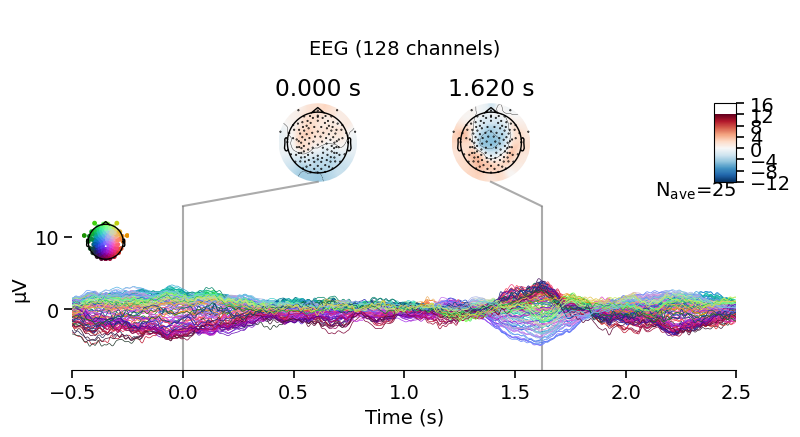

In [37]:
base_data_path='/home/common/bonaiuto/infant_9m_face_eeg/derivatives'

plt.rcParams.update({
    'font.size': 14,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

grand_average=get_grand_average(base_data_path, evt='_mov1', crop_lims=(-.5, 2.5))

# Plot the grand average
ts_fig=grand_average.plot_joint(times=[0,1.620], ts_args={'ylim': {'eeg': (-8.406, 14.193)}}, topomap_args={'vlim': [-12,12]})
ts_fig.set_size_inches([5.655, 4.2])
ts_fig.savefig(os.path.join(out_base_path, 'figures', '9m_dynamic_expression_butterfly.png'))
ts_fig.savefig(os.path.join(out_base_path, 'figures', '9m_dynamic_expression_butterfly.pdf'))

In [38]:
win_sz_ms = 500    
# win_sz_pts = int(win_sz_ms * (epochs.info['sfreq']/1000))
# half_win = int(np.floor(win_sz_pts / 2))

In [39]:
n_trials(f_cond, base_data_path, evt='_mov1')

Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/102/NEARICA_NF/04_rereferenced_data/102.events_rereferenced_mov1_data.set...
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Ready.
102: F01 Joy unshuffled=2
102: F01 Joy shuffled=2
102: F03 Joy unshuffled=4
102: F03 Joy shuffled=0
102: F02 Sadness unshuffled=1
102: F02 Sadness shuffled=1
102: F04 Sadness unshuffled=1
102: F04 Sadness shuffled=0
102: F06 MouthOpening unshuffled=2
102: F06 MouthOpening shuffled=1
102: F07 MouthOpening unshuffled=2
102: F07 MouthOpening shuffled=0
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/103/NEARICA_NF/04_rereferenced_data/103.events_rereferenced_mov1_data.set...
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


103: F01 Joy unshuffled=3
103: F01 Joy shuffled=4
103: F03 Joy unshuffled=5
103: F03 Joy shuffled=1
103: F02 Sadness unshuffled=6
103: F02 Sadness shuffled=2
103: F04 Sadness unshuffled=4
103: F04 Sadness shuffled=2
103: F06 MouthOpening unshuffled=4
103: F06 MouthOpening shuffled=3
103: F07 MouthOpening unshuffled=5
103: F07 MouthOpening shuffled=1
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/108/NEARICA_NF/04_rereferenced_data/108.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.
108: F01 Joy unshuffled=1
108: F01 Joy shuffled=1
108: F03 Joy unshuffled=6
108: F03 Joy shuffled=1
108: F02 Sadness unshuffled=2
108: F02 Sadness shuffled=1
108: F04 Sadness unshuffled=7
108: F04 Sadness shuffled=2
108: F06 MouthOpening unshuffled=2
108: F06 MouthOpening shuffled=2
108: F07 MouthOpening unshuffled=8
108: F07 MouthOpening shuffled=3
Extracting parameters from

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.
109: F01 Joy unshuffled=6
109: F01 Joy shuffled=0
109: F03 Joy unshuffled=6
109: F03 Joy shuffled=0
109: F02 Sadness unshuffled=3
109: F02 Sadness shuffled=3
109: F04 Sadness unshuffled=4
109: F04 Sadness shuffled=0
109: F06 MouthOpening unshuffled=7
109: F06 MouthOpening shuffled=1
109: F07 MouthOpening unshuffled=4
109: F07 MouthOpening shuffled=6
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/111/NEARICA_NF/04_rereferenced_data/111.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.
111: F01 Joy unshuffled=3
111: F01 Joy shuffled=0
111: F03 Joy unshuffled=7
111: F03 Joy shuffled=2
111: F02 Sadness unshuffled=6
111: F02 Sadness shuffled=4
111: F04 Sadness unshuffled=3
111: F04 Sadness shuffled=2
111: F06 MouthOpening unshuffled=8
111: F06 MouthOpening shuffled=1
111: F07 MouthOpening unshuffled=4
111: F07 MouthOpening shuffled=2
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/112/NEARICA_NF/04_rereferenced_data/112.events_rereferenced_mov1_data.set...
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Ready.
112: F01 Joy unshuffled=5
112: F01 Joy shuffled=1
112: F03 Joy unshuffled=5
112: F03 Joy shuffled=1
112: F02 Sadness unshuffled=5
112: F02 Sadness shuffled=0
112: F04 Sadness unshuffled=2
112: F04 Sadness shuffled=3
112: F06 MouthOpening unshuffled=3
112: F06 Mouth

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


0 projection items activated
Ready.
113: F01 Joy unshuffled=6
113: F01 Joy shuffled=4
113: F03 Joy unshuffled=5
113: F03 Joy shuffled=1
113: F02 Sadness unshuffled=4
113: F02 Sadness shuffled=2
113: F04 Sadness unshuffled=5
113: F04 Sadness shuffled=4
113: F06 MouthOpening unshuffled=2
113: F06 MouthOpening shuffled=2
113: F07 MouthOpening unshuffled=6
113: F07 MouthOpening shuffled=2
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/114/NEARICA_NF/04_rereferenced_data/114.events_rereferenced_mov1_data.set...
Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Ready.
114: F01 Joy unshuffled=9
114: F01 Joy shuffled=4
114: F03 Joy unshuffled=10
114: F03 Joy shuffled=4
114: F02 Sadness unshuffled=5
114: F02 Sadness shuffled=4
114: F04 Sadness unshuffled=11
114: F04 Sadness shuffled=1
114: F06 MouthOpening unshuffled=10
114: F06 MouthOpening shuffled=1
114: F07 MouthOpening unshuffled=4
114: F07 MouthOpenin

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.
117: F01 Joy unshuffled=6
117: F01 Joy shuffled=3
117: F03 Joy unshuffled=5
117: F03 Joy shuffled=3
117: F02 Sadness unshuffled=4
117: F02 Sadness shuffled=2
117: F04 Sadness unshuffled=9
117: F04 Sadness shuffled=1
117: F06 MouthOpening unshuffled=6
117: F06 MouthOpening shuffled=1
117: F07 MouthOpening unshuffled=1
117: F07 MouthOpening shuffled=6
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/119/NEARICA_NF/04_rereferenced_data/119.events_rereferenced_mov1_data.set...
Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Ready.
119: F01 Joy unshuffled=3
119: F01 Joy shuffled=1
119: F03 Joy unshuffled=6
119: F03 Joy shuffled=0
119: F02 Sadness unshuffled=3
119: F02 Sadness shuffled=2
119: F04 Sadness unshuffled=6
119: F04 Sadness shuffled=0
119: F06 MouthOpening unshuffled=4
119: F06 MouthOpening shuffled=4
119: F07 MouthOpening unshu

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


0 projection items activated
Ready.
121: F01 Joy unshuffled=9
121: F01 Joy shuffled=3
121: F03 Joy unshuffled=6
121: F03 Joy shuffled=4
121: F02 Sadness unshuffled=5
121: F02 Sadness shuffled=1
121: F04 Sadness unshuffled=7
121: F04 Sadness shuffled=2
121: F06 MouthOpening unshuffled=10
121: F06 MouthOpening shuffled=1
121: F07 MouthOpening unshuffled=7
121: F07 MouthOpening shuffled=3
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/122/NEARICA_NF/04_rereferenced_data/122.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.
122: F01 Joy unshuffled=3
122: F01 Joy shuffled=1
122: F03 Joy unshuffled=7
122: F03 Joy shuffled=1
122: F02 Sadness unshuffled=3
122: F02 Sadness shuffled=0
122: F04 Sadness unshuffled=6
122: F04 Sadness shuffled=1
122: F06 MouthOpening unshuffled=4
122: F06 MouthOpening shuffled=1
122: F07 MouthOpening unshuffled=6
122: F07 MouthOpening 

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


123: F01 Joy unshuffled=4
123: F01 Joy shuffled=3
123: F03 Joy unshuffled=9
123: F03 Joy shuffled=0
123: F02 Sadness unshuffled=5
123: F02 Sadness shuffled=1
123: F04 Sadness unshuffled=7
123: F04 Sadness shuffled=3
123: F06 MouthOpening unshuffled=5
123: F06 MouthOpening shuffled=2
123: F07 MouthOpening unshuffled=8
123: F07 MouthOpening shuffled=2
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/126/NEARICA_NF/04_rereferenced_data/126.events_rereferenced_mov1_data.set...
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Ready.
126: F01 Joy unshuffled=3
126: F01 Joy shuffled=0
126: F03 Joy unshuffled=2
126: F03 Joy shuffled=0
126: F02 Sadness unshuffled=3
126: F02 Sadness shuffled=2
126: F04 Sadness unshuffled=7
126: F04 Sadness shuffled=1
126: F06 MouthOpening unshuffled=6
126: F06 MouthOpening shuffled=2
126: F07 MouthOpening unshuffled=4
126: F07 MouthOpening shuffled=4
Extracting parameters from

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


127: F01 Joy unshuffled=4
127: F01 Joy shuffled=0
127: F03 Joy unshuffled=3
127: F03 Joy shuffled=2
127: F02 Sadness unshuffled=1
127: F02 Sadness shuffled=1
127: F04 Sadness unshuffled=2
127: F04 Sadness shuffled=1
127: F06 MouthOpening unshuffled=4
127: F06 MouthOpening shuffled=1
127: F07 MouthOpening unshuffled=1
127: F07 MouthOpening shuffled=0
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/128/NEARICA_NF/04_rereferenced_data/128.events_rereferenced_mov1_data.set...
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.
128: F01 Joy unshuffled=12
128: F01 Joy shuffled=1
128: F03 Joy unshuffled=3
128: F03 Joy shuffled=5
128: F02 Sadness unshuffled=8
128: F02 Sadness shuffled=1
128: F04 Sadness unshuffled=7
128: F04 Sadness shuffled=4
128: F06 MouthOpening unshuffled=5
128: F06 MouthOpening shuffled=0
128: F07 MouthOpening unshuffled=9
128: F07 MouthOpening shuffled=5
Extracting parameters fro

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


129: F01 Joy unshuffled=8
129: F01 Joy shuffled=1
129: F03 Joy unshuffled=6
129: F03 Joy shuffled=0
129: F02 Sadness unshuffled=2
129: F02 Sadness shuffled=2
129: F04 Sadness unshuffled=7
129: F04 Sadness shuffled=2
129: F06 MouthOpening unshuffled=7
129: F06 MouthOpening shuffled=2
129: F07 MouthOpening unshuffled=4
129: F07 MouthOpening shuffled=3
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/130/NEARICA_NF/04_rereferenced_data/130.events_rereferenced_mov1_data.set...
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Ready.
130: F01 Joy unshuffled=7
130: F01 Joy shuffled=1
130: F03 Joy unshuffled=3
130: F03 Joy shuffled=1
130: F02 Sadness unshuffled=4
130: F02 Sadness shuffled=4
130: F04 Sadness unshuffled=6
130: F04 Sadness shuffled=2
130: F06 MouthOpening unshuffled=6
130: F06 MouthOpening shuffled=0
130: F07 MouthOpening unshuffled=6
130: F07 MouthOpening shuffled=1
Extracting parameters from

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


131: F01 Joy unshuffled=1
131: F01 Joy shuffled=1
131: F03 Joy unshuffled=7
131: F03 Joy shuffled=0
131: F02 Sadness unshuffled=2
131: F02 Sadness shuffled=3
131: F04 Sadness unshuffled=4
131: F04 Sadness shuffled=0
131: F06 MouthOpening unshuffled=7
131: F06 MouthOpening shuffled=1
131: F07 MouthOpening unshuffled=1
131: F07 MouthOpening shuffled=2
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/133/NEARICA_NF/04_rereferenced_data/133.events_rereferenced_mov1_data.set...
Not setting metadata
71 matching events found
No baseline correction applied
0 projection items activated
Ready.
133: F01 Joy unshuffled=5
133: F01 Joy shuffled=3
133: F03 Joy unshuffled=6
133: F03 Joy shuffled=3
133: F02 Sadness unshuffled=9
133: F02 Sadness shuffled=5
133: F04 Sadness unshuffled=7
133: F04 Sadness shuffled=3
133: F06 MouthOpening unshuffled=5
133: F06 MouthOpening shuffled=3
133: F07 MouthOpening unshuffled=5
133: F07 MouthOpening shuffled=1
Extracting parameters from

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


138: F01 Joy unshuffled=2
138: F01 Joy shuffled=2
138: F03 Joy unshuffled=9
138: F03 Joy shuffled=0
138: F02 Sadness unshuffled=3
138: F02 Sadness shuffled=0
138: F04 Sadness unshuffled=5
138: F04 Sadness shuffled=2
138: F06 MouthOpening unshuffled=4
138: F06 MouthOpening shuffled=1
138: F07 MouthOpening unshuffled=5
138: F07 MouthOpening shuffled=1
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/139/NEARICA_NF/04_rereferenced_data/139.events_rereferenced_mov1_data.set...
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Ready.
139: F01 Joy unshuffled=4
139: F01 Joy shuffled=0
139: F03 Joy unshuffled=1
139: F03 Joy shuffled=1
139: F02 Sadness unshuffled=2
139: F02 Sadness shuffled=1
139: F04 Sadness unshuffled=3
139: F04 Sadness shuffled=2
139: F06 MouthOpening unshuffled=3
139: F06 MouthOpening shuffled=1
139: F07 MouthOpening unshuffled=1
139: F07 MouthOpening shuffled=1
Extracting parameters from

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


141: F01 Joy unshuffled=4
141: F01 Joy shuffled=4
141: F03 Joy unshuffled=6
141: F03 Joy shuffled=2
141: F02 Sadness unshuffled=8
141: F02 Sadness shuffled=1
141: F04 Sadness unshuffled=5
141: F04 Sadness shuffled=0
141: F06 MouthOpening unshuffled=3
141: F06 MouthOpening shuffled=2
141: F07 MouthOpening unshuffled=8
141: F07 MouthOpening shuffled=2
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/148/NEARICA_NF/04_rereferenced_data/148.events_rereferenced_mov1_data.set...
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Ready.
148: F01 Joy unshuffled=8
148: F01 Joy shuffled=2
148: F03 Joy unshuffled=6
148: F03 Joy shuffled=3
148: F02 Sadness unshuffled=4
148: F02 Sadness shuffled=2
148: F04 Sadness unshuffled=7
148: F04 Sadness shuffled=4
148: F06 MouthOpening unshuffled=9
148: F06 MouthOpening shuffled=3
148: F07 MouthOpening unshuffled=7
148: F07 MouthOpening shuffled=3
Extracting parameters from

/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:64: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
149: F01 Joy unshuffled=12
149: F01 Joy shuffled=1
149: F03 Joy unshuffled=12
149: F03 Joy shuffled=5
149: F02 Sadness unshuffled=14
149: F02 Sadness shuffled=1
149: F04 Sadness unshuffled=11
149: F04 Sadness shuffled=4
149: F06 MouthOpening unshuffled=10
149: F06 MouthOpening shuffled=8
149: F07 MouthOpening unshuffled=15
149: F07 MouthOpening shuffled=5
F01 Joy unshuffled: min=1, max=12, min=5.2
F01 Joy shuffled: min=0, max=4, min=1.72
F03 Joy unshuffled: min=1, max=12, min=5.8
F03 Joy shuffled: min=0, max=5, min=1.6
F02 Sadness unshuffled: min=1, max=14, min=4.48
F02 Sadness shuffled: min=0, max=5, min=1.84
F04 Sadness unshuffled: min=1, max=11, min=5.72
F04 Sadness shuffled: min=0, max=4, min=1.84
F06 MouthOpening unshuffled: min=2, max=10, min=5.44
F06 MouthOpening shuffled: min=0, max=8, min=1.84
F07 MouthOpening unshuffled: min=1, max=15, min=5.32
F07 MouthOpening sh

In [11]:
compute_data_dynamic_rdm(
    'dynamic', 
    f_cond, 
    base_data_path, 
    win_sz_ms, 
    out_base_path, 
    evt='_mov1', 
    crop_lims=(None, 3)
)

Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/102/NEARICA_NF/04_rereferenced_data/102.events_rereferenced_mov1_data.set...
Not setting metadata
28 matching events found


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/103/NEARICA_NF/04_rereferenced_data/103.events_rereferenced_mov1_data.set...
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/108/NEARICA_NF/04_rereferenced_data/108.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/109/NEARICA_NF/04_rereferenced_data/109.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/111/NEARICA_NF/04_rereferenced_data/111.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/112/NEARICA_NF/04_rereferenced_data/112.events_rereferenced_mov1_data.set...
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/113/NEARICA_NF/04_rereferenced_data/113.events_rereferenced_mov1_data.set...
Not setting metadata
64 matching events found


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/114/NEARICA_NF/04_rereferenced_data/114.events_rereferenced_mov1_data.set...
Not setting metadata
74 matching events found


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/117/NEARICA_NF/04_rereferenced_data/117.events_rereferenced_mov1_data.set...
Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/119/NEARICA_NF/04_rereferenced_data/119.events_rereferenced_mov1_data.set...
Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/121/NEARICA_NF/04_rereferenced_data/121.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/122/NEARICA_NF/04_rereferenced_data/122.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/123/NEARICA_NF/04_rereferenced_data/123.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/126/NEARICA_NF/04_rereferenced_data/126.events_rereferenced_mov1_data.set...
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/127/NEARICA_NF/04_rereferenced_data/127.events_rereferenced_mov1_data.set...
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/128/NEARICA_NF/04_rereferenced_data/128.events_rereferenced_mov1_data.set...
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/129/NEARICA_NF/04_rereferenced_data/129.events_rereferenced_mov1_data.set...
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/130/NEARICA_NF/04_rereferenced_data/130.events_rereferenced_mov1_data.set...
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/131/NEARICA_NF/04_rereferenced_data/131.events_rereferenced_mov1_data.set...
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/133/NEARICA_NF/04_rereferenced_data/133.events_rereferenced_mov1_data.set...
Not setting metadata
71 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/138/NEARICA_NF/04_rereferenced_data/138.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/139/NEARICA_NF/04_rereferenced_data/139.events_rereferenced_mov1_data.set...
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/141/NEARICA_NF/04_rereferenced_data/141.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/148/NEARICA_NF/04_rereferenced_data/148.events_rereferenced_mov1_data.set...
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/149/NEARICA_NF/04_rereferenced_data/149.events_rereferenced_mov1_data.set...
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rdm.py:175: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rdm.py:179: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


In [40]:
test_models=['actor', 'movement_type', 'shuffled', 'landmark', 'au_c', 'contrast', 'gabor', 'total_flow']
n_models = len(test_models)

In [13]:
compute_data_model_dynamic_correlations(
    base_data_path, 
    win_sz_ms, 
    movie_times, 
    model_rdms, 
    test_models,
    out_base_path, 
    evt='_mov1', 
    exclude_subjects=['119','131'], 
    crop_lims=(None, 3),
    suffix='_contrast_gabor_flow'
)

102
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/102/NEARICA_NF/04_rereferenced_data/102.events_rereferenced_mov1_data.set...
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])
/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not define

103
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/103/NEARICA_NF/04_rereferenced_data/103.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


108
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/108/NEARICA_NF/04_rereferenced_data/108.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


109
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/109/NEARICA_NF/04_rereferenced_data/109.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


111
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/111/NEARICA_NF/04_rereferenced_data/111.events_rereferenced_mov1_data.set...
Not setting metadata
57 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


112
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/112/NEARICA_NF/04_rereferenced_data/112.events_rereferenced_mov1_data.set...
Not setting metadata
39 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


113
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/113/NEARICA_NF/04_rereferenced_data/113.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


114
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/114/NEARICA_NF/04_rereferenced_data/114.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


117
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/117/NEARICA_NF/04_rereferenced_data/117.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


121
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/121/NEARICA_NF/04_rereferenced_data/121.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


122
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/122/NEARICA_NF/04_rereferenced_data/122.events_rereferenced_mov1_data.set...
Not setting metadata
46 matching events found
No baseline correction applied


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


123
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/123/NEARICA_NF/04_rereferenced_data/123.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


126
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/126/NEARICA_NF/04_rereferenced_data/126.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


127
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/127/NEARICA_NF/04_rereferenced_data/127.events_rereferenced_mov1_data.set...
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


128
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/128/NEARICA_NF/04_rereferenced_data/128.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


129
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/129/NEARICA_NF/04_rereferenced_data/129.events_rereferenced_mov1_data.set...
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


130
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/130/NEARICA_NF/04_rereferenced_data/130.events_rereferenced_mov1_data.set...
Not setting metadata
48 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


133
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/133/NEARICA_NF/04_rereferenced_data/133.events_rereferenced_mov1_data.set...
Not setting metadata
71 matching events found


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


138
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/138/NEARICA_NF/04_rereferenced_data/138.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


139
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/139/NEARICA_NF/04_rereferenced_data/139.events_rereferenced_mov1_data.set...
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')
/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


141
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/141/NEARICA_NF/04_rereferenced_data/141.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


148
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/148/NEARICA_NF/04_rereferenced_data/148.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


149
Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/149/NEARICA_NF/04_rereferenced_data/149.events_rereferenced_mov1_data.set...


/home/bonaiuto/infant_face_eeg/src/rsa.py:130: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname, montage_units='cm')


Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:134: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


NEARICA_preprocessing_report.csv


In [41]:
subjects_used, epochs_per_model=load_data_model_dynamic_correlations(
    'dynamic', 
    base_data_path, 
    win_sz_ms, 
    test_models, 
    out_base_path, 
    crop_lims=(None,3), 
    evt='_mov1', 
    exclude_subjects=['119','131'],
    suffix='_contrast_gabor_flow'
)

Extracting parameters from /home/common/bonaiuto/infant_9m_face_eeg/derivatives/102/NEARICA_NF/04_rereferenced_data/102.events_rereferenced_mov1_data.set...
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/bonaiuto/infant_face_eeg/src/rsa.py:292: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname)
/home/bonaiuto/infant_face_eeg/src/rsa.py:292: RuntimeWarning: Estimated head radius (0.9 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  epochs = mne.read_epochs_eeglab(fname)
/home/bonaiuto/infant_face_eeg/src/rsa.py:296: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>.tmax (2.748 s)
  epochs = epochs.crop(tmin=crop_lims[0], tmax=crop_lims[1])


actor, n subjects=23
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
movement_type, n subjects=23
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
shuffled, n subjects=23
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
landmark, n subjects=23
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
au_c, n subjects=23
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
contrast, n subjects=23
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
gabor, n subjects=23
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
total_flow, n subjects=23
Not setting metadata
23 matching events found
No baseline correction 

In [42]:
def compute_group_noise_ceiling_bounds(model_type, base_data_path, win_sz_ms, movie_times, model_rdms, test_models,
                                       out_base_path, exclude_subjects=None, suffix=''):
    """
    Compute lower and upper bounds of noise ceilings over all subjects for dynamic RSA and save them in an NPZ file.
    """
    subject_paths = sorted(glob.glob(os.path.join(base_data_path, '*')))
    aggregated_rdms = {}

    for subject_path in subject_paths:
        subject = os.path.split(subject_path)[-1]
        if exclude_subjects is None or subject not in exclude_subjects:
            subj_out_path = os.path.join(out_base_path, subject)
            in_fname = f'sub-{subject}_rdms_{model_type}.npz'
            if os.path.exists(os.path.join(subj_out_path, in_fname)):
                loaded = np.load(os.path.join(subj_out_path, in_fname), allow_pickle=True)
                all_rdms = loaded['all_rdms'].item()

                # Aggregate RDMs across subjects
                for ch_name, ch_rdms in all_rdms.items():
                    if ch_name not in aggregated_rdms:
                        aggregated_rdms[ch_name] = []
                    aggregated_rdms[ch_name].append(ch_rdms)

    # Compute the group-level noise ceiling
    group_noise_ceiling_upper = {}
    group_noise_ceiling_lower = {}

    for ch_name, ch_subject_rdms in aggregated_rdms.items():
        ch_subject_rdms = np.array(ch_subject_rdms)  # Shape: (n_subjects, n_timepoints, n_items, n_items)
        n_subjects = ch_subject_rdms.shape[0]
        n_timepoints = ch_subject_rdms.shape[1]

        # Compute noise ceiling bounds for each time point
        upper_bound = []
        lower_bound = []
        for t_idx in range(n_timepoints):
            timepoint_rdms = ch_subject_rdms[:, t_idx, :, :]  # Shape: (n_subjects, n_items, n_items)
            mean_rdm = np.nanmean(timepoint_rdms, axis=0)  # Mean RDM across subjects
            mean_vector = mean_rdm[np.triu_indices(mean_rdm.shape[0], k=1)]

            # Upper bound: Correlation between subject RDMs and the mean RDM
            individual_vectors = np.array([
                rdm[np.triu_indices(rdm.shape[0], k=1)] for rdm in timepoint_rdms
            ])
            nnan_idx = np.where(~np.isnan(mean_vector))[0]
            upper_corrs = []
            pairwise_corrs = []

            for i, subj_vector in enumerate(individual_vectors):
                # Correlation with the mean RDM
                upper_corr = np.corrcoef(mean_vector[nnan_idx], subj_vector[nnan_idx])[0, 1]
                upper_corrs.append(upper_corr)

                # Pairwise correlations for lower bound
                for j in range(i + 1, n_subjects):
                    pair_vector = individual_vectors[j]
                    pair_corr = np.corrcoef(subj_vector[nnan_idx], pair_vector[nnan_idx])[0, 1]
                    pairwise_corrs.append(pair_corr)

            upper_bound.append(np.nanmean(upper_corrs))  # Mean correlation with mean RDM
            lower_bound.append(np.nanmean(pairwise_corrs))  # Mean pairwise correlation

        group_noise_ceiling_upper[ch_name] = np.array(upper_bound)
        group_noise_ceiling_lower[ch_name] = np.array(lower_bound)

    # Save the results
    if not os.path.exists(out_base_path):
        os.makedirs(out_base_path)
    out_fname = f'group_noise_ceiling_bounds_{model_type}{suffix}.npz'
    np.savez(os.path.join(out_base_path, out_fname), 
             noise_ceiling_upper=group_noise_ceiling_upper, 
             noise_ceiling_lower=group_noise_ceiling_lower)
    return group_noise_ceiling_upper, group_noise_ceiling_lower


In [15]:
group_noise_ceiling_upper, group_noise_ceiling_lower = compute_group_noise_ceiling_bounds(
    'dynamic', 
    base_data_path, 
    win_sz_ms, 
    movie_times, 
    model_rdms, 
    test_models,
    out_base_path,
    exclude_subjects=['119','131'],
    suffix='_contrast_gabor_flow')

In [43]:
loaded = np.load(os.path.join(out_base_path, 'group_noise_ceiling_bounds_dynamic_contrast_gabor_flow.npz'), allow_pickle=True)
group_noise_ceiling_upper=loaded['noise_ceiling_upper'].item()
group_noise_ceiling_lower=loaded['noise_ceiling_lower'].item()

In [15]:
# for idx in range(len(test_models)):
#     print(test_models[idx])
#     fig=epochs_per_model[test_models[idx]].average().plot_joint()

In [16]:
# cmap = plt.get_cmap('tab10')
# plt.figure(figsize=(14, 8))
# ax = plt.subplot(1, 1, 1)
# sensor_idx = []

# # Compute the average across all subjects for each model in epochs_per_model:
# times=epochs_per_model[test_models[0]].times+win_sz_ms/2/1000
# cluster_t_idxs=[]

# for c_idx, c_type in enumerate(test_models):
#     model_data = epochs_per_model[c_type].get_data()*1e6
    
#     cluster_t_idx, cluster_ch_idx=get_clusters(epochs_per_model[c_type])

#     if len(cluster_ch_idx):
#         ch_idx=np.hstack(cluster_ch_idx)
#         cluster_t_idxs.append(np.unique(np.hstack(cluster_t_idx)))
        
#         c_corrs = np.mean(np.array([model_data[:, c, :] for c in ch_idx]),axis=0)
#         m_c_corrs = np.mean(c_corrs, axis=0)
#         se_c_corrs = np.std(c_corrs, axis=0)/np.sqrt(c_corrs.shape[0])
        
#         plt.plot(times, m_c_corrs, label=c_type, color=cmap(c_idx))
#         plt.fill_between(times, m_c_corrs-se_c_corrs, m_c_corrs+se_c_corrs, alpha=0.5, color=cmap(c_idx))
        
#         sensor_idx.append(np.hstack(cluster_ch_idx))
#     else:
#         cluster_t_idxs.append([])
#         sensor_idx.append([])

# yl=plt.ylim()
# plt.plot([0,0],yl,'k--')
# plt.plot([exp_time,exp_time],yl,'k--')

# pos_range=yl[1]
        
# for c_idx,t_idx in enumerate(cluster_t_idxs):        
#     for t in t_idx:
#         plt.plot(times[t], yl[1]+.05*pos_range+.05*pos_range*c_idx, '.', color=cmap(c_idx))
    
# new_yl=[yl[0], yl[1]+len(cluster_t_idxs)*.1*pos_range] 
# plt.ylim(new_yl)


# plt.legend(loc='upper left')

# plt.savefig(os.path.join(out_base_path, 'figures', '9m_dynamic_expression_model_corrs_cluster.png'))

# # Create an inset axis
# axins = inset_axes(ax, width="30%", height="30%", loc='lower right')
# axins = mne.viz.plot_sensors(epochs_per_model[test_models[0]].info, ch_groups=sensor_idx, cmap=cmap, pointsize=20, linewidth=0, axes=axins)


Using a threshold of 1.717144
stat_fun(H1): min=-0.965557 max=2.116311
Running initial clustering …
Found 2 clusters


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Permuting : 9999/9999 [00:04<00:00, 2318.38it/s]

Using a threshold of 1.717144
stat_fun(H1): min=-2.644653 max=1.746931
Running initial clustering …
Found 1 cluster



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Permuting : 9999/9999 [00:00<00:00, 82550.77it/s]

Using a threshold of 1.717144
stat_fun(H1): min=-1.919676 max=2.391365
Running initial clustering …
Found 2 clusters



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Permuting : 9999/9999 [00:00<00:00, 85671.66it/s]

Using a threshold of 1.717144
stat_fun(H1): min=-1.634482 max=2.008499
Running initial clustering …
Found 1 cluster



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Permuting : 9999/9999 [00:00<00:00, 77696.61it/s]

Using a threshold of 1.717144
stat_fun(H1): min=-2.818370 max=1.556846
Running initial clustering …
Found 0 clusters


Using a threshold of 1.717144
stat_fun(H1): min=-1.875315 max=1.712966
Running initial clustering …
Found 0 clusters


/home/bonaiuto/tmp/ipykernel_30175/2477800878.py:37: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  cluster_stats = mne.stats.permutation_cluster_1samp_test(model_corr_data,


Using a threshold of 1.717144
stat_fun(H1): min=-2.164383 max=6.158687
Running initial clustering …
Found 1 cluster


/home/bonaiuto/tmp/ipykernel_30175/2477800878.py:37: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  cluster_stats = mne.stats.permutation_cluster_1samp_test(model_corr_data,
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Permuting : 9999/9999 [00:00<00:00, 78487.34it/s]

Using a threshold of 1.717144
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 8 clusters



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Permuting : 9999/9999 [00:00<00:00, 78552.17it/s]


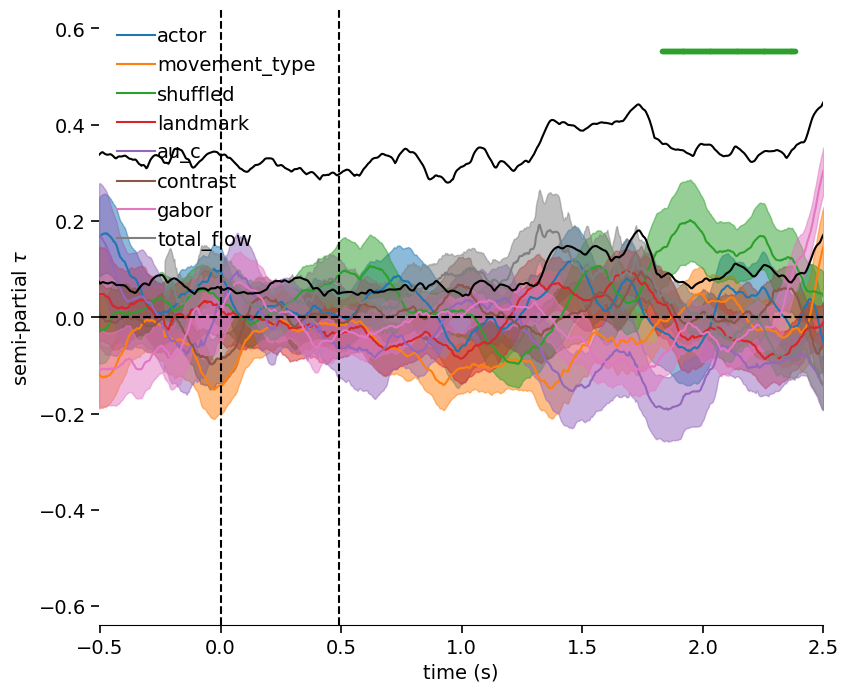

In [44]:
from functools import partial
from mne.stats import  ttest_1samp_no_p

plt.rcParams.update({
    'font.size': 14,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

cmap = plt.get_cmap('tab10')
plt.figure(figsize=(9.346, 8))
ax = plt.subplot(1, 1, 1)

times=epochs_per_model[test_models[0]].times
cluster_t_idxs=[]

sigma = 1e-3  # sigma for the "hat" method
threshold_tfce = dict(start=0, step=.001)

stat_fun_hat = partial(ttest_1samp_no_p, sigma=sigma)

noise_ceiling_lower=np.max(np.vstack([group_noise_ceiling_lower[x] for x in group_noise_ceiling_lower]),axis=0)
noise_ceiling_upper=np.max(np.vstack([group_noise_ceiling_upper[x] for x in group_noise_ceiling_upper]),axis=0)

for c_idx, c_type in enumerate(test_models):
    model_corr_data=np.mean(epochs_per_model[c_type].get_data()*1e6,axis=1)

    cluster_stats = mne.stats.permutation_cluster_1samp_test(model_corr_data,
                                                         out_type='mask',
                                                         n_permutations=10000,
                                                         buffer_size=None,
                                                         tail=1,
                                                         n_jobs=-1)

    # Unpack the results
    t_obs, clusters, cluster_p_values, H0 = cluster_stats
    
    # Find significant clusters
    significant_clusters = np.where(cluster_p_values < 0.05)[0]

    cluster_t_idx = []
    for i in range(len(significant_clusters)):
        mask = clusters[significant_clusters[i]]
        cluster_t_idx.append(np.arange(len(times))[mask])
    if len(cluster_t_idx):
        cluster_t_idx=np.hstack(cluster_t_idx)
        cluster_t_idxs.append(cluster_t_idx)
    else:
        cluster_t_idxs.append([])
        
    m_ch_corrs = np.mean(model_corr_data, axis=0)
    se_ch_corrs = np.std(model_corr_data, axis=0)/np.sqrt(model_corr_data.shape[0])

    plt.plot(times, m_ch_corrs, label=c_type, color=cmap(c_idx))
    plt.fill_between(times, m_ch_corrs-se_ch_corrs, m_ch_corrs+se_ch_corrs, alpha=0.5, color=cmap(c_idx))
#     elif c_type=='landmark':
#         m_ch_corrs = np.mean(model_corr_data, axis=0)
#         se_ch_corrs = np.std(model_corr_data, axis=0)/np.sqrt(model_corr_data.shape[0])
        
#         plt.plot(times, m_ch_corrs, label=c_type, color=cmap(c_idx))
#         plt.fill_between(times, m_ch_corrs-se_ch_corrs, m_ch_corrs+se_ch_corrs, alpha=0.5, color=cmap(c_idx))
#         cluster_t_idxs.append([])
#     else:
#         cluster_t_idxs.append([])
    
plt.plot(times, noise_ceiling_lower, 'k')
plt.plot(times, noise_ceiling_upper, 'k')

yl=plt.ylim()
pos_range=yl[1]
plt.ylim([-.64,.64])

plt.axhline(0,color='k',linestyle='--')
plt.axvline(0,color='k',linestyle='--')
plt.axvline(exp_time,color='k',linestyle='--')

for c_idx,t_idx in enumerate(cluster_t_idxs):        
    for t in t_idx:
        plt.plot(times[t], yl[1]+.05*pos_range+.05*pos_range*c_idx, '.', color=cmap(c_idx))
    
plt.xlim(times[[0,-1]])

plt.xlabel('time (s)')
plt.ylabel(r'semi-partial $\tau$')

plt.legend(loc='upper left')

plt.savefig(os.path.join(out_base_path, 'figures', '9m_dynamic_expression_model_corrs_all_chans.pdf'))
plt.savefig(os.path.join(out_base_path, 'figures', '9m_dynamic_expression_model_corrs_all_chans.png'))

In [18]:
# def plot_rdm_results(c_idx):
#     c_type = test_models[c_idx]
#     print(c_type)
#     #average_corr = np.mean(epochs_per_model[c_type].get_data() * 1e6, axis=0)
#     #ch_corrs = average_corr  # Use the averaged data for the initial model

#     times=epochs_per_model[test_models[0]].times+win_sz_ms/2/1000
#     cluster_t_idx,cluster_ch_idx=get_clusters(epochs_per_model[c_type])
#     if len(cluster_ch_idx):
#         cmap = plt.get_cmap('tab10')
        
#         sensor_idx = []
#         inc_idx = np.array([np.hstack(cluster_ch_idx)])
        
#         cmap = plt.get_cmap('tab10')
#         plt.figure(figsize=(14, 8))
#         ax = plt.subplot(1, 1, 1)
        
#         #for c_idx, c_type in enumerate(rdm_names):
#         model_data = epochs_per_model[c_type].get_data()
        
#         for cluster_idx, (ch_idx, t_idx) in enumerate(zip(cluster_ch_idx, cluster_t_idx)):
#             c_corrs = np.mean(np.array([model_data[:,c, :] for c in ch_idx]),axis=0)
#             m_c_corrs = np.mean(c_corrs, axis=0)
#             se_c_corrs = np.std(c_corrs, axis=0)/np.sqrt(c_corrs.shape[0])

#             plt.plot(times, m_c_corrs, label=c_type, color=cmap(cluster_idx))
#             plt.fill_between(times, m_c_corrs-se_c_corrs, m_c_corrs+se_c_corrs, alpha=0.5, color=cmap(cluster_idx))
#             sensor_idx.append(ch_idx)
        
#         yl=plt.ylim()
#         plt.plot([0,0],yl,'k--')
#         plt.plot([exp_time,exp_time],yl,'k--')
        
#         pos_range=yl[1]
        
#         plt.ylim(yl)
        
#         for cluster_idx, t_idx in enumerate(cluster_t_idx):
#             for t in t_idx:
#                 plt.plot(times[t], yl[1]+.05*pos_range+.05*pos_range*cluster_idx, '.', color=cmap(cluster_idx))
        
#         new_yl=[yl[0], yl[1]+len(cluster_t_idx)*.1*pos_range] 
#         plt.ylim(new_yl)
#         plt.legend(loc='upper left')
        
#         # Create an inset axis
#         axins = inset_axes(ax, width="30%", height="30%", loc='lower right')
#         axins = mne.viz.plot_sensors(epochs_per_model[test_models[0]].info, cmap=cmap, ch_groups=sensor_idx, pointsize=20, linewidth=0, axes=axins)

In [19]:
# for idx in range(n_models):
#     plot_rdm_results(idx)

In [73]:
def compute_permutation_stats(clus_corr, behav_values, num_time_points, control_values=None):
    # Remove NaN values from behavioral data
    valid_indices = ~np.isnan(behav_values)
    if np.any(valid_indices):
        # Use only non-NaN entries for permutation
        behav_values_nonan = behav_values[valid_indices]
        perm_behav_values = permutation(behav_values_nonan)

        y=clus_corr[valid_indices,:]

        if control_values is not None and control_values.shape[1]>0:
            controls=control_values[valid_indices,:]
            model_y = LinearRegression().fit(controls, y)
            y_resid = y - model_y.predict(controls)
        else:
            y_resid = y
            
        perm_t_stat = []
        for t in range(num_time_points):
            # Calculate Spearman correlation for non-NaN data
            stat, _ = spearmanr(perm_behav_values, y_resid[:, t])
            perm_t_stat.append(stat)
        return perm_t_stat
    else:
        # Return NaN statistics if all are NaN or if there's no valid data
        return [np.nan] * num_time_points


def get_consecutive_count(data):
    """Return the maximum number of consecutive True values."""
    return max([len(list(group)) for key, group in itertools.groupby(data) if key]) if data.any() else 0


def cluster_based_permutation_test(c_idx, columns, control_columns=[], num_permutations=10000, significance_threshold=0.05):
    cmap = plt.get_cmap('tab20')

    # Extract EEG and behavioral data
    model_data = epochs_per_model[test_models[c_idx]].get_data() * 1e6
    clus_corr = np.mean(model_data, axis=1)
    times = epochs_per_model[test_models[c_idx]].times#+win_sz_ms/2/1000

    # Calculate actual correlations and p-values
    real_col_stat = []
    real_col_pval = []
    for column in columns:
        # Remove NaN values from behavioral data
        behav_values = np.array(filtered_df[column].dropna().values)
        valid_indices = ~np.isnan(filtered_df[column])  # Indices of non-NaN behavioral values
        y=clus_corr[valid_indices,:]

        if len(control_columns):
            controls=np.array(filtered_df[control_columns].values)[valid_indices,:].reshape(-1,len(control_columns))
            model_y = LinearRegression().fit(controls, y)
            y_resid = y - model_y.predict(controls)
        else:
            y_resid = y
        t_stat, t_pval = [], []
        for t in range(clus_corr.shape[-1]):
            if len(behav_values) > 0:  # Only compute where there are valid behavior values
                stat, p_val = spearmanr(behav_values, y_resid[:,t])
                t_stat.append(stat)
                t_pval.append(p_val)
            else:
                t_stat.append(np.nan)
                t_pval.append(np.nan)
        real_col_stat.append(t_stat)
        real_col_pval.append(t_pval)
    
    # Parallel computation of permutations
    all_perm_stats = Parallel(n_jobs=-1)(
        delayed(compute_permutation_stats)(clus_corr, behav_values, clus_corr.shape[-1], control_values=np.array(filtered_df[control_columns].values))
        for _ in range(num_permutations)
        for behav_values in [np.array(filtered_df[column].values) for column in columns]
    )

    # Reshape the results to [columns, permutations, time points]
    perm_col_stats = np.array(all_perm_stats).reshape(len(columns), num_permutations, -1)

    # Determine significance thresholds
    threshold = np.percentile(abs(perm_col_stats), 95, axis=1)  # percentiles per column

    # Plotting results
    plt.figure(figsize=(9.346, 6))
    all_sig_idx=[]
    for i, (col_stat, col_pval) in enumerate(zip(real_col_stat, real_col_pval)):
        significant_indices = (np.abs(np.array(col_stat)) > threshold[i]) & (np.array(col_pval) < significance_threshold)        

        # Mark significant points
        if get_consecutive_count(significant_indices) >= 10 and any(significant_indices) and np.max(np.abs(col_stat))>0.5:
            sig_times = times[np.where(significant_indices)[0]]
            #sig_stats = np.array(col_stat)[significant_indices]
            plt.plot(times, col_stat, label=columns[i], color=cmap(i))  # plot correlation over time
            all_sig_idx.append(np.where(significant_indices)[0])
        else:
            all_sig_idx.append([])
            

    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    plt.axvline(exp_time,color='k',linestyle='--')

    yl=plt.ylim()
    pos_range=yl[1]
            
    for i in range(len(all_sig_idx)):
        for t in all_sig_idx[i]:
            plt.plot(times[t], yl[1]+.05*pos_range+.05*pos_range*i, '.', color=cmap(i))
            
    new_yl=[yl[0], yl[1]+len(all_sig_idx)*.1*pos_range] 
    plt.ylim(new_yl)
    
    plt.legend(loc='lower right')
    plt.xlabel('Time (s)')
    plt.ylabel(test_models[c_idx])

    plt.savefig(os.path.join(out_base_path, 'figures', f'9m_behav_corr_{test_models[c_idx]}.pdf'))
    plt.savefig(os.path.join(out_base_path, 'figures', f'9m_behav_corr_{test_models[c_idx]}.png'))


def plot_correlation(c_idx, time_win, column):
    model_data = epochs_per_model[test_models[c_idx]].get_data() * 1e6
    clus_corr = np.mean(model_data, axis=1)
    times = epochs_per_model[test_models[c_idx]].times#+win_sz_ms/2/1000
    t_idx = np.where((times >= time_win[0]) & (times <= time_win[1]))[0]
    
    behav_vals = np.array(filtered_df[column].values)
    corr_vals = np.mean(clus_corr[:, t_idx], axis=-1)
    
    # Prepare to plot
    plt.figure()
    plt.scatter(behav_vals, corr_vals, color='blue', alpha=0.5, label='Data points')
    plt.xlabel(column)
    plt.ylabel(test_models[c_idx])

    # Bootstrap linear regression for prediction CI
    n_bootstraps = 10000
    predictions = []
    x_vals = np.linspace(min(behav_vals), max(behav_vals), 100)
    
    for _ in range(n_bootstraps):
        sample_indices = resample(np.arange(len(behav_vals)))
        sample_behav = behav_vals[sample_indices]
        sample_corr = corr_vals[sample_indices]
        slope, intercept, _, _, _ = linregress(sample_behav, sample_corr)
        pred_y = slope * x_vals + intercept
        predictions.append(pred_y)

    predictions = np.array(predictions)
    ci_lower = np.percentile(predictions, 2.5, axis=0)
    ci_upper = np.percentile(predictions, 97.5, axis=0)
    
    # Plot mean prediction line
    mean_predictions = np.mean(predictions, axis=0)
    plt.plot(x_vals, mean_predictions, 'r-', label='Regression Line')
    
    # Add shaded confidence interval
    plt.fill_between(x_vals, ci_lower, ci_upper, color='gray', alpha=0.2, label='95% CI')
    
    plt.show()

    # Spearman correlation and p-value
    stat, p_val = spearmanr(behav_vals, corr_vals)
    print(f'rho={stat}, p={p_val}')


In [74]:
csv_file_path = os.path.join(out_base_path,'behavior_2m.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
subjects_used = [int(subject) for subject in subjects_used]
filtered_df = df[df['subject'].isin([int(subject) for subject in subjects_used])]

In [75]:
out_base_path

'/home/bonaiuto/infant_face_eeg/derivatives/9m'

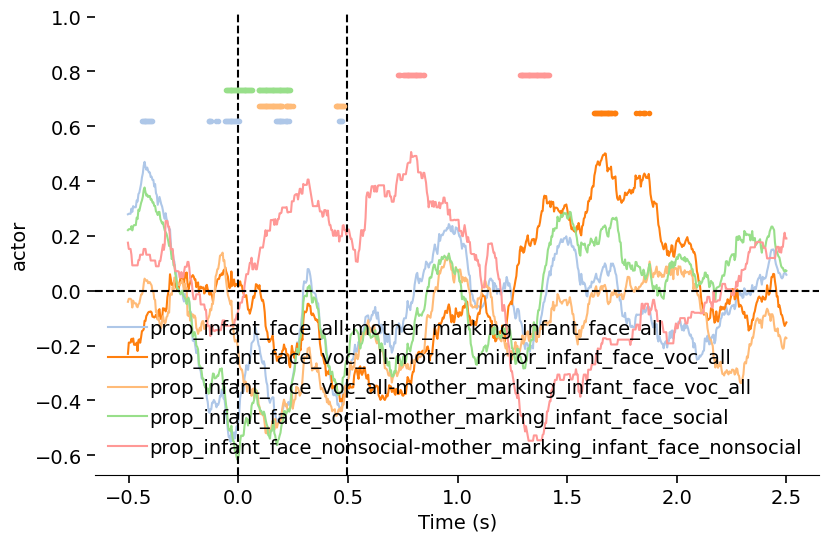

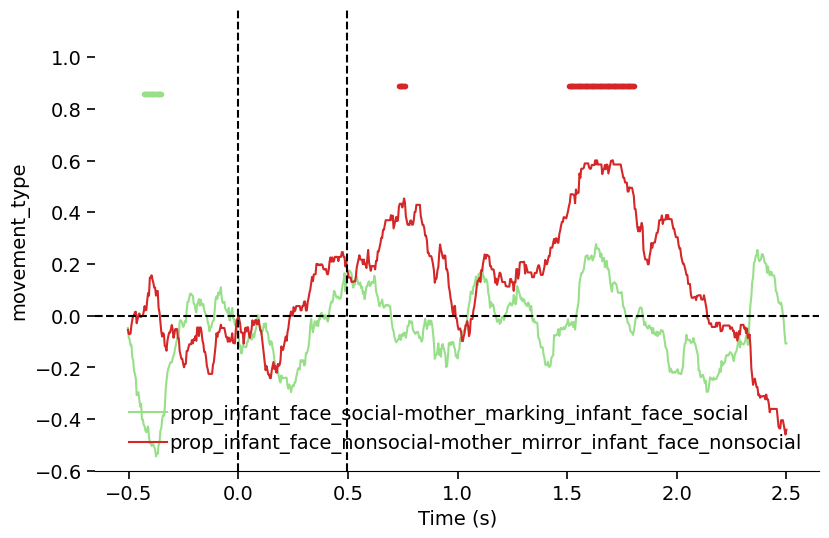

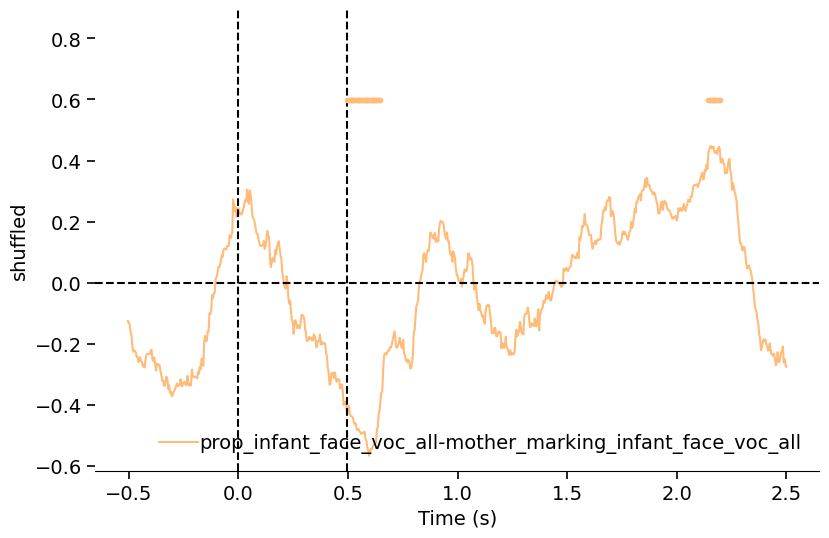

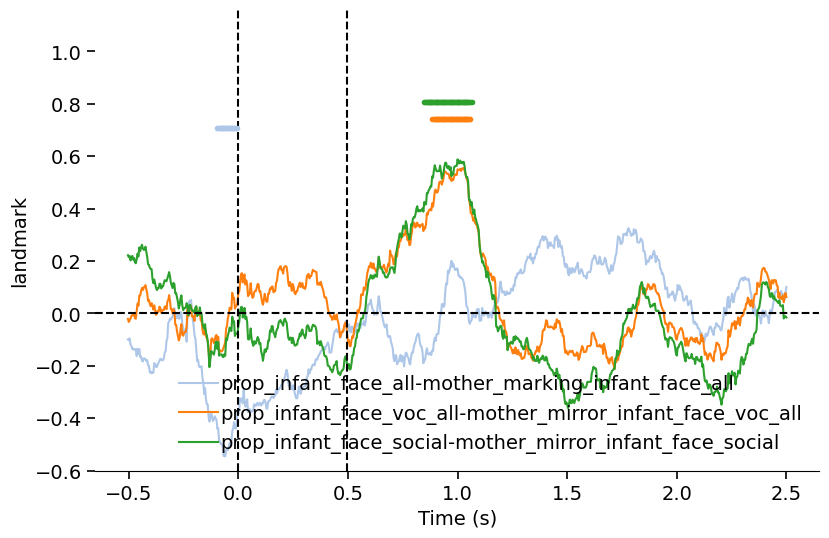

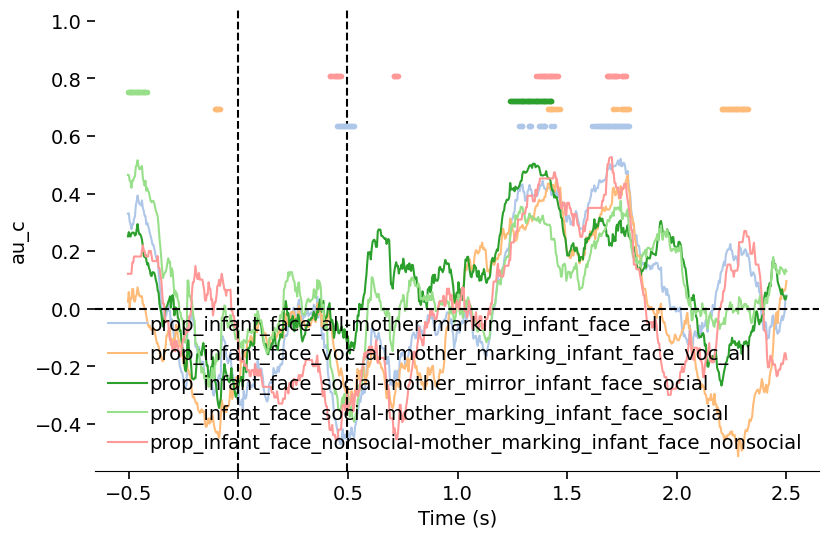

In [76]:
columns=[
    'prop_infant_face_all-mother_mirror_infant_face_all',
    'prop_infant_face_all-mother_marking_infant_face_all',
    'prop_infant_face_voc_all-mother_mirror_infant_face_voc_all',
    'prop_infant_face_voc_all-mother_marking_infant_face_voc_all',
    'prop_infant_face_social-mother_mirror_infant_face_social',
    'prop_infant_face_social-mother_marking_infant_face_social',
    'prop_infant_face_nonsocial-mother_mirror_infant_face_nonsocial',
    'prop_infant_face_nonsocial-mother_marking_infant_face_nonsocial'
    
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

In [77]:
columns=[
    'infant_face_voc_all',
    'infant_face_all',
    'prop_infant_face_voc_all-mother_all',
    'prop_infant_face_all-mother_all'
    
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyboardInterrupt: 

In [24]:
columns=[
    'infant_face_all',
    'infant_face_voc_all',
    'prop_infant_face_all-mother_all_v2',
    'prop_infant_face_voc_all-mother_all_v2',
    'prop_infant_face_all-mother_mirror_infant_face_all',
    'prop_infant_face_voc_all-mother_mirror_infant_face_voc_all',
    'prop_infant_face_all-mother_affirm_mark_infant_face_all',
    'prop_infant_face_voc_all-mother_affirm_mark_infant_face_voc_all',
    'prop_infant_face_all-mother_vitality_affect_infant_face_all',
    'prop_infant_face_voc_all-mother_vitality_affect_infant_face_voc_all',
    
    
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyError: None

In [25]:
columns=[
    'prop_infant_face_smile_mouth_open-mother_all_v2_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open-mother_mirror_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open-mother_affirm_mark_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open-mother_vitality_affect_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open-mother_negating_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open_neg-mother_all_v2_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open_neg-mother_mirror_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open_neg-mother_affirm_mark_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open_neg-mother_vitality_affect_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open_neg-mother_negating_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open-mother_mirror_marking_v2_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open_neg-mother_mirror_marking_v2_infant_face_smile_mouth_open_neg'
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


KeyError: None

In [26]:
columns=[
    'prop_infant_face_all-mother_mirror_marking_v3_infant_face_all',
    'prop_infant_face_smile_mouth_open-mother_mirror_marking_v3_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open_neg-mother_mirror_marking_v3_infant_face_smile_mouth_open_neg'
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyError: None

In [27]:
columns=[
    'prop_infant_face_smile_mouth_open_neg-mother_mirror_v2_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open-mother_mirror_v2_infant_face_smile_mouth_open',
    'prop_infant_face_all-mother_mirror_v2_infant_face_all'
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyError: None

In [28]:
columns=[
    'prop_infant_face_smile_mouth_open_neg-mother_affirm_mark_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open_neg-mother_direct_mirror_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open_neg-mother_enrich_mirror_infant_face_smile_mouth_open_neg',
    'prop_infant_face_smile_mouth_open_neg-mother_modified_mirror_infant_face_smile_mouth_open_neg'
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyError: None

In [29]:
columns=[
    'prop_infant_face_smile_mouth_open-mother_affirm_mark_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open-mother_direct_mirror_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open-mother_enrich_mirror_infant_face_smile_mouth_open',
    'prop_infant_face_smile_mouth_open-mother_modified_mirror_infant_face_smile_mouth_open'
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyError: None

In [30]:
columns=[
    'prop_infant_face_all-mother_affirm_mark_infant_face_all',
    'prop_infant_face_all-mother_direct_mirror_infant_face_all',
    'prop_infant_face_all-mother_enrich_mirror_infant_face_all',
    'prop_infant_face_all-mother_modified_mirror_infant_face_all'
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyError: None

In [31]:
columns=[
    'prop_infant_face_all-mother_mirror_infant_face_all',
    'prop_infant_face_all-mother_marking_infant_face_all',
    'prop_infant_face_voc_all-mother_mirror_infant_face_voc_all',
    'prop_infant_face_voc_all-mother_marking_infant_face_voc_all',
    'prop_infant_face_social-mother_mirror_infant_face_social',
    'prop_infant_face_social-mother_marking_infant_face_social',
    'prop_infant_face_nonsocial-mother_mirror_infant_face_nonsocial',
    'prop_infant_face_nonsocial-mother_marking_infant_face_nonsocial'
    
]
for i in range(5):
    cluster_based_permutation_test(i, columns)

KeyError: None

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


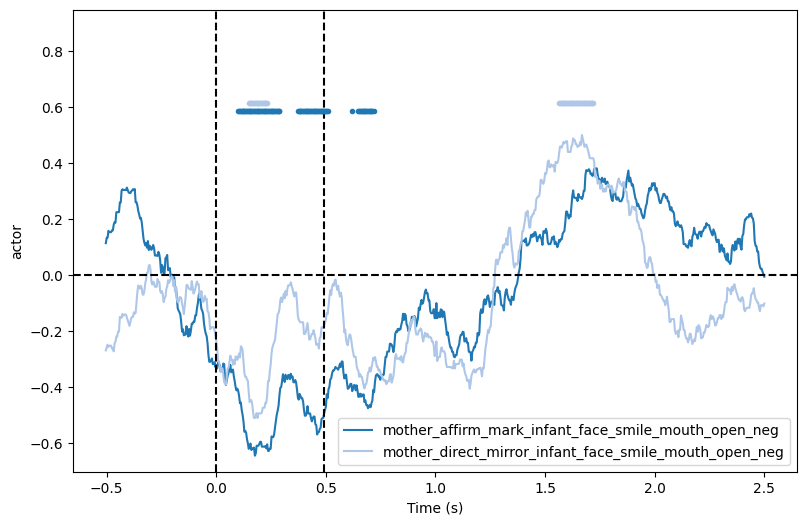

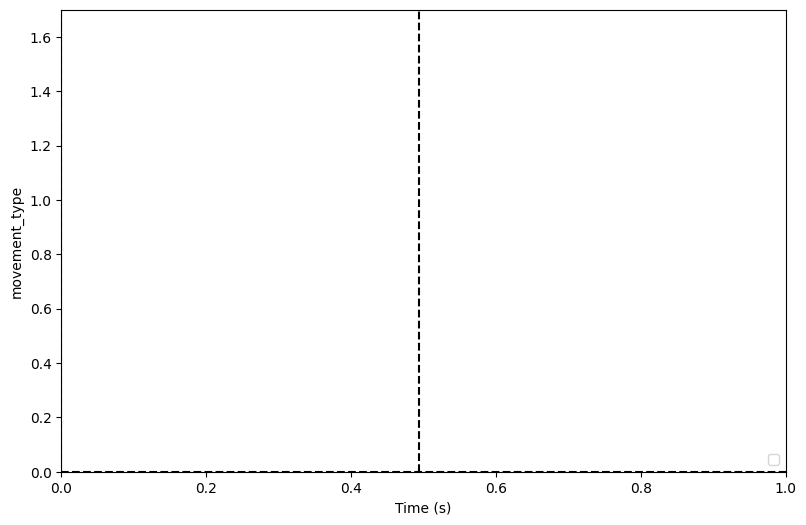

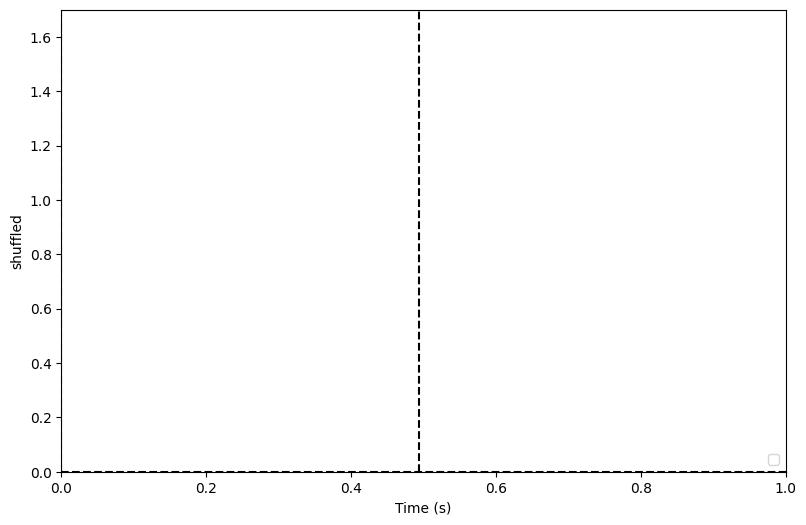

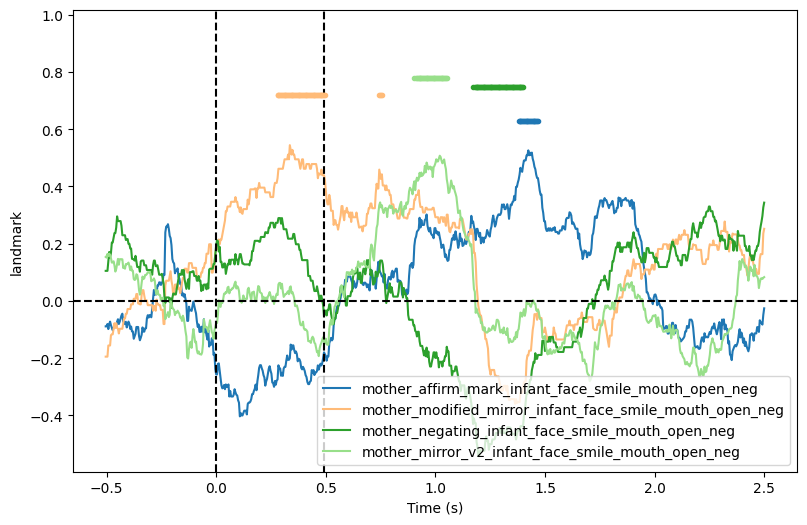

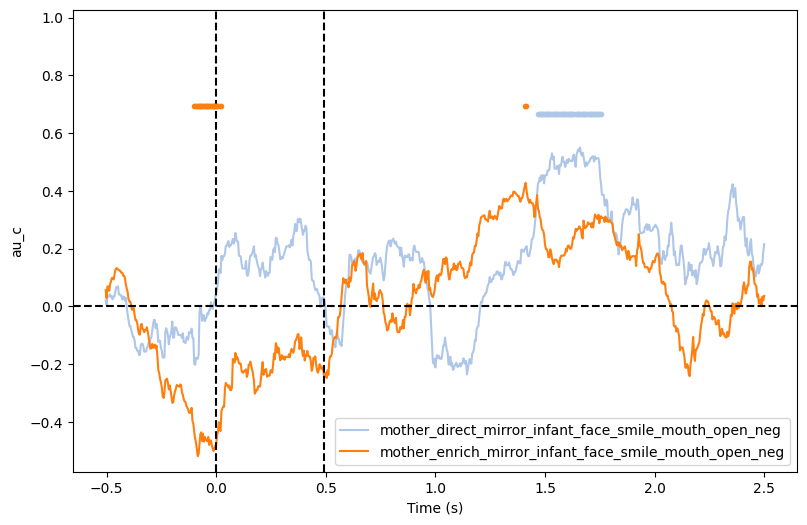

In [32]:
columns=[
    'mother_affirm_mark_infant_face_smile_mouth_open_neg',
    'mother_direct_mirror_infant_face_smile_mouth_open_neg',
    'mother_enrich_mirror_infant_face_smile_mouth_open_neg',
    'mother_modified_mirror_infant_face_smile_mouth_open_neg',
    'mother_negating_infant_face_smile_mouth_open_neg',
    'mother_mirror_v2_infant_face_smile_mouth_open_neg',
    'mother_mirror_direct_enriched_infant_face_smile_mouth_open_neg',
]
control_columns=[
    'infant_face_smile_mouth_open_neg'
]
for i in range(5):
    cluster_based_permutation_test(i, columns, control_columns=control_columns)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


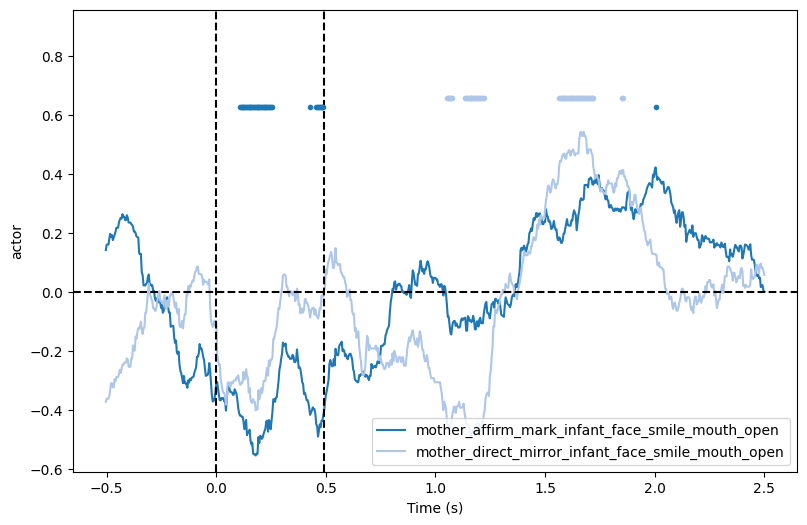

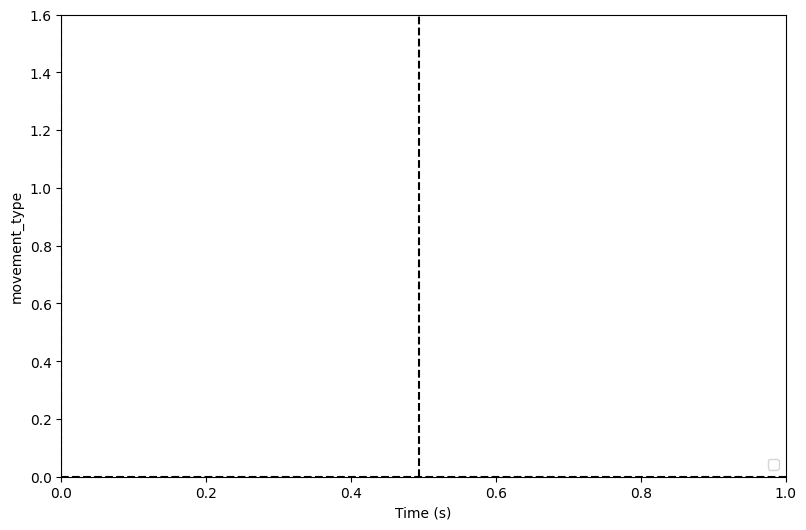

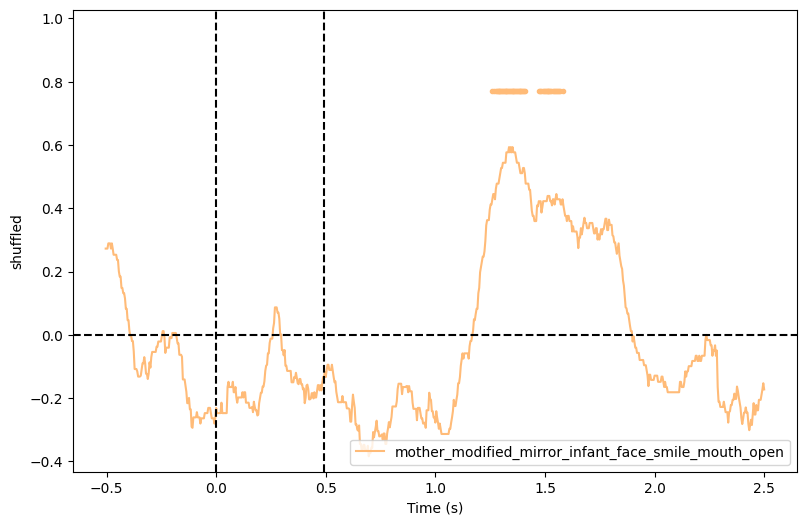

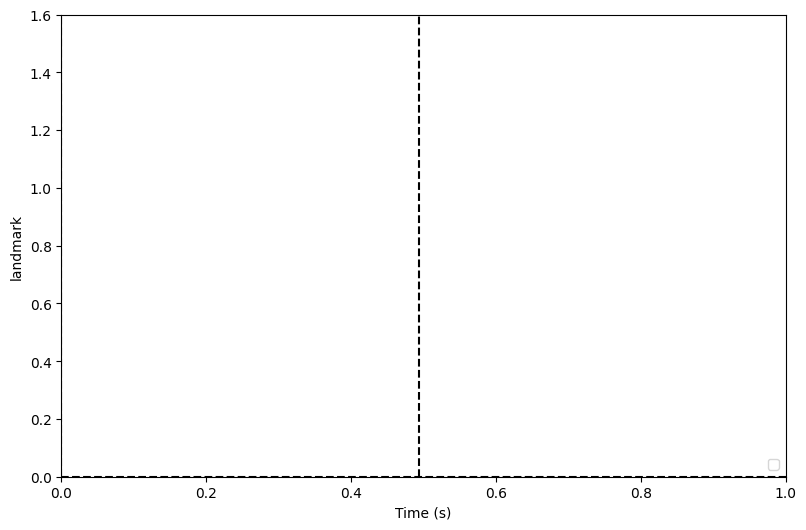

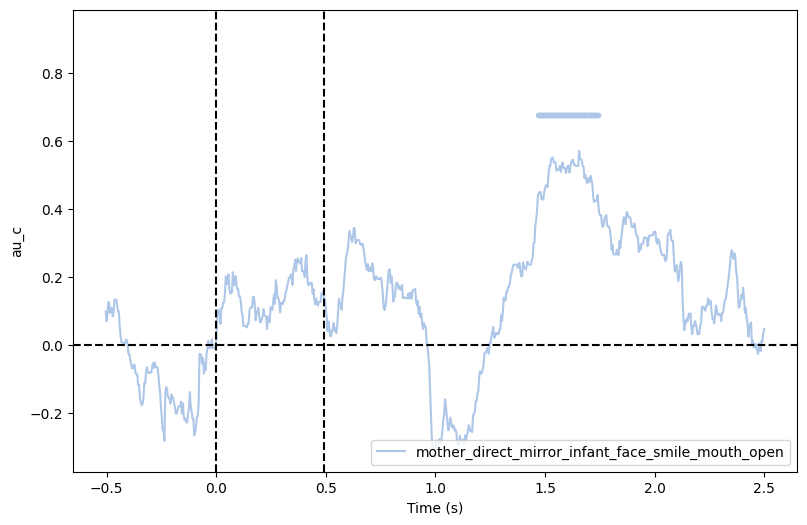

In [36]:
columns=[
    'mother_affirm_mark_infant_face_smile_mouth_open',
    'mother_direct_mirror_infant_face_smile_mouth_open',
    'mother_enrich_mirror_infant_face_smile_mouth_open',
    'mother_modified_mirror_infant_face_smile_mouth_open',
    'mother_mirror_v2_infant_face_smile_mouth_open',
    'mother_mirror_direct_enriched_infant_face_smile_mouth_open',
]
control_columns=[
    'infant_face_smile_mouth_open'
]

for i in range(5):
    cluster_based_permutation_test(i, columns, control_columns=control_columns)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Process LokyProcess-131:
Traceback (most recent call last):
  File "/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 370, in _sendback_result
    result_queue.put(
  File "/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.8/site-packages/joblib/externals/loky/backend/queues.py", line 230, in put
    obj = dumps(obj, reducers=self._reducers)
  File "/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.8/site-packages/joblib/externals/loky/backend/reduction.py", line 215, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/home/bonaiuto/miniconda3/envs/face_blaster/lib/python3.

KeyboardInterrupt: 

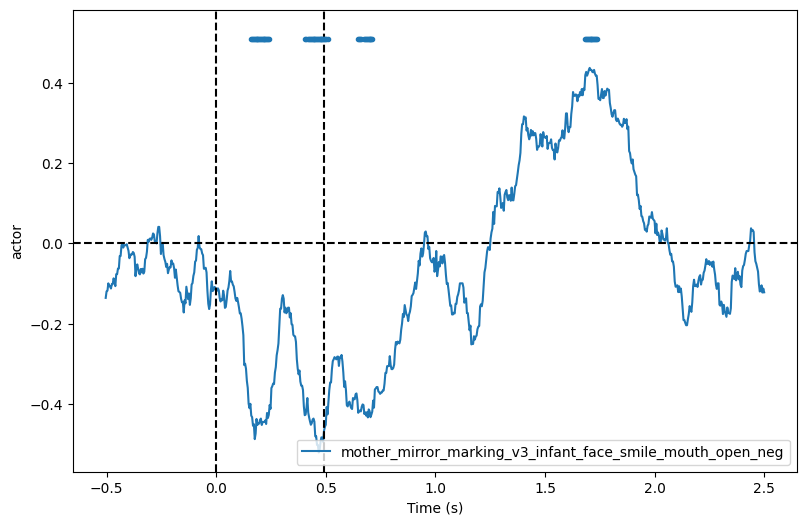

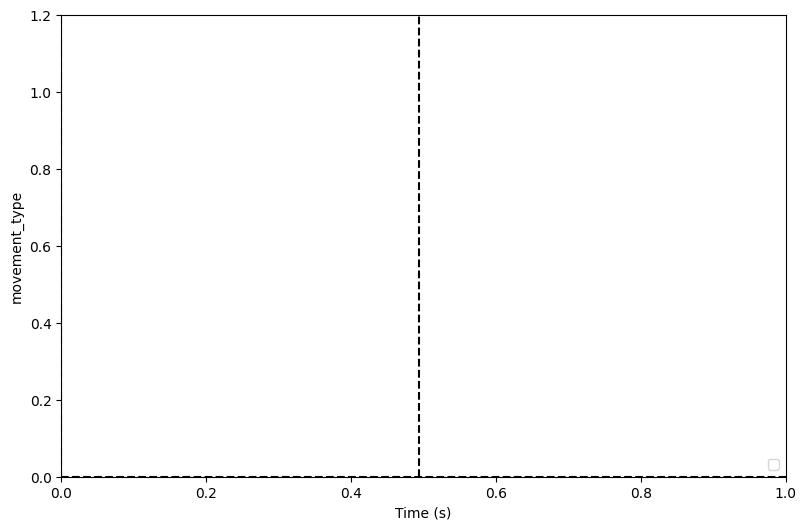

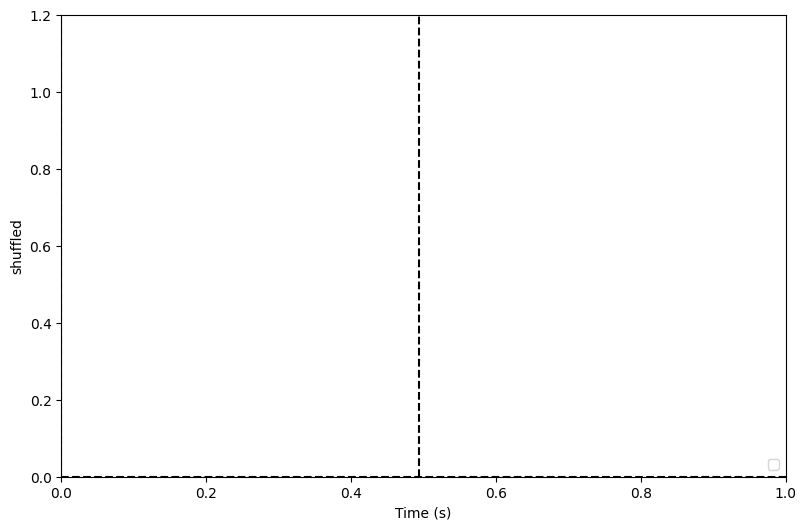

In [34]:
columns=[
    'mother_mirror_marking_v3_infant_face_smile_mouth_open_neg',
    'mother_mirror_direct_enriched_infant_face_smile_mouth_open_neg',
]
control_columns=[
    'infant_face_smile_mouth_open_neg'
]
for i in range(5):
    cluster_based_permutation_test(i, columns, control_columns=control_columns)

In [ ]:
columns=[
    'mother_mirror_marking_v3_infant_face_smile_mouth_open',
    'mother_mirror_direct_enriched_infant_face_smile_mouth_open',
]
control_columns=[
    'infant_face_smile_mouth_open'
]
for i in range(5):
    cluster_based_permutation_test(i, columns, control_columns=control_columns)

In [81]:
def plot_pca_correlation(c_idx, pca_df, pc, time, name):
    model_data = epochs_per_model[test_models[c_idx]].get_data() * 1e6
    clus_corr = np.mean(model_data, axis=1)
    times = epochs_per_model[test_models[c_idx]].times#+win_sz_ms/2/1000
    t_idx = np.argmin(np.abs(times-time))
    
    behav_vals = np.array(pca_df[f'PC{pc+1}'].dropna().values)
    valid_indices = ~np.isnan(pca_df[f'PC{pc+1}'])  # Indices of non-NaN behavioral values
    non_outliers = np.abs(behav_vals-np.mean(behav_vals))<2.5*np.std(behav_vals)
    valid_indices = valid_indices & non_outliers
    behav_vals=behav_vals[non_outliers]
    corr_vals = clus_corr[valid_indices, t_idx]
    
    # Prepare to plot
    plt.figure()
    plt.scatter(behav_vals, corr_vals, color='blue', alpha=0.5, label='Data points')
    plt.xlabel(f'PC{pc+1}')
    plt.ylabel(test_models[c_idx])

    # Bootstrap linear regression for prediction CI
    n_bootstraps = 10000
    predictions = []
    x_vals = np.linspace(min(behav_vals), max(behav_vals), 100)
    
    for _ in range(n_bootstraps):
        sample_indices = resample(np.arange(len(behav_vals)))
        sample_behav = behav_vals[sample_indices]
        sample_corr = corr_vals[sample_indices]
        slope, intercept, _, _, _ = linregress(sample_behav, sample_corr)
        pred_y = slope * x_vals + intercept
        predictions.append(pred_y)

    predictions = np.array(predictions)
    ci_lower = np.percentile(predictions, 2.5, axis=0)
    ci_upper = np.percentile(predictions, 97.5, axis=0)
    
    # Plot mean prediction line
    mean_predictions = np.mean(predictions, axis=0)
    plt.plot(x_vals, mean_predictions, 'r-', label='Regression Line')
    
    # Add shaded confidence interval
    plt.fill_between(x_vals, ci_lower, ci_upper, color='gray', alpha=0.2, label='95% CI')
    
    # Spearman correlation and p-value
    stat, p_val = spearmanr(behav_vals, corr_vals)
    print(f'rho={stat}, p={p_val}')

    plt.savefig(os.path.join(out_base_path, 'figures', f'pca_behav-dynamic_rsa_{name}_{test_models[c_idx]}_PC{pc+1}_{time}.pdf'))
    plt.savefig(os.path.join(out_base_path, 'figures', f'pca_behav-dynamic_rsa_{name}_{test_models[c_idx]}_PC{pc+1}_{time}.png'))


def cluster_based_permutation_test_pca(c_idx, pca_df, name, control_columns=[], n_pcs=3, num_permutations=10000, significance_threshold=0.05, ylims=[]):
    def compute_permutation_stats(clus_corr, behav_values, num_time_points, control_values=None):
        perm_stat = []
        np.random.shuffle(behav_values)  # Permutation

        y=clus_corr[:,:]

        if control_values is not None and control_values.shape[1]>0:
            controls=control_values[:,:]
            model_y = LinearRegression().fit(controls, y)
            y_resid = y - model_y.predict(controls)
        else:
            y_resid = y
            
        for t in range(num_time_points):
            stat, _ = spearmanr(behav_values, y_resid[:, t])
            perm_stat.append(stat)
        return perm_stat
    
    def find_significant_clusters(sig_indices, min_cluster_size):
        clusters = []
        cluster = []
        for idx in sig_indices:
            if len(cluster) == 0 or idx == cluster[-1] + 1:
                cluster.append(idx)
            else:
                if len(cluster) >= min_cluster_size:
                    clusters.extend(cluster)
                cluster = [idx]
        if len(cluster) >= min_cluster_size:
            clusters.extend(cluster)
        return clusters

    cmap = plt.get_cmap('Set1')
    
    # Extract EEG and behavioral data
    model_data = epochs_per_model[test_models[c_idx]].get_data() * 1e6
    clus_corr = np.mean(model_data, axis=1)
    times = epochs_per_model[test_models[c_idx]].times
    
    # Calculate actual correlations and p-values
    real_col_stat = []
    real_col_pval = []
    for pc in range(n_pcs):
        behav_values = np.array(pca_df[f'PC{pc+1}'].dropna().values)
        valid_indices = ~np.isnan(pca_df[f'PC{pc+1}'])  # Indices of non-NaN behavioral values
        non_outliers = np.abs(behav_values-np.mean(behav_values))<2.5*np.std(behav_values)
        valid_indices = valid_indices & non_outliers
        behav_values=behav_values[valid_indices]

        y=clus_corr[valid_indices,:]

        if len(control_columns):
            controls=np.array(filtered_df[control_columns].values)[valid_indices,:].reshape(-1,len(control_columns))
            model_y = LinearRegression().fit(controls, y)
            y_resid = y - model_y.predict(controls)
        else:
            y_resid = y
            
        t_stat, t_pval = [], []
        for t in range(clus_corr.shape[-1]):
            if len(behav_values) > 0:
                stat, p_val = spearmanr(behav_values, y_resid[:, t])
                t_stat.append(stat)
                t_pval.append(p_val)
            else:
                t_stat.append(np.nan)
                t_pval.append(np.nan)
        real_col_stat.append(t_stat)
        real_col_pval.append(t_pval)
    
    # Parallel computation of permutations
    all_perm_stats = Parallel(n_jobs=-1)(
        delayed(compute_permutation_stats)(clus_corr, behav_values, clus_corr.shape[-1], control_values=np.array(filtered_df[control_columns].values))
        for _ in range(num_permutations)
        for behav_values in [np.array(pca_df[f'PC{pc+1}'].dropna().values) for pc in range(n_pcs)]
    )
    
    # Reshape the results to [columns, permutations, time points]
    perm_col_stats = np.array(all_perm_stats).reshape(n_pcs, num_permutations, -1)
    
    # Determine significance thresholds
    threshold = np.percentile(abs(perm_col_stats), 95, axis=1)  # percentiles per column

    corrs_to_plot=[]
    # Plotting results
    plt.figure(figsize=(9.346, 6))
    all_sig_idx = []
    for i, (col_stat, col_pval) in enumerate(zip(real_col_stat, real_col_pval)):
        significant_indices = (np.abs(np.array(col_stat)) > threshold[i]) & (np.array(col_pval) < significance_threshold)
        significant_clusters = find_significant_clusters(np.where(significant_indices)[0], min_cluster_size=50)        
        
        # Mark significant points
        if any(significant_clusters) and np.max(np.abs(col_stat)) > 0.5:
            all_sig_idx.append(significant_clusters)
            plt.plot(times, col_stat, label=f'PC{i+1}', color=cmap(i))  # plot correlation over time

            max_time=times[np.argmax(np.abs(col_stat))]
            corrs_to_plot.append((c_idx,i,max_time))
        else:
            all_sig_idx.append([])
    
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    plt.axvline(exp_time, color='k', linestyle='--')
    
    yl = plt.ylim()
    pos_range = yl[1]
    
    for i in range(len(all_sig_idx)):
        for t in all_sig_idx[i]:
            plt.plot(times[t], yl[1] + .05 * pos_range + .05 * pos_range * i, '.', color=cmap(i))
    
    
    if len(ylims):
        plt.ylim(ylims)
    else:
        new_yl = [yl[0], yl[1] + len(all_sig_idx) * .1 * pos_range]
        plt.ylim(new_yl)    
    
    plt.legend(loc='lower right')
    plt.xlabel('Time (s)')
    plt.ylabel(test_models[c_idx])

    plt.savefig(os.path.join(out_base_path, 'figures', f'pca_behav-dynamic_rsa_{name}_{test_models[c_idx]}.pdf'))
    plt.savefig(os.path.join(out_base_path, 'figures', f'pca_behav-dynamic_rsa_{name}_{test_models[c_idx]}.png'))

    for (c_idx,i,max_time) in corrs_to_plot:
        plot_pca_correlation(c_idx, pca_df, i, max_time, name)

In [26]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_infant_face.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'infant_face', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_infant_face_voc.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'infant_face_voc', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=5
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face', n_pcs=n_pcs, ylims=[-.65, .95])

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_voc.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_voc', n_pcs=n_pcs, ylims=[-.65, .95])

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_v2.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_v2', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_voc_v2.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_voc_v2', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_smile_mouth_open.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_smile_mouth_open', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_smile_mouth_open_neg.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_smile_mouth_open_neg', n_pcs=n_pcs)

In [684]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_mirror_marking_v2_infant_face_smile_mouth_open.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=0.6979101737049291, p=0.0003046546845365693


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=0.5548073553374416, p=0.007364030818444455


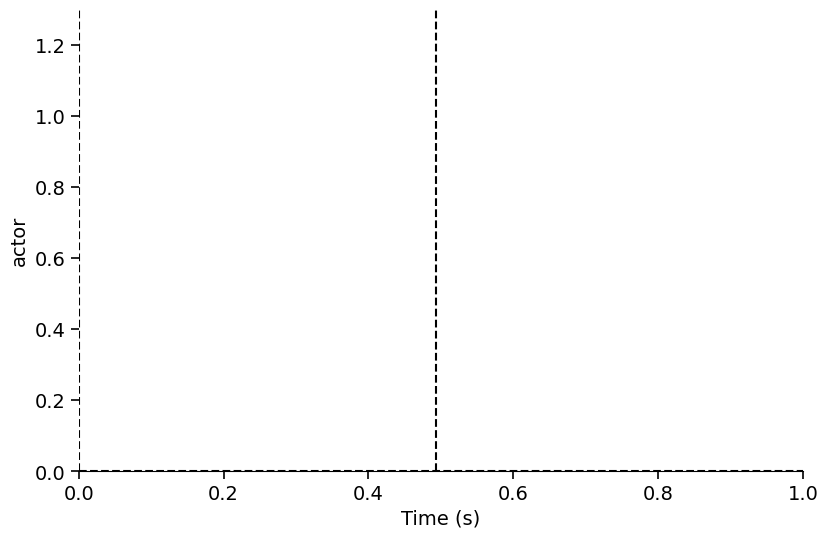

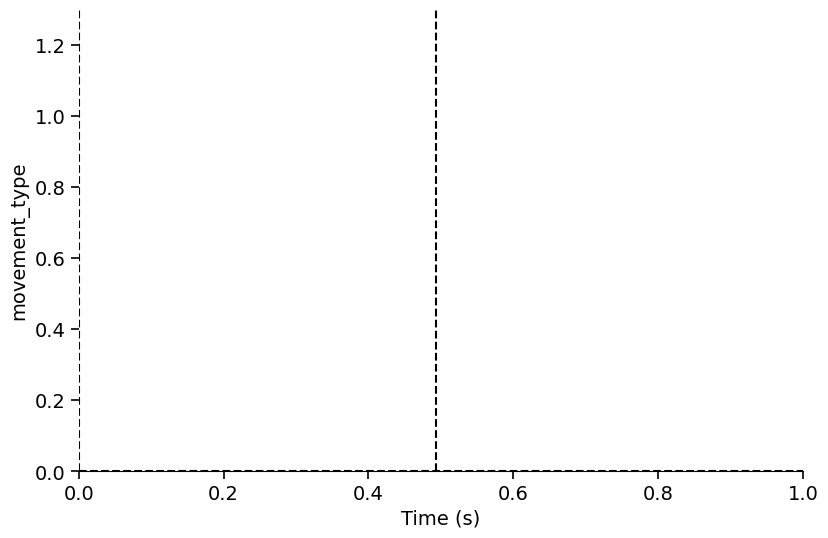

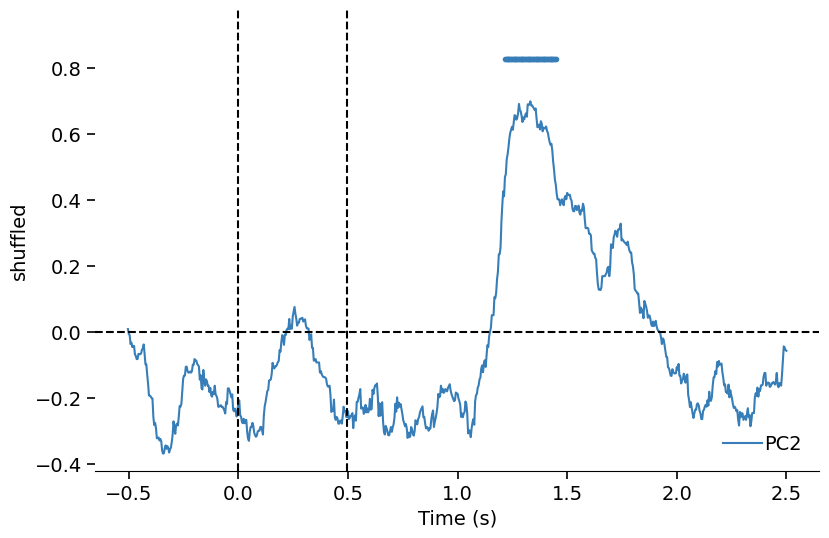

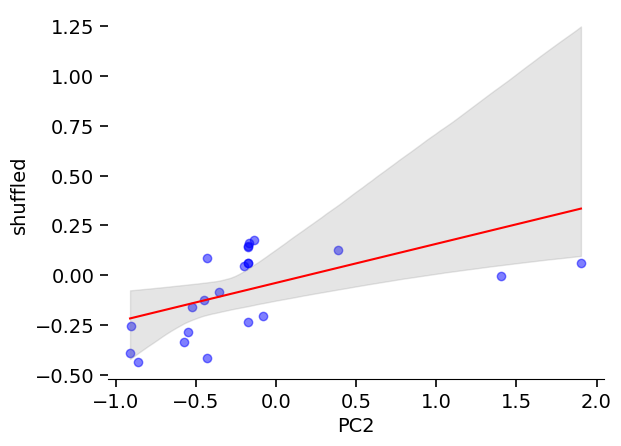

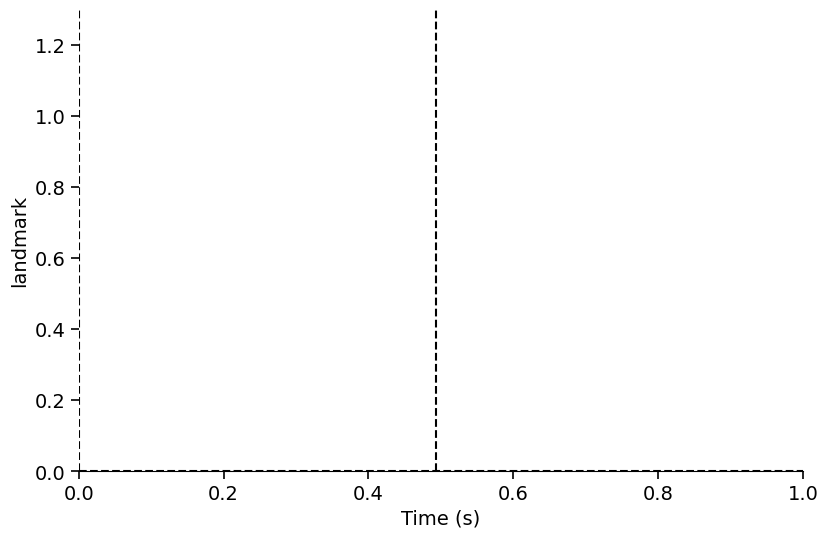

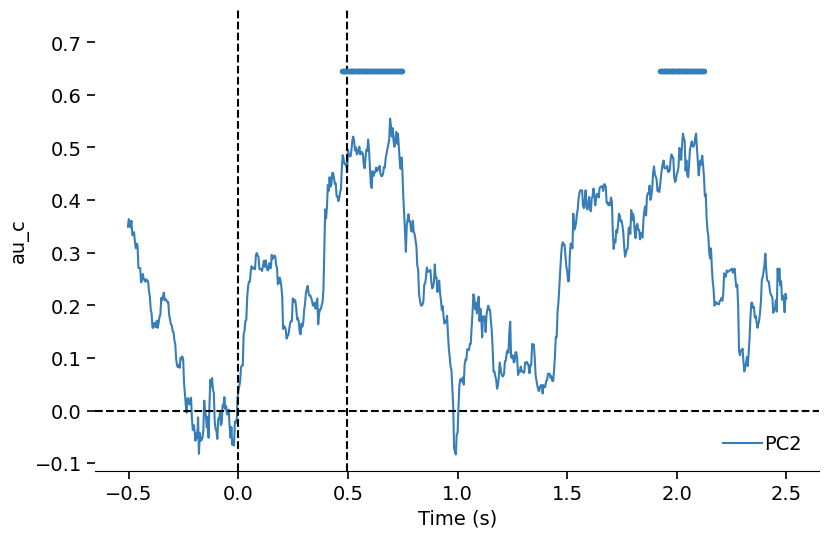

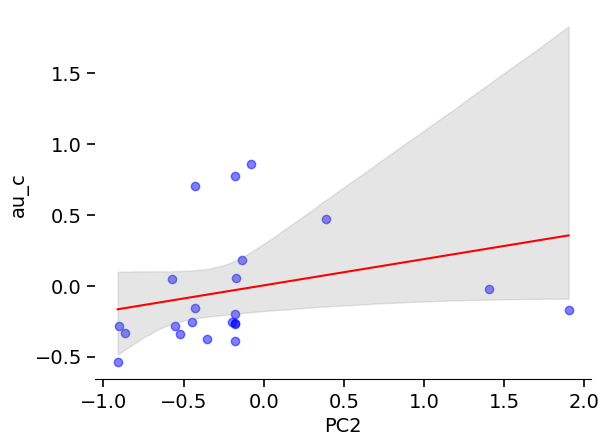

In [82]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_mirror_marking_v2_infant_face_smile_mouth_open', n_pcs=n_pcs)

In [85]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_mirror_marking_v2_infant_face_smile_mouth_open_neg.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=-0.6500592305895898, p=0.0010569598607070225
rho=0.5726402755325822, p=0.005347876375379748
rho=-0.6269082582089178, p=0.0017943028437750388
rho=-0.6963405978063106, p=0.00022361603881118514


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


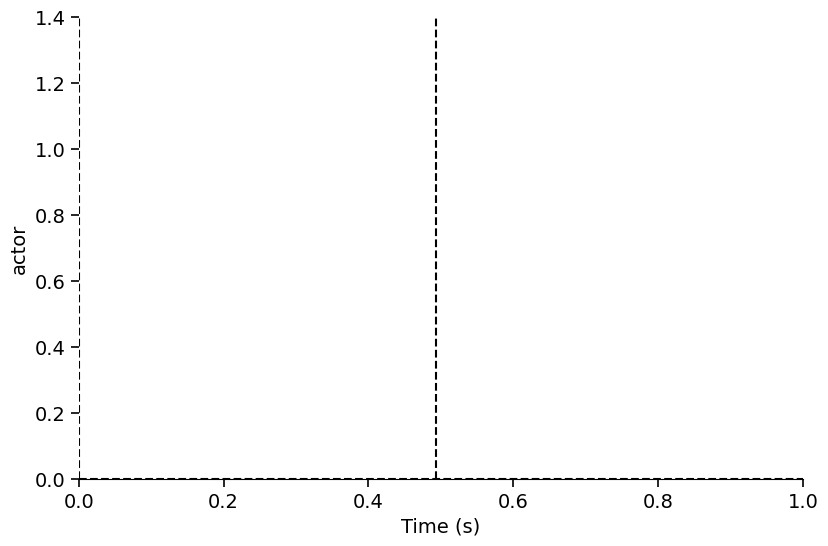

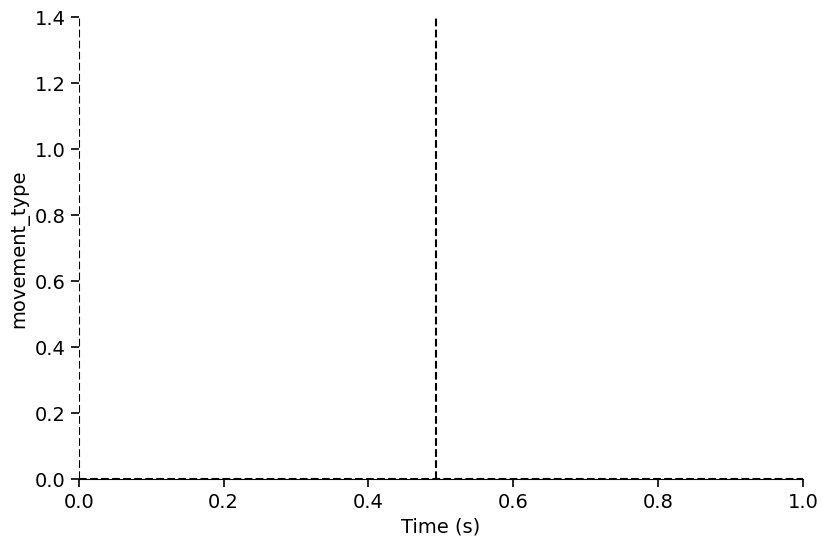

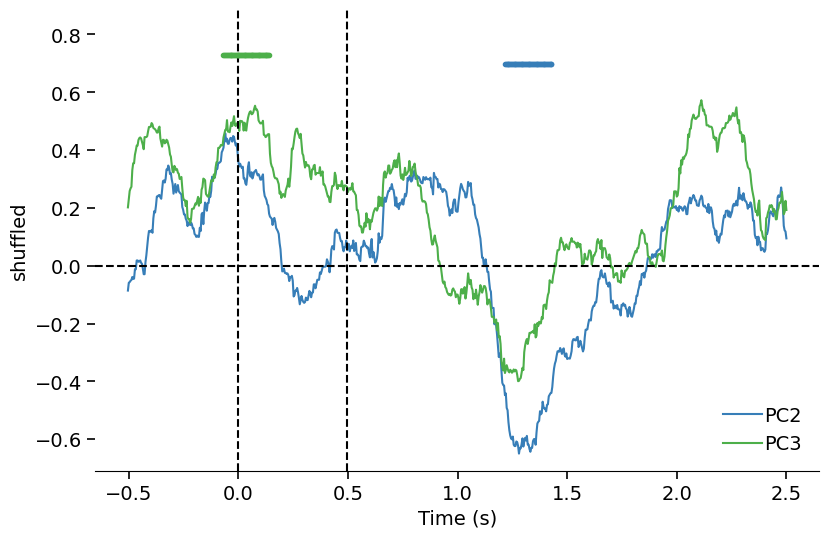

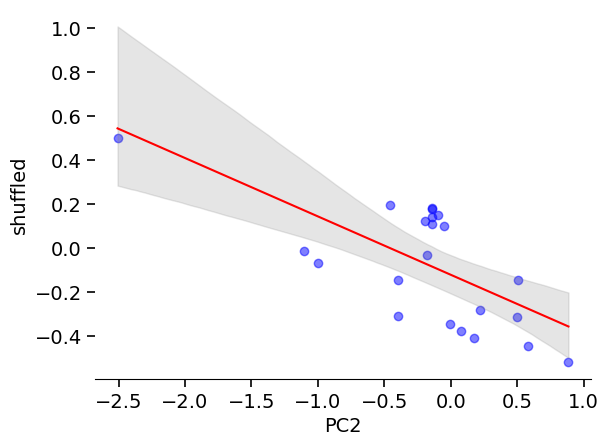

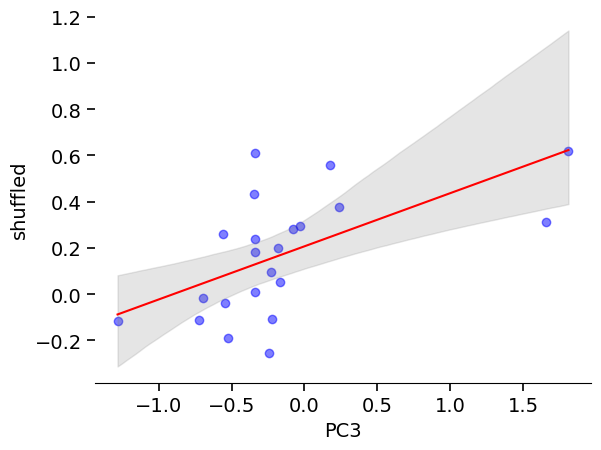

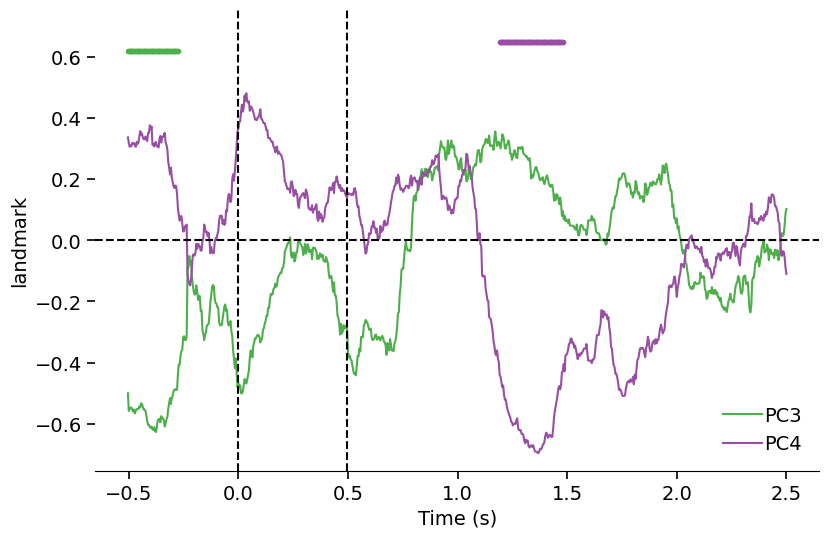

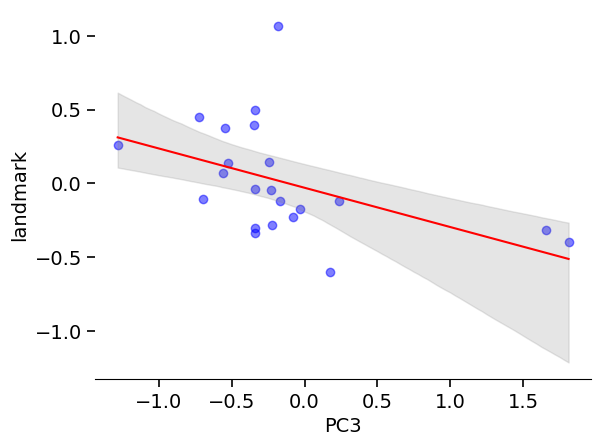

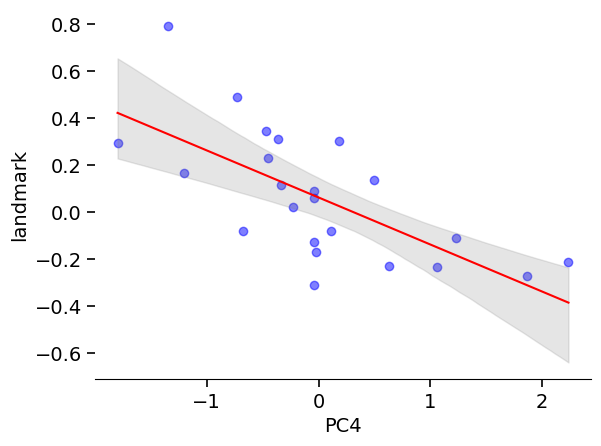

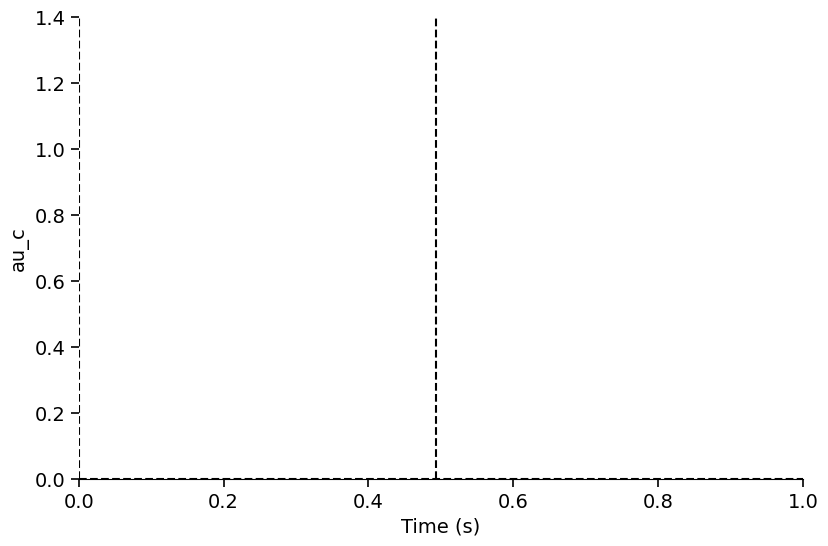

In [86]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_mirror_marking_v2_infant_face_smile_mouth_open_neg', n_pcs=n_pcs)

In [87]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_mirror_marking_v3_infant_face_smile_mouth_open_neg.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


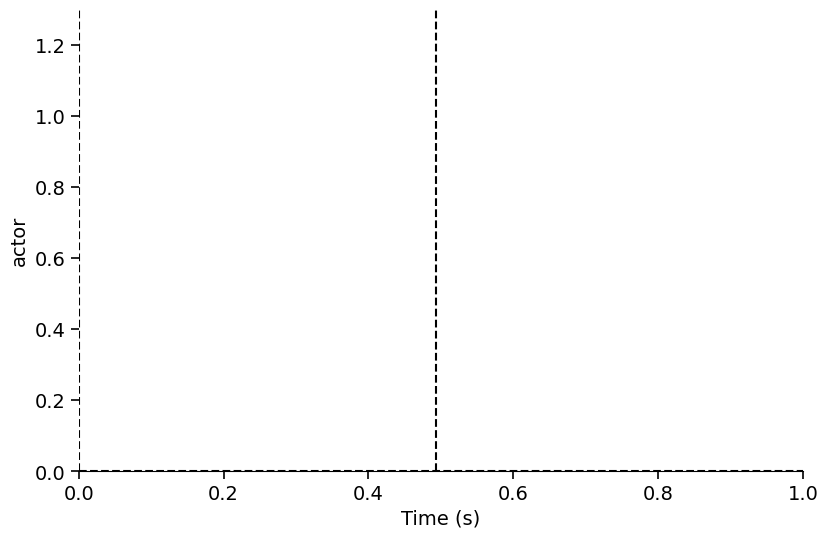

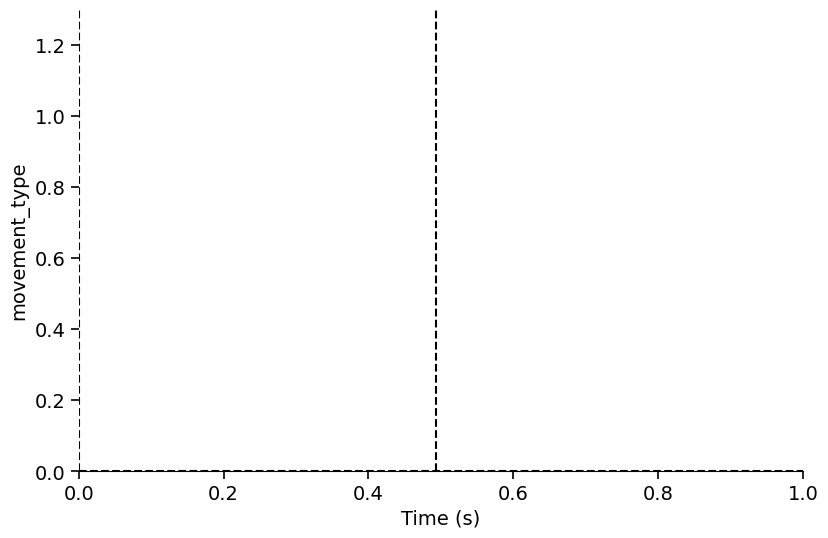

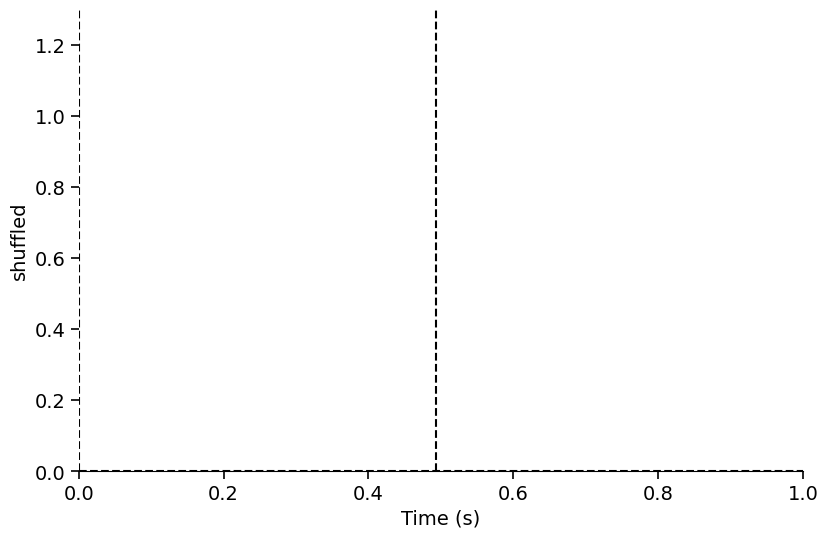

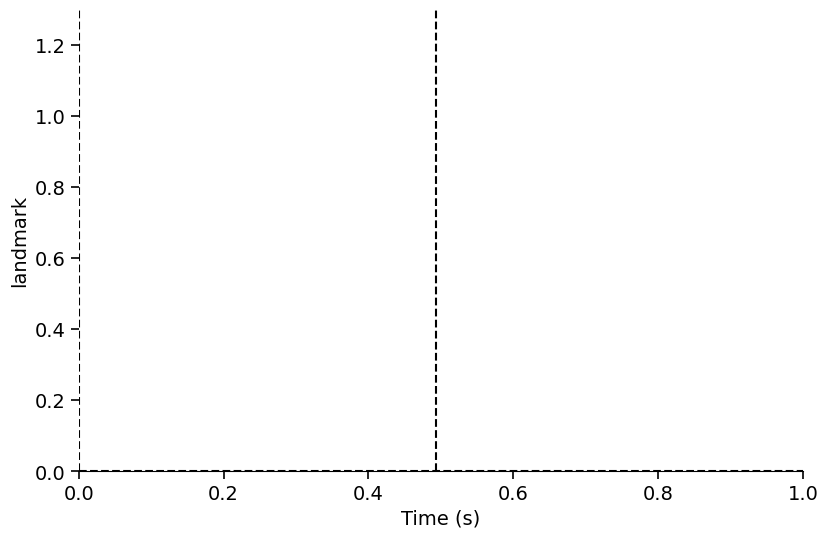

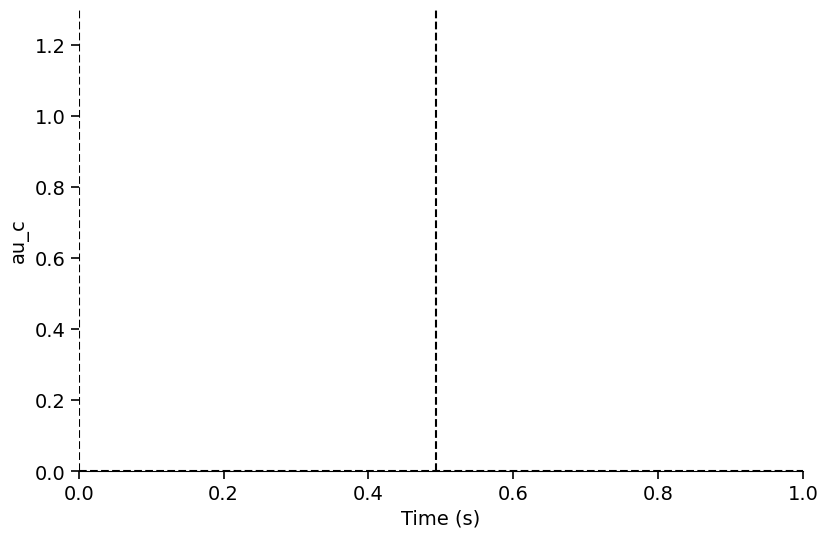

In [88]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_mirror_marking_v3_infant_face_smile_mouth_open_neg', n_pcs=n_pcs)

In [89]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_mirror_marking_v3_infant_face_smile_mouth_open.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=0.6979101737049291, p=0.0003046546845365693


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=0.5548073553374416, p=0.007364030818444455


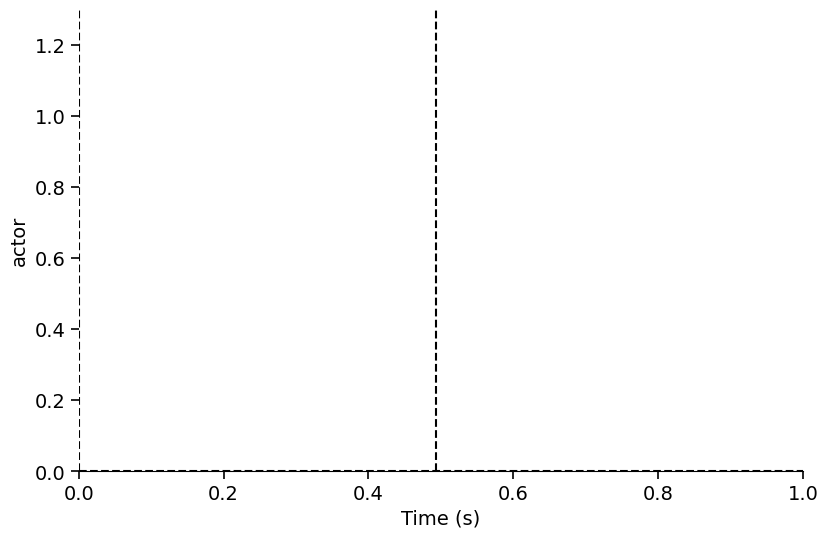

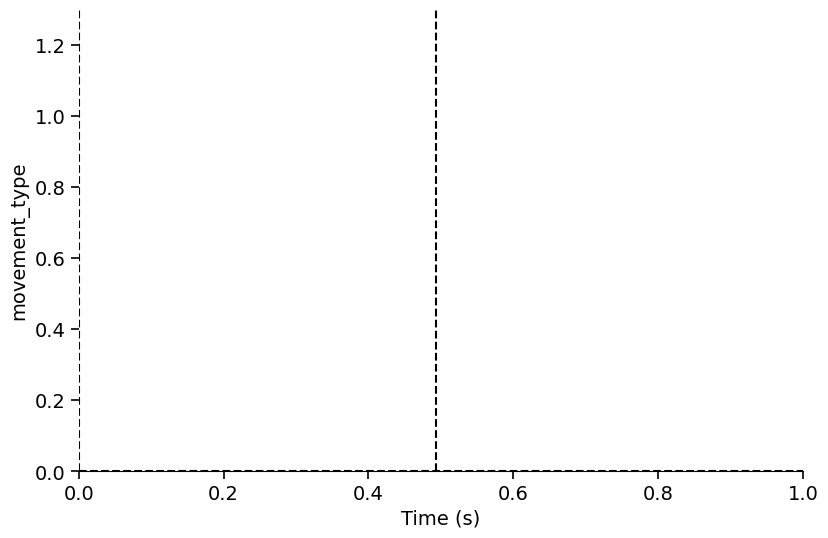

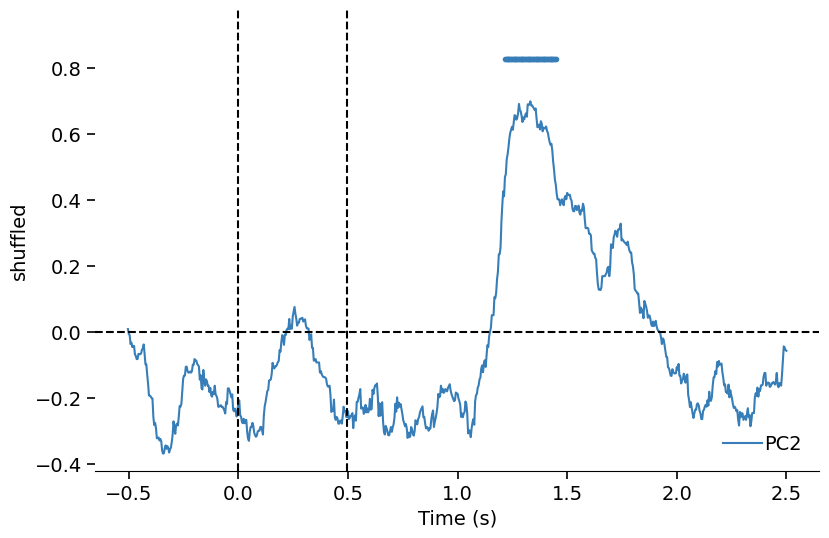

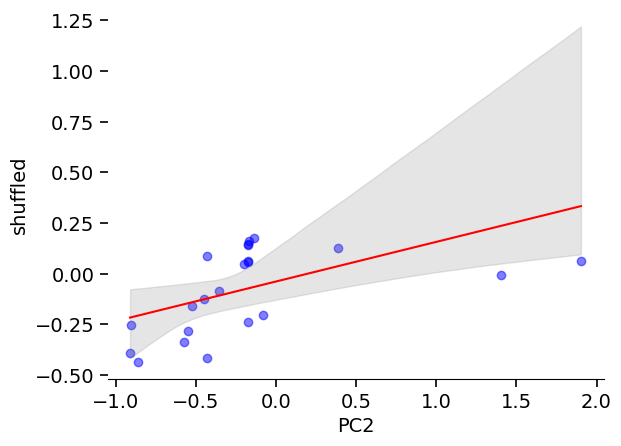

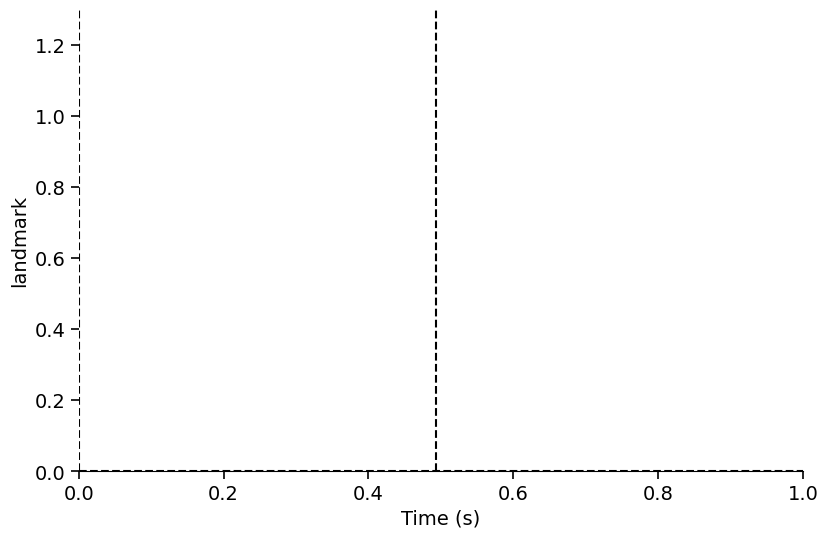

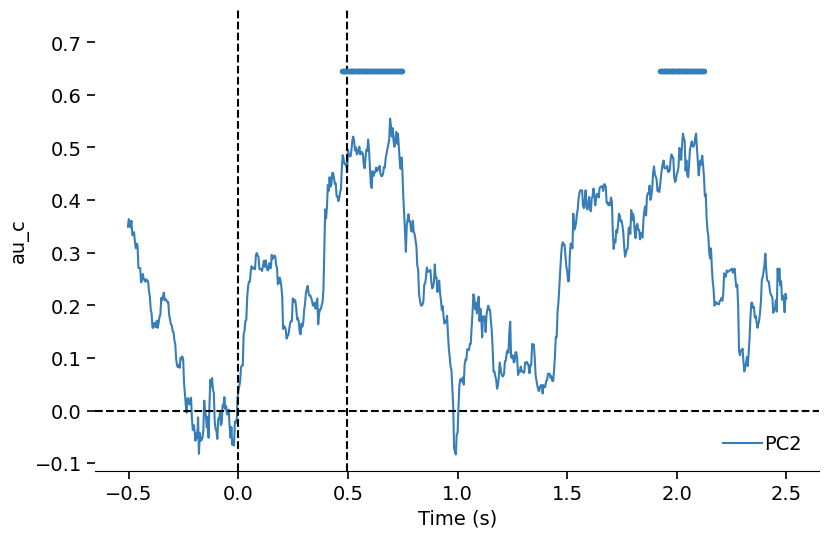

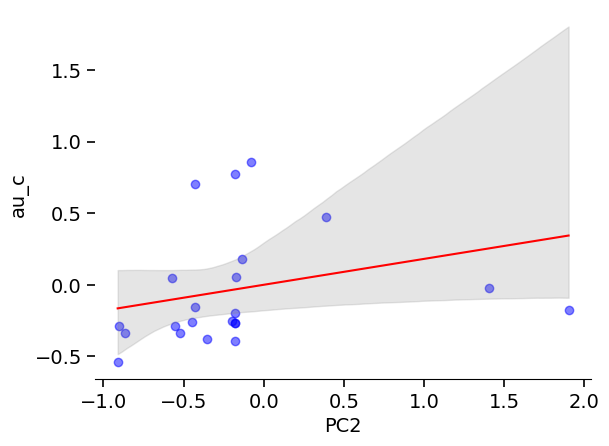

In [90]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_mirror_marking_v3_infant_face_smile_mouth_open', n_pcs=n_pcs)

In [697]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_mirror_marking_v3_infant_face_all.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

rho=0.5441067623482754, p=0.007274925314272645
rho=0.5302693514983647, p=0.009246128208561018
rho=-0.507201375774748, p=0.015981748486085346
rho=0.5749788424707055, p=0.005121412156688739
rho=-0.58215964218553, p=0.0035634599725338535
rho=0.598468019258639, p=0.0025546694986383497
rho=0.5609093326660242, p=0.00536312913908644
rho=0.5485545015500324, p=0.006720965227958242
rho=-0.5569048513517835, p=0.0070984598014726605


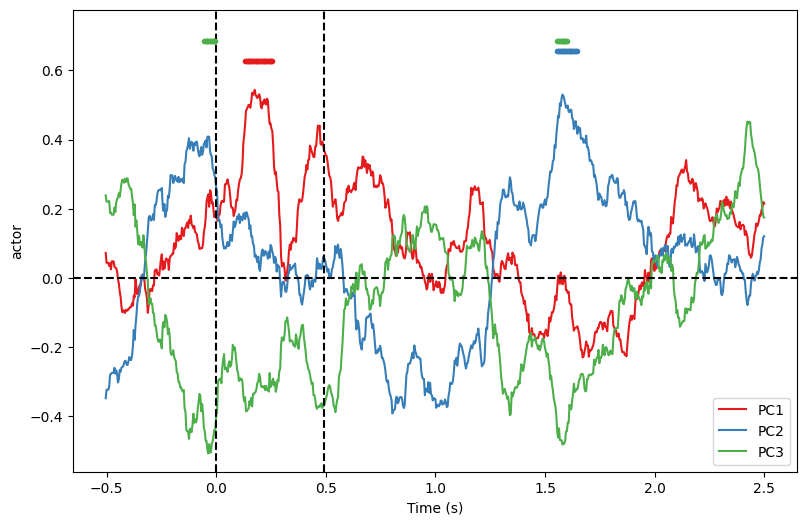

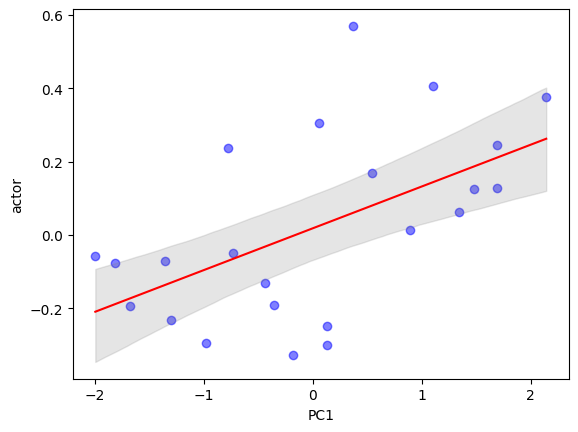

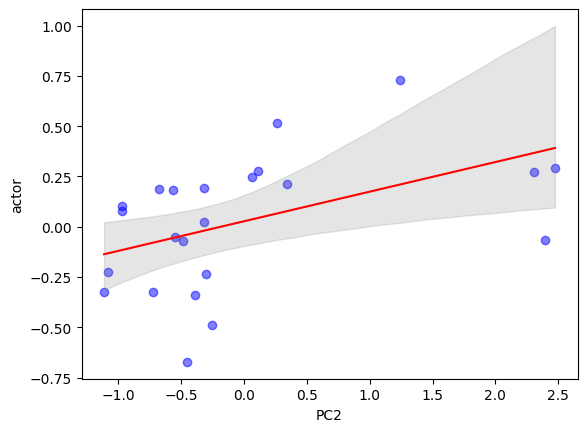

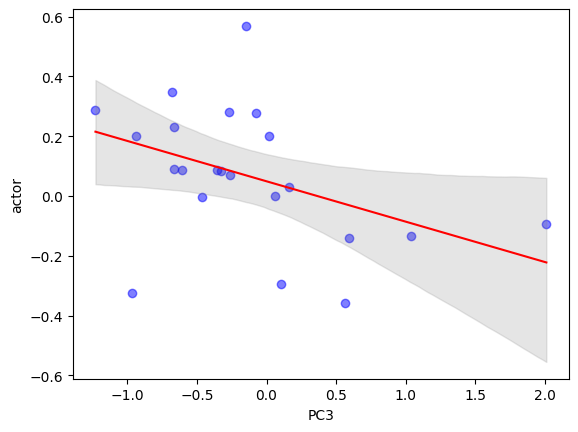

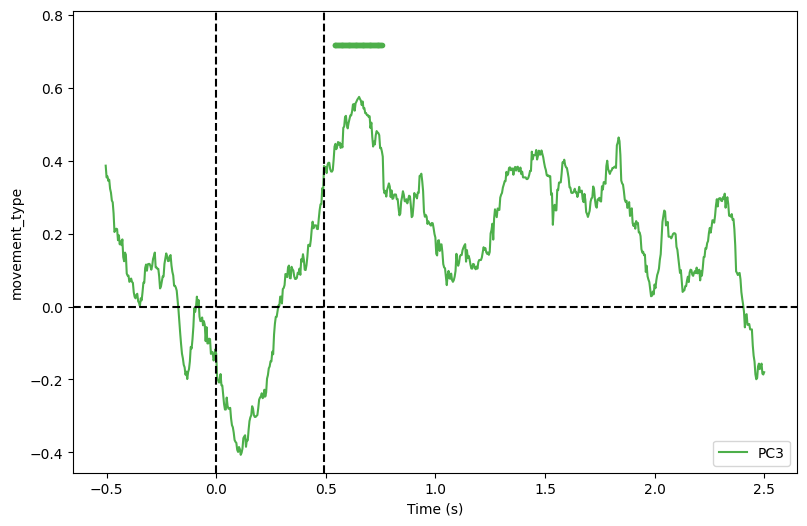

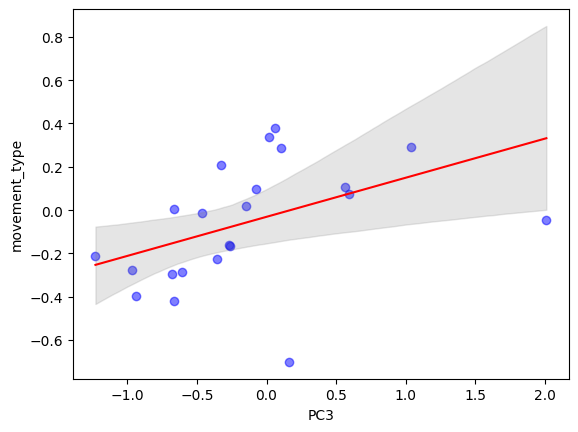

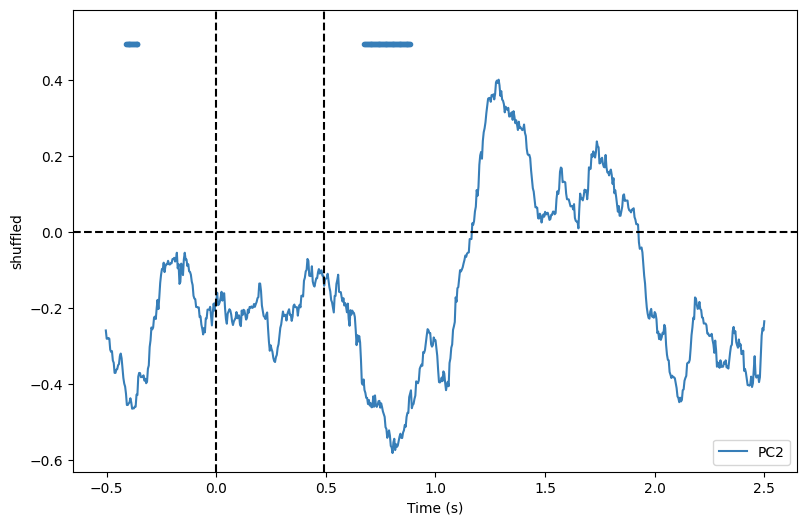

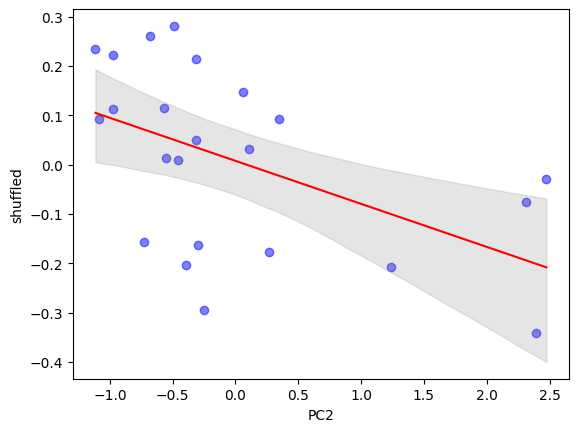

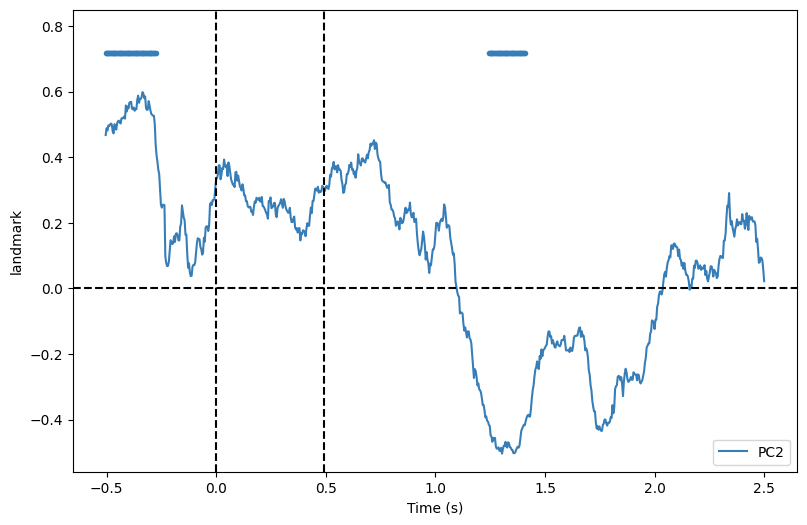

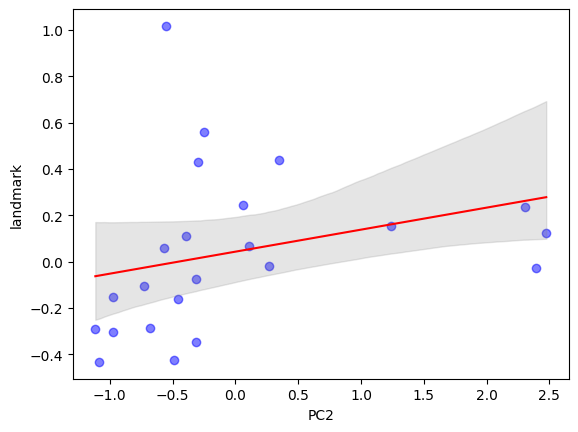

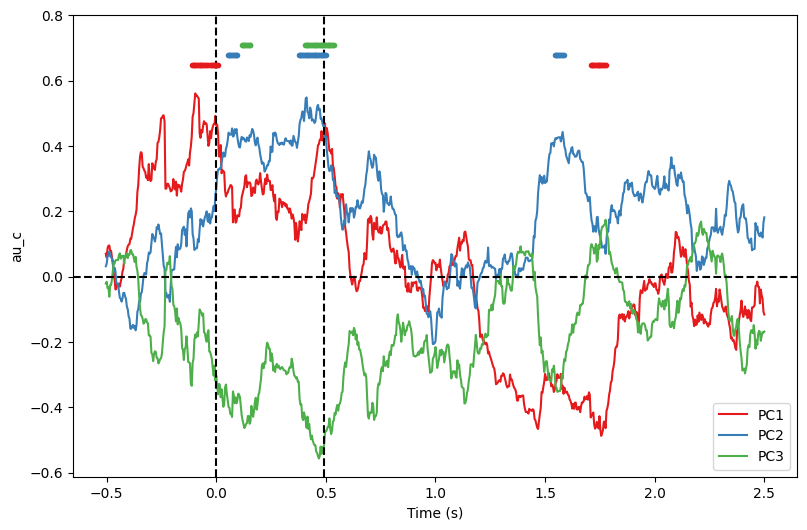

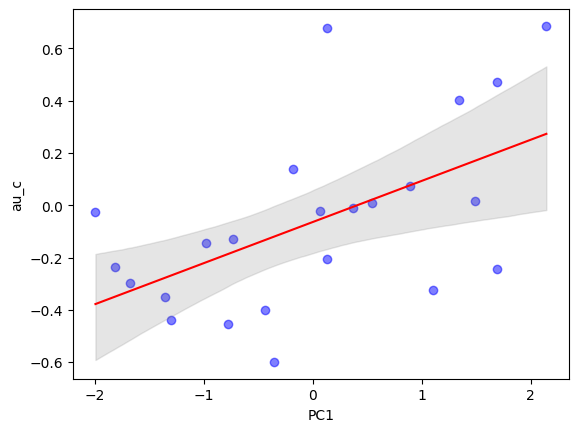

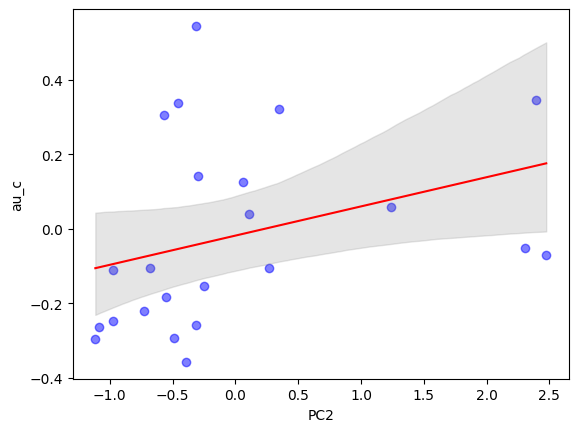

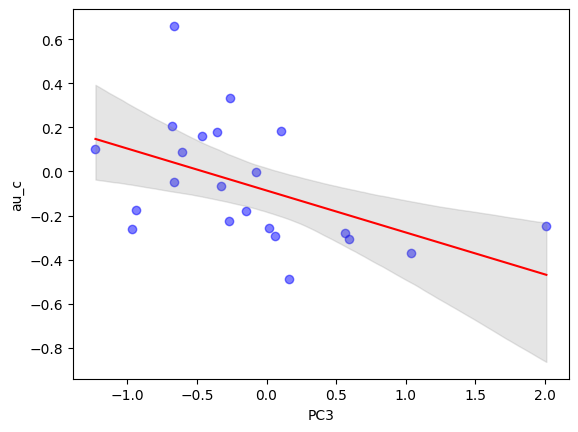

In [698]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_mirror_marking_v3_infant_face_all', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_social.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=5
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_social', n_pcs=n_pcs)

In [690]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_nonsocial.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=0.7081045813410781, p=0.0002266664828887638
rho=0.6848088506487885, p=0.0004380077976021013


ValueError: Cannot calculate a linear regression if all x values are identical

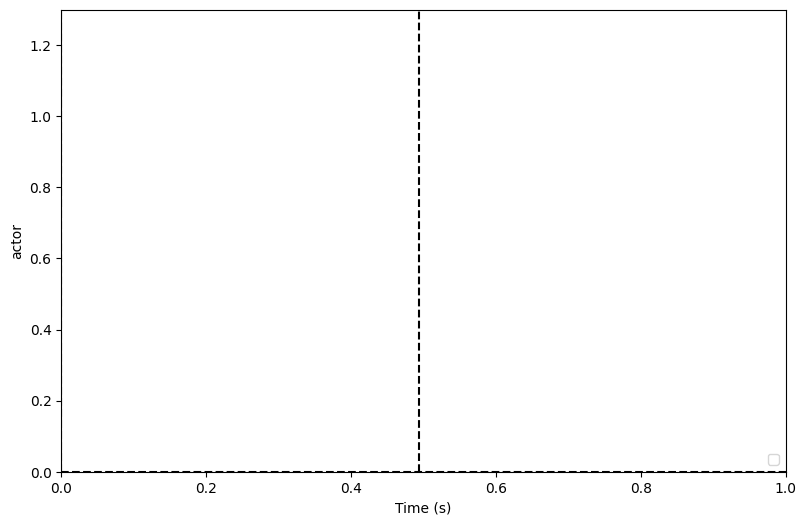

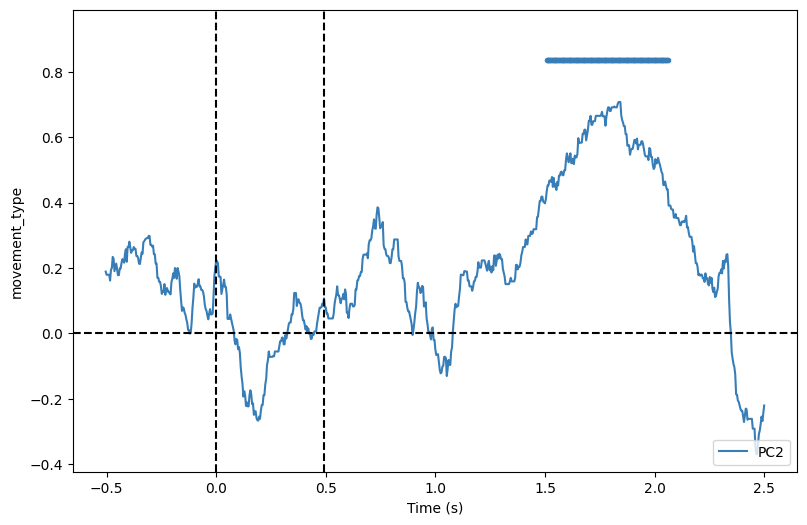

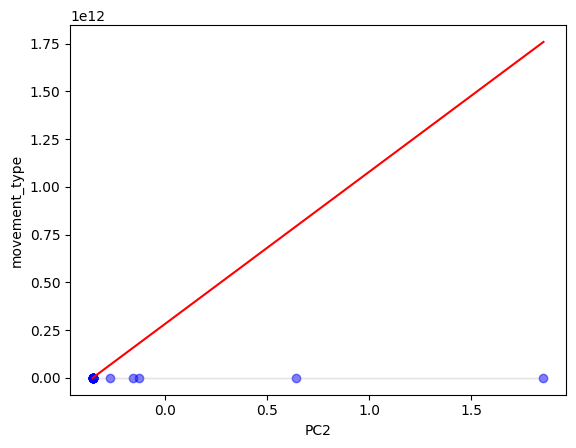

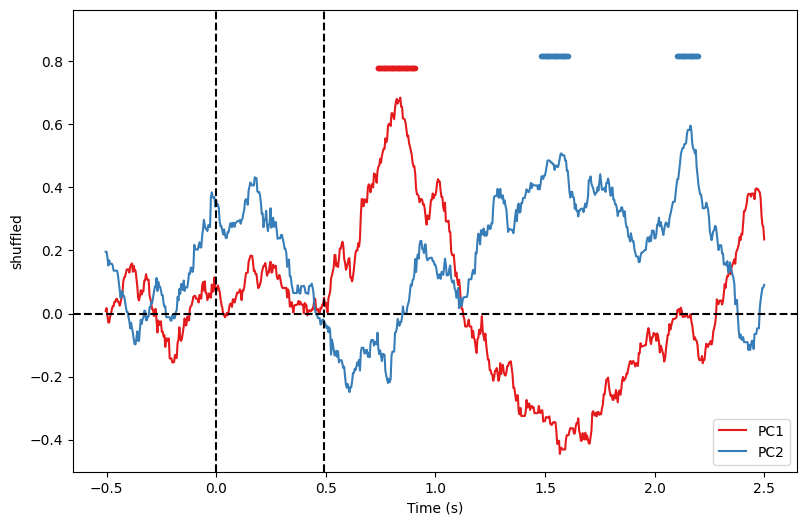

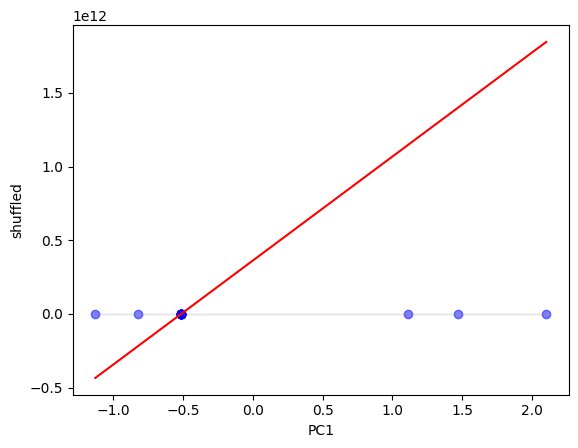

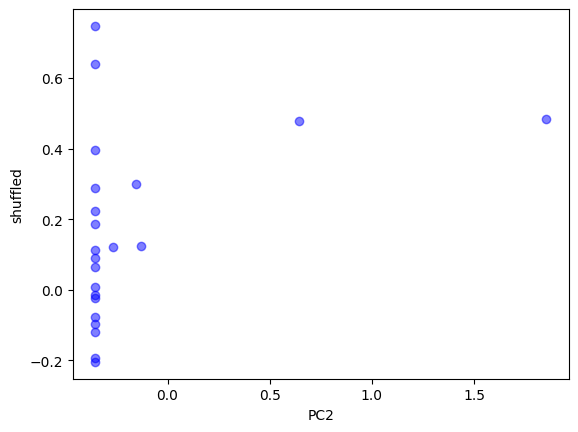

In [691]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_nonsocial', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_social_nonsocial.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=6
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_social_nonsocial', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_voc_social_nonsocial.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=6
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_voc_social_nonsocial', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_social_nonsocial_reduced.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=4
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_social_nonsocial_reduced', n_pcs=n_pcs)

In [ ]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_voc_social_nonsocial_reduced.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

In [ ]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_voc_social_nonsocial_reduced', n_pcs=n_pcs)

In [16]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_smile_mouth_open_neg_affirm_mark_mirror_v2_negating.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

rho=-0.6300695465946305, p=0.001271841701309289
rho=-0.551412517382068, p=0.007811235649320805
rho=-0.550847545540488, p=0.007887790927148898
rho=-0.6587571672822656, p=0.0008566173963382209
rho=0.54098395230472, p=0.009327336978983953
rho=-0.7355933377371441, p=9.573803873550035e-05
rho=-0.6076883476777157, p=0.002700770183645046


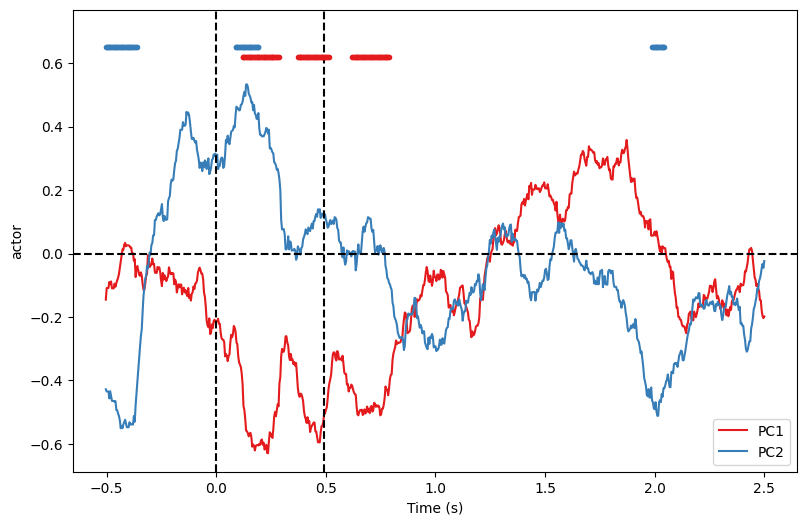

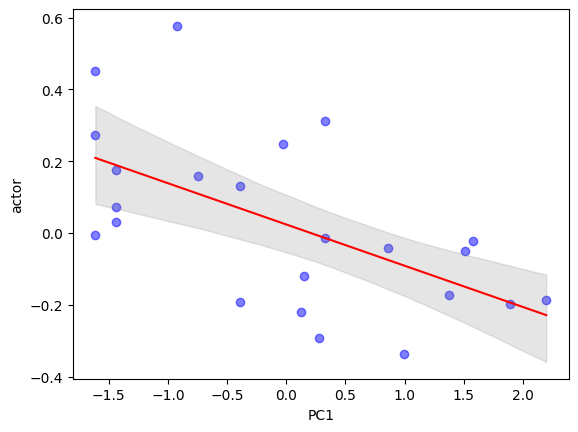

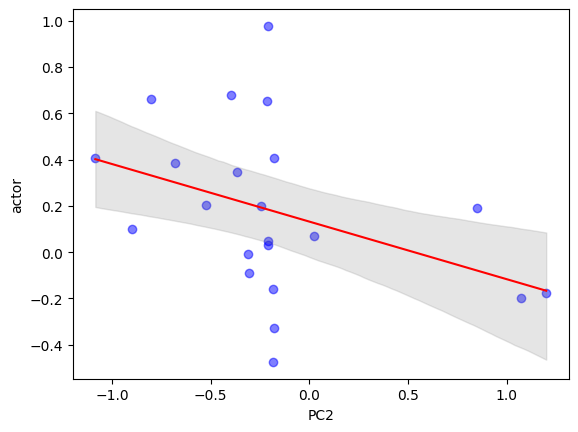

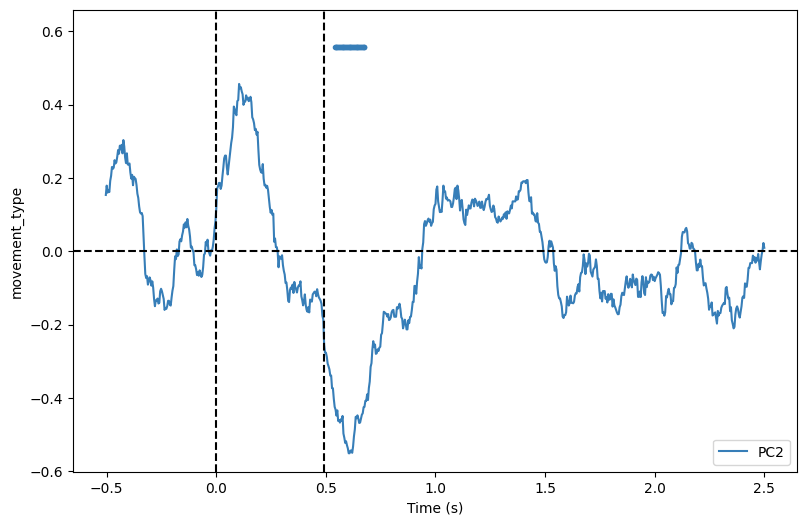

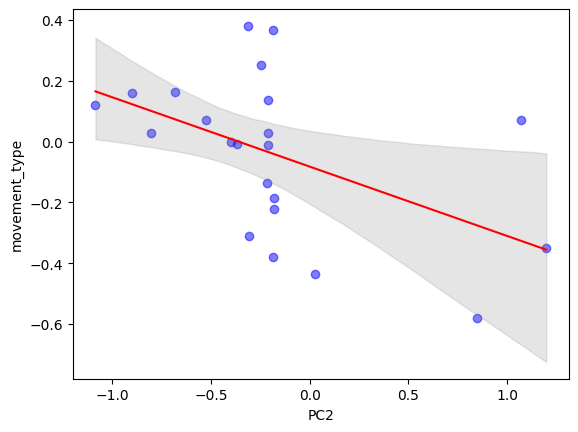

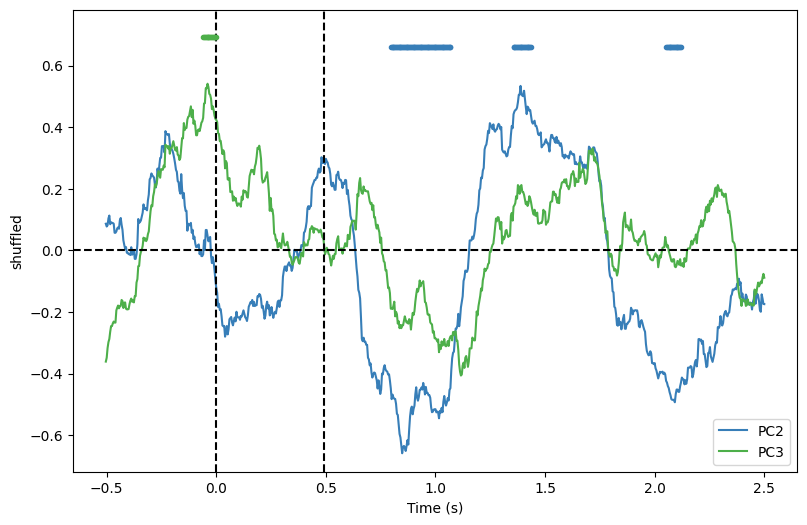

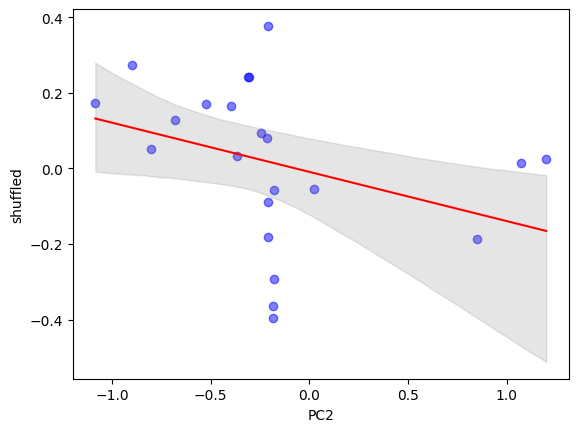

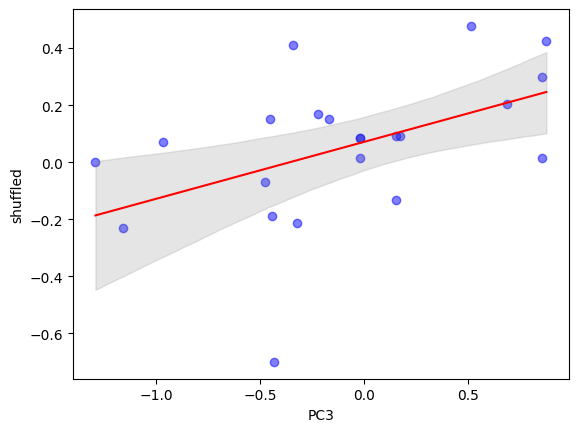

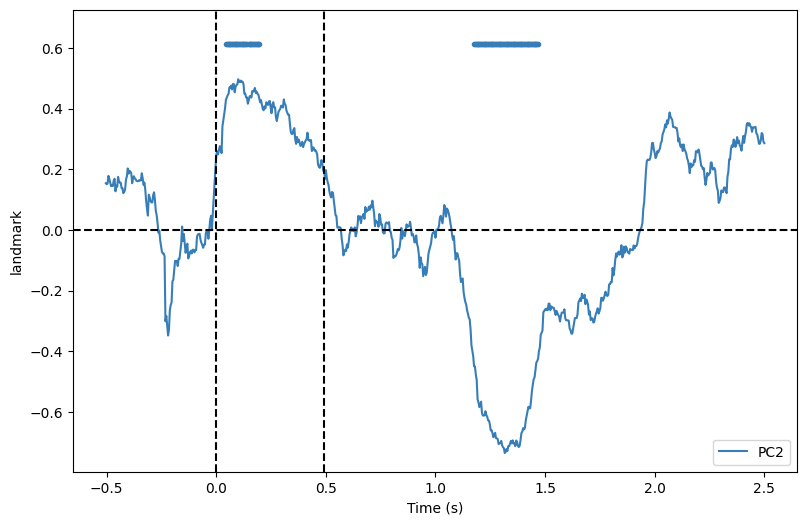

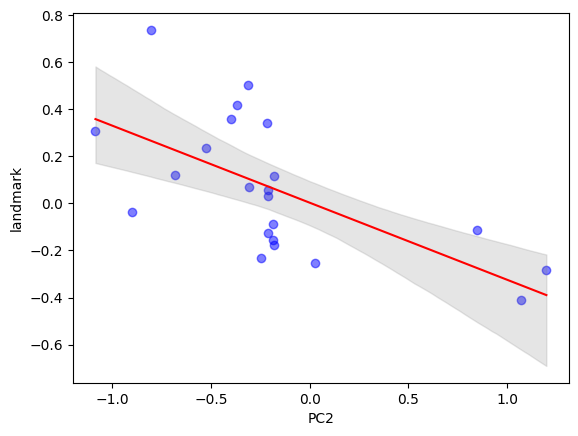

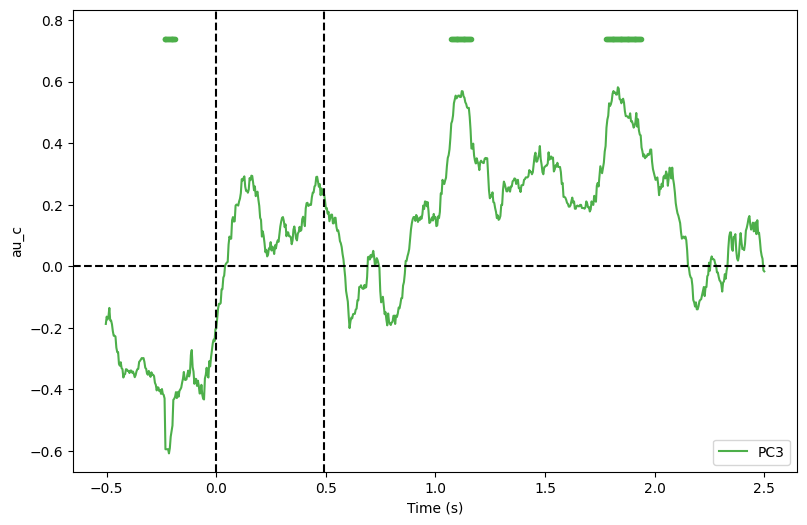

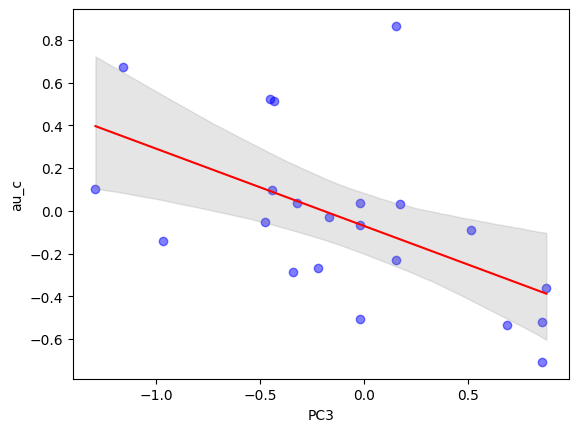

In [17]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_smile_mouth_open_neg_affirm_mark_mirror_v2_negating', n_pcs=n_pcs)

In [18]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_smile_mouth_open_affirm_mark_mirror_v2_negating.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

rho=-0.6684967976307687, p=0.0004887439813185574
rho=-0.6401704318524731, p=0.0013319367184300888


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=0.5805272239159073, p=0.004615877884588551
rho=0.6236975458509454, p=0.0019246834269256324
rho=-0.5345167492219851, p=0.010383455179936751


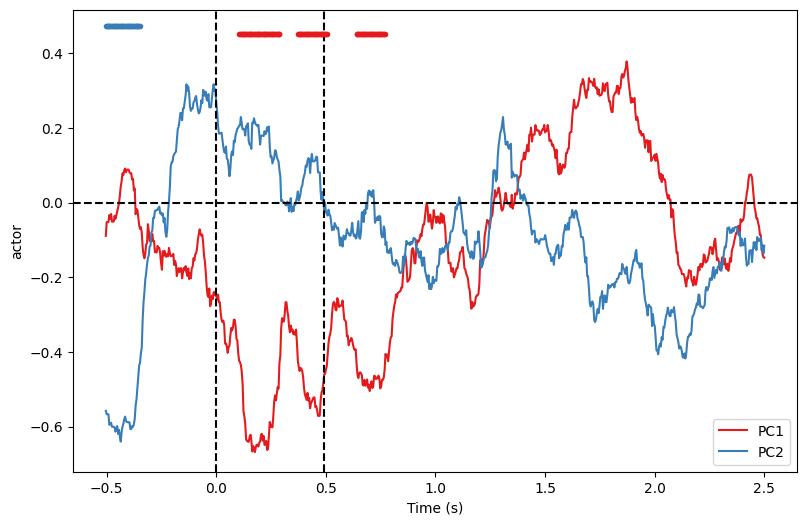

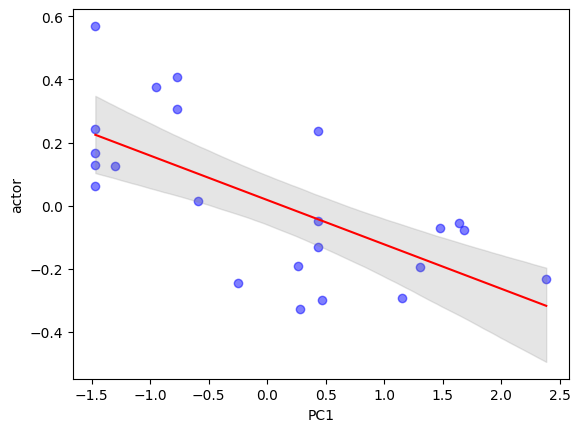

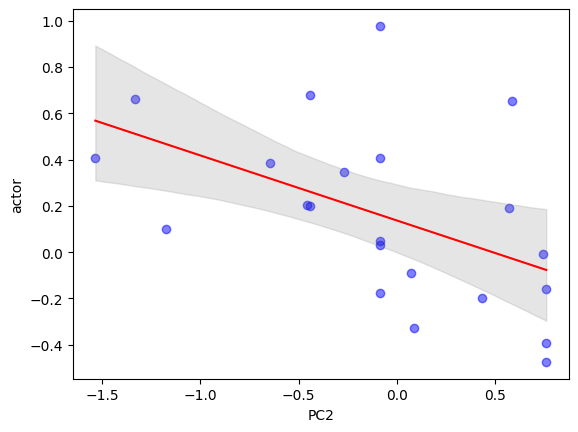

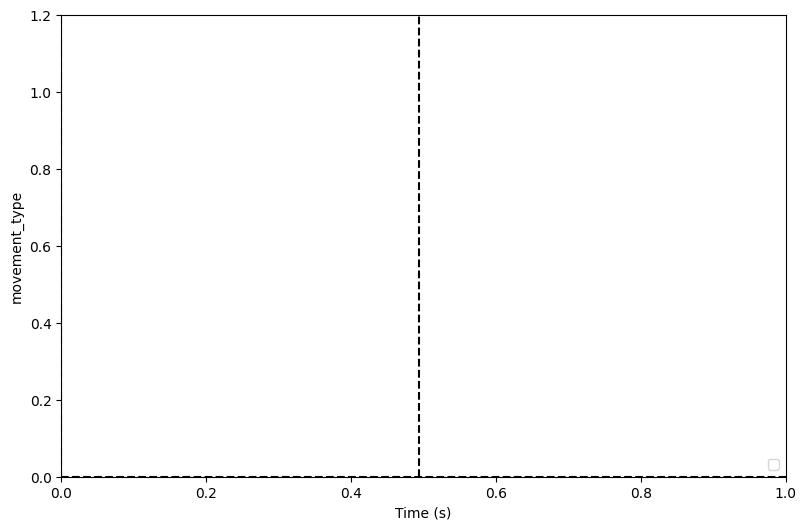

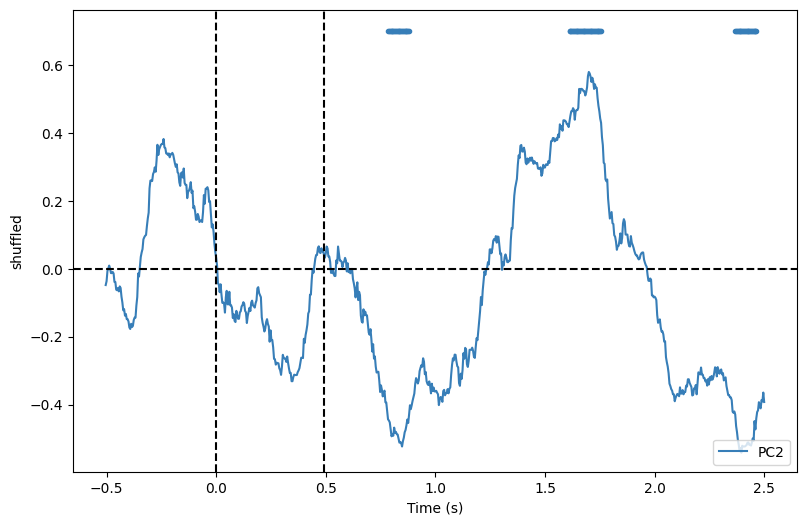

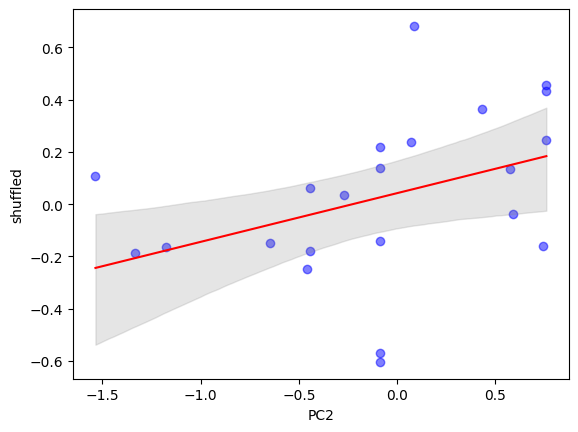

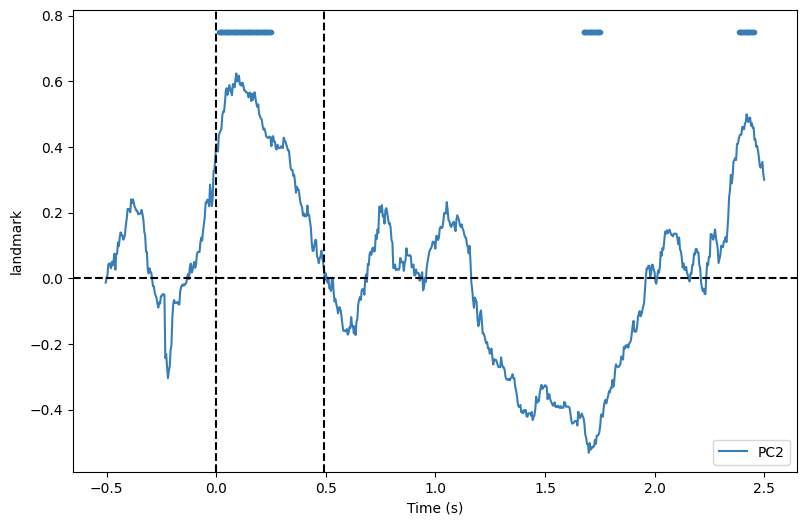

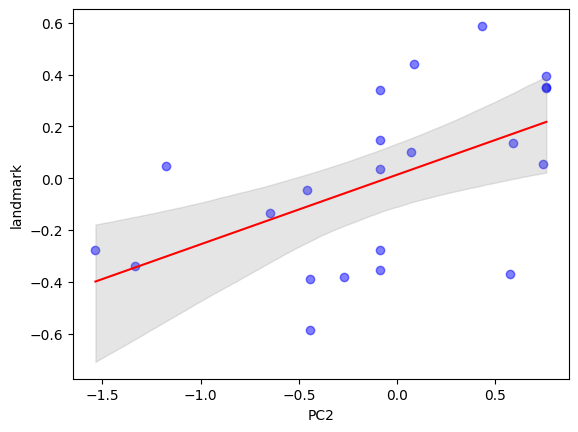

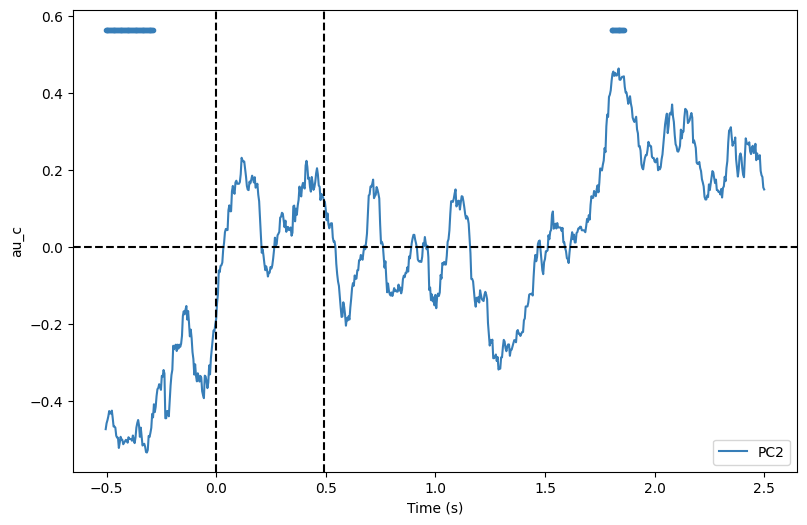

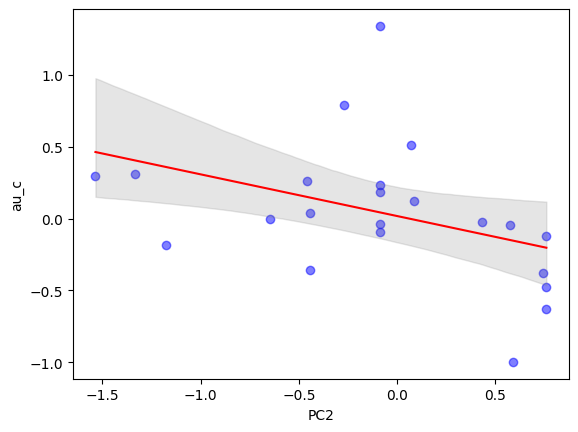

In [19]:
n_pcs=2
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_smile_mouth_open_affirm_mark_mirror_v2_negating', n_pcs=n_pcs)

In [20]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_all_affirm_mark_mirror_v2_negating.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

rho=-0.5213738730948506, p=0.01073202910851144
rho=-0.5122846857769449, p=0.014787295633259551
rho=-0.5201920568914732, p=0.013074188652816203
rho=-0.6868116625190351, p=0.00041484944682039005
rho=-0.5885343358098969, p=0.003960197811856567
rho=0.5790961376194874, p=0.004742102849197439
rho=-0.551977489223648, p=0.007735294738279271


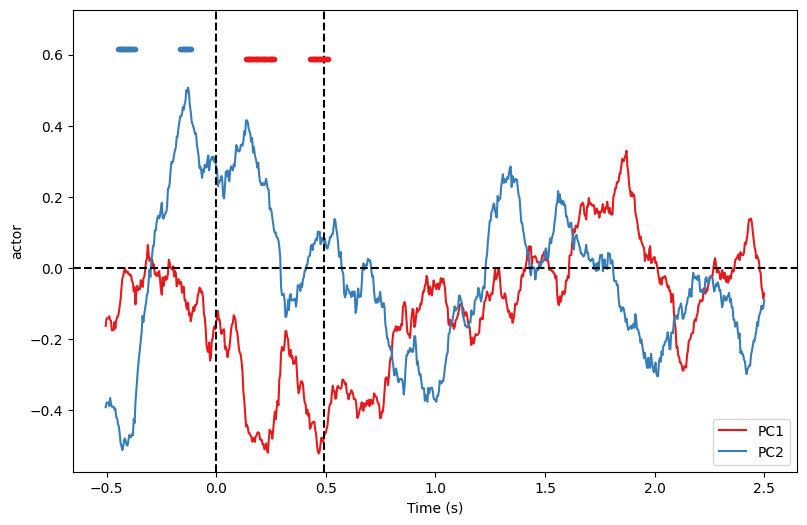

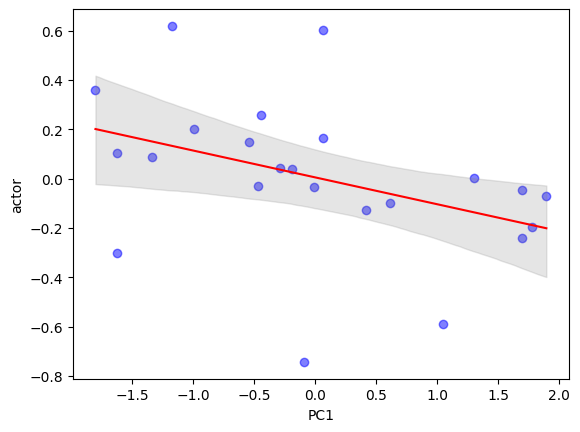

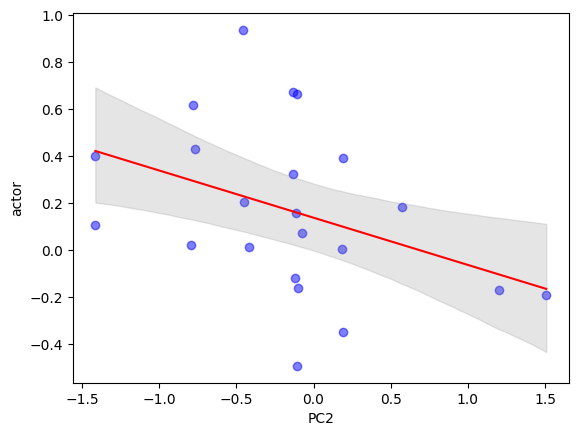

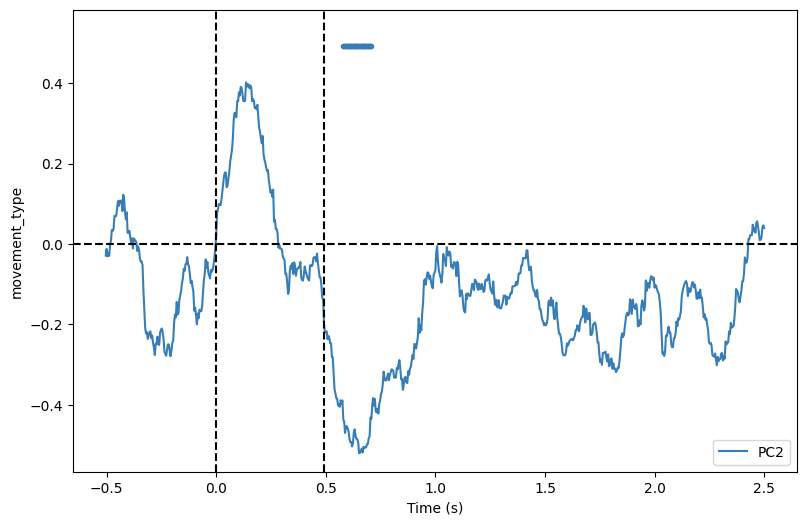

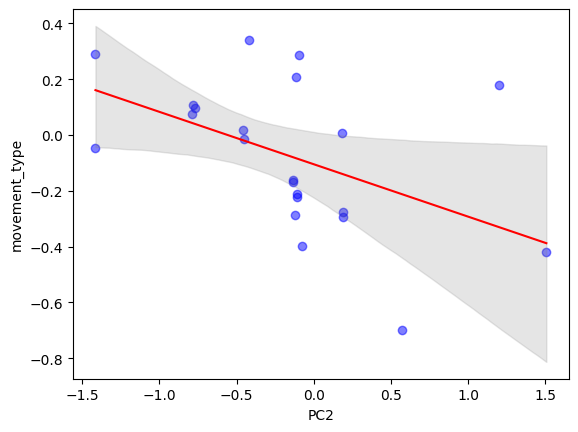

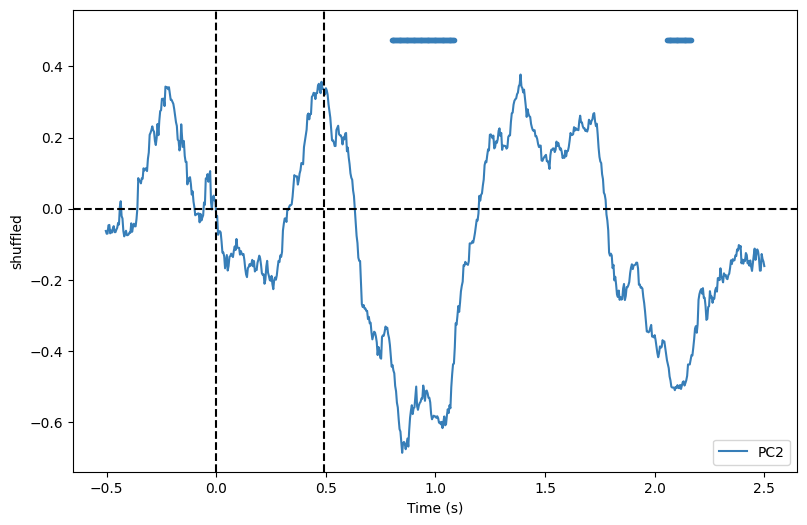

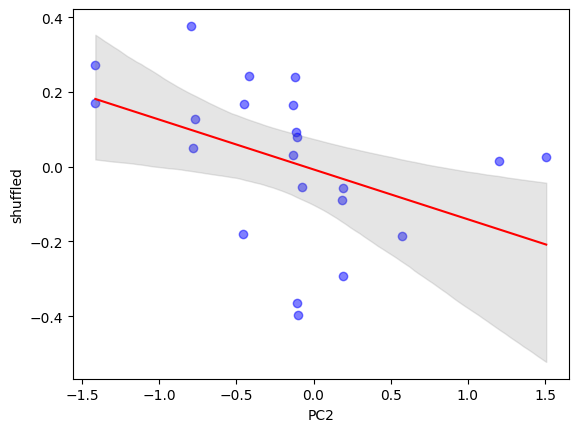

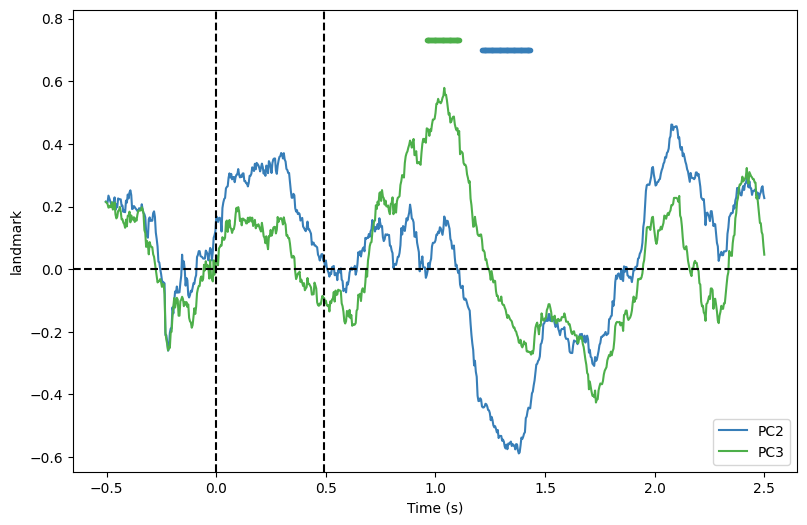

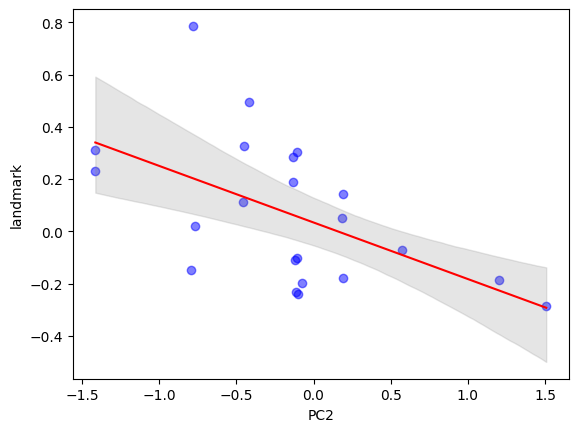

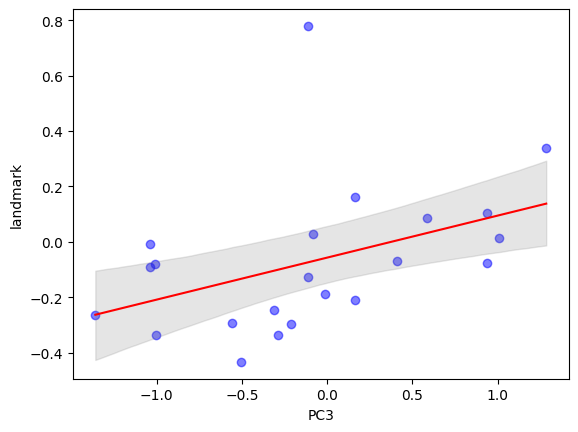

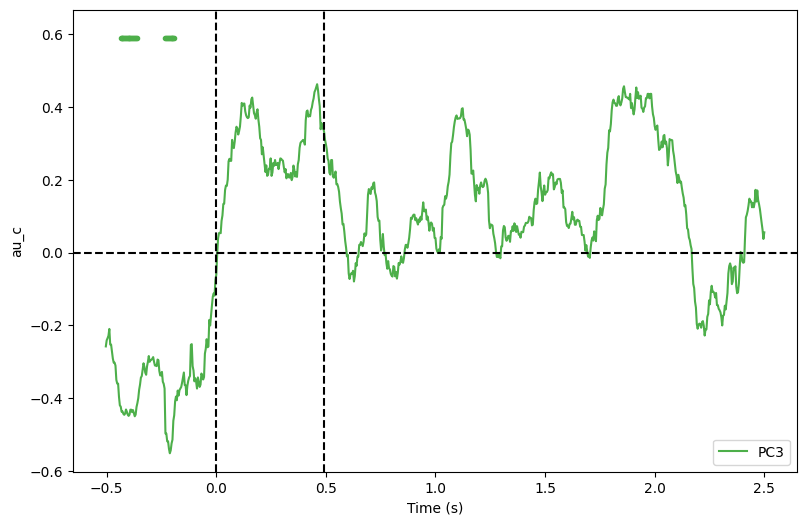

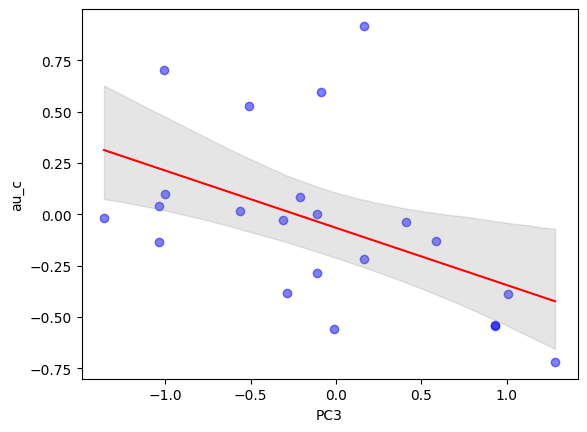

In [21]:
n_pcs=3
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_all_affirm_mark_mirror_v2_negating', n_pcs=n_pcs)

In [22]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_smile_mouth_open_neg_affirm_mark_mirror_direct_enriched_negating.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

rho=-0.6298868889261864, p=0.0012772543016012323
rho=-0.5491526300157481, p=0.008121180809413766
rho=-0.5220339816199087, p=0.012699337658393576
rho=-0.6265537723122063, p=0.0018083202318715063
rho=-0.7163842951234245, p=0.0001766572508063672


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


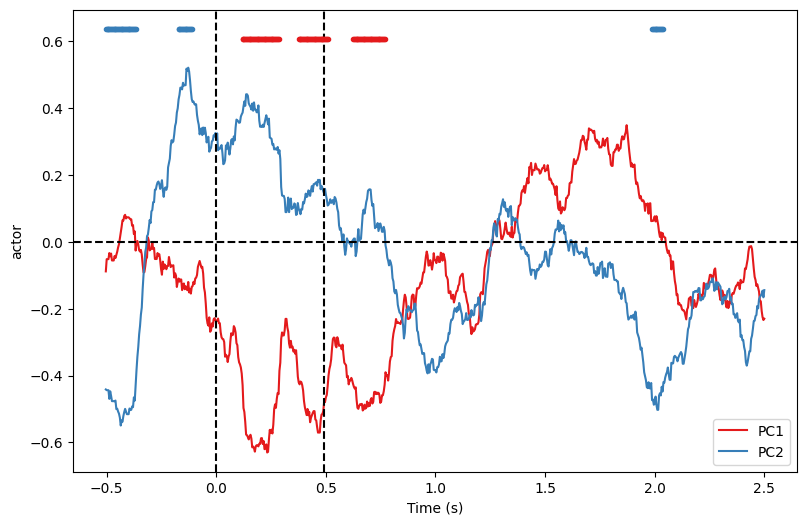

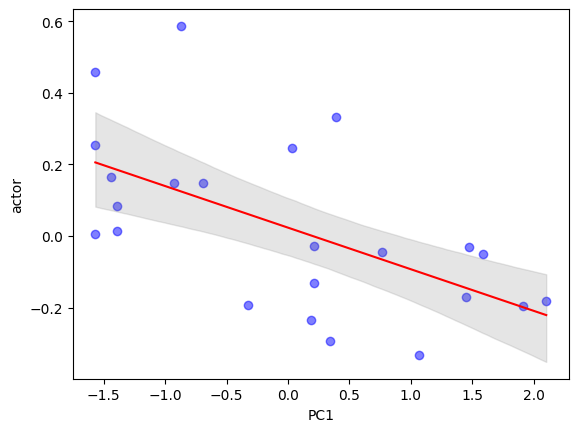

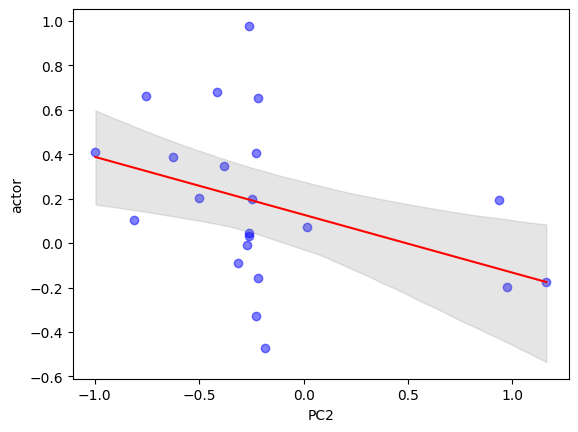

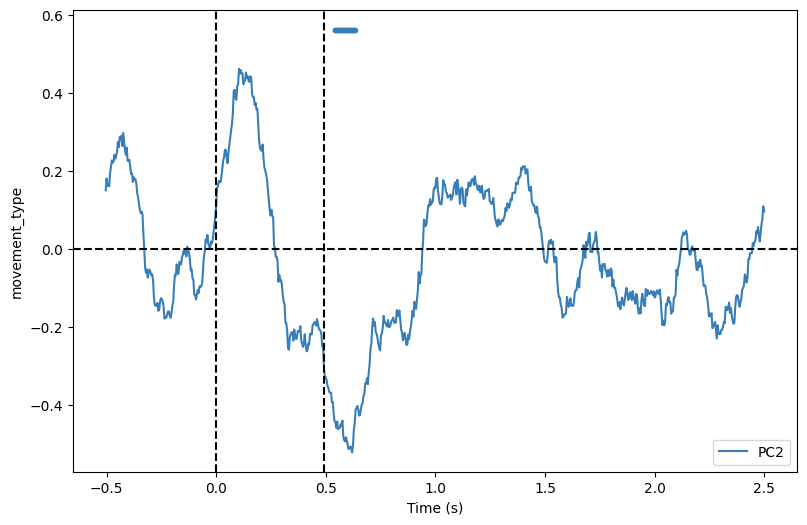

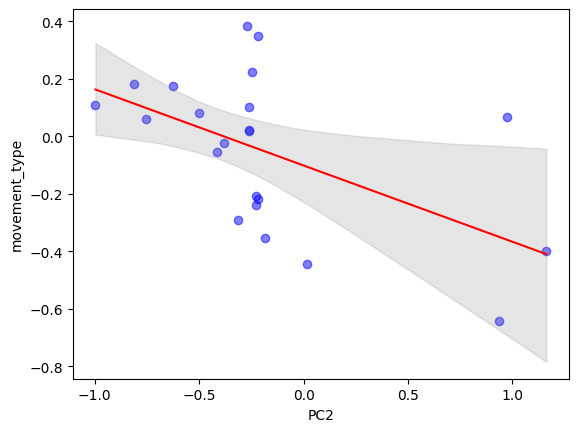

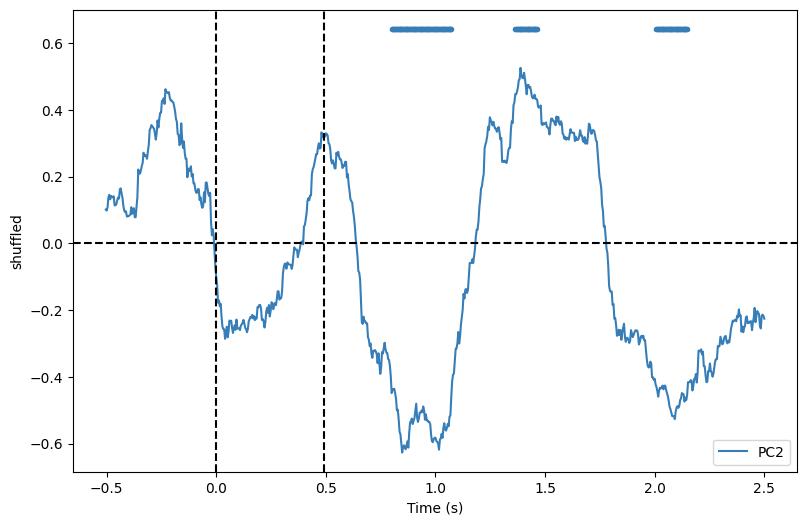

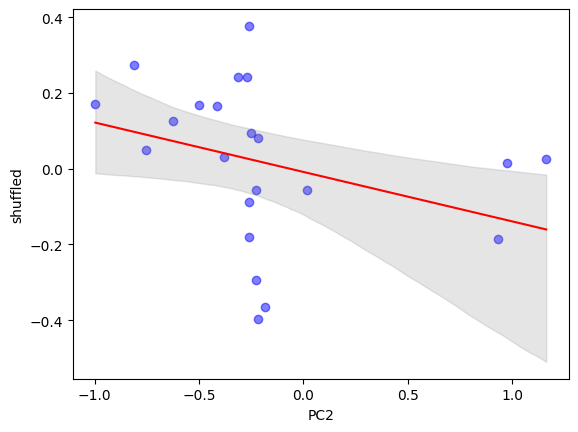

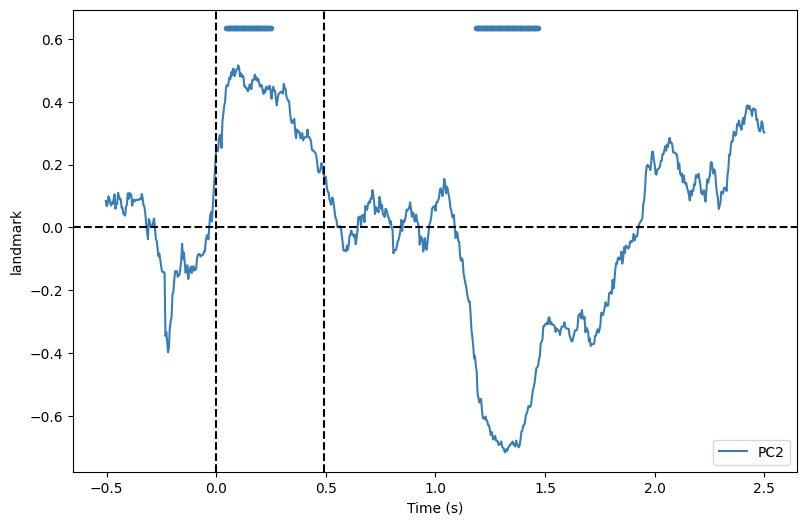

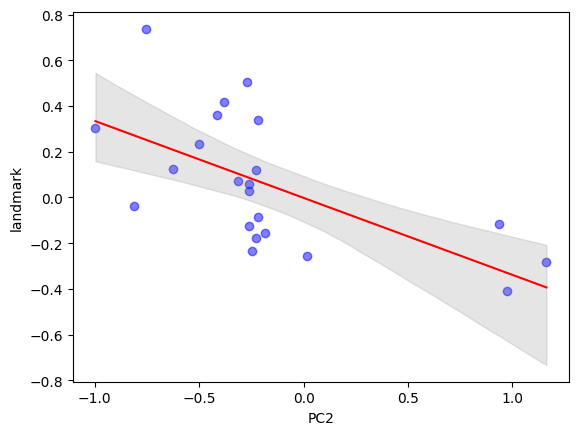

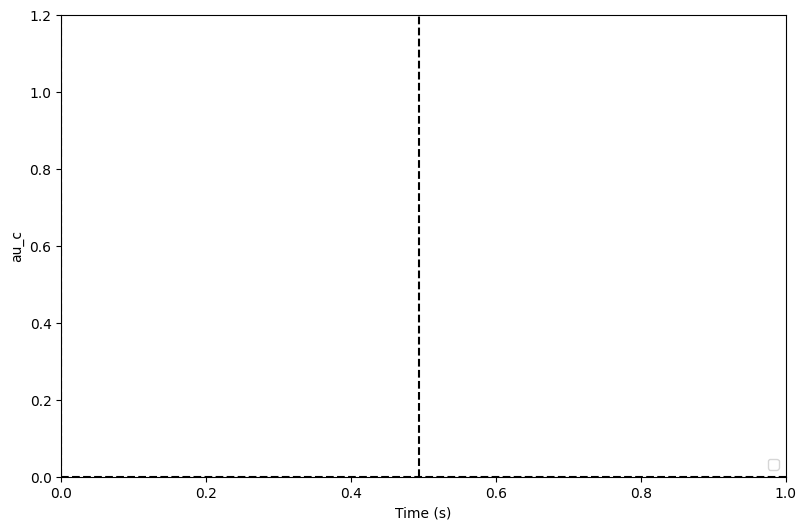

In [23]:
n_pcs=2
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_smile_mouth_open_neg_affirm_mark_mirror_direct_enriched_negating', n_pcs=n_pcs)

In [24]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_smile_mouth_open_affirm_mark_mirror_direct_enriched_negating.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

rho=-0.6831504826731247, p=0.00032722504411258316
rho=-0.5448258410708609, p=0.007182880468723263


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=-0.5264998809621136, p=0.009853557293230435
rho=0.5537411730156567, p=0.006119732872070308


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


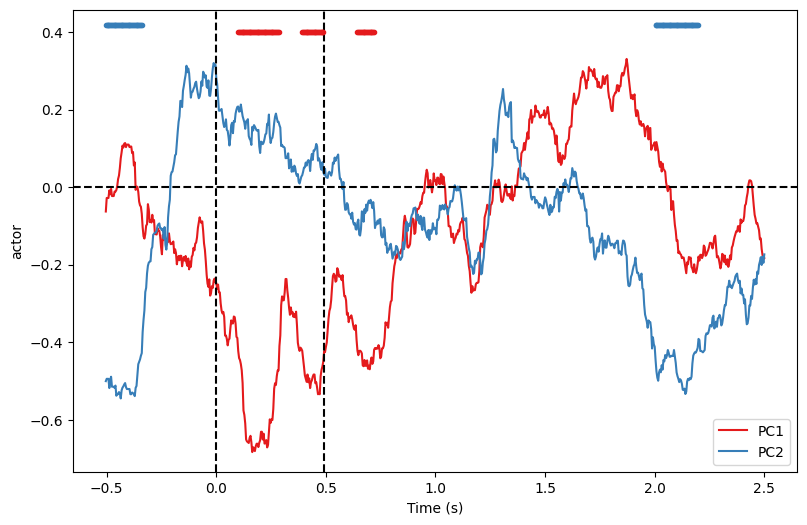

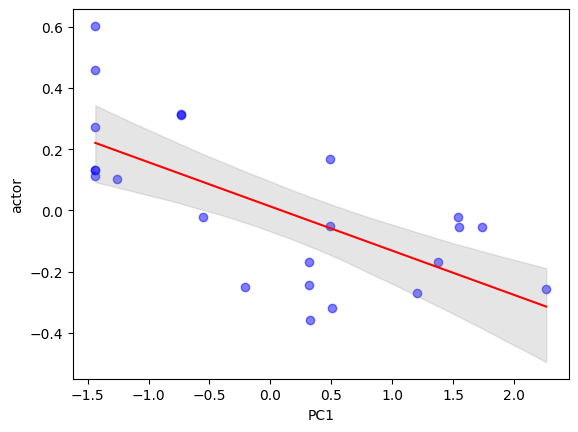

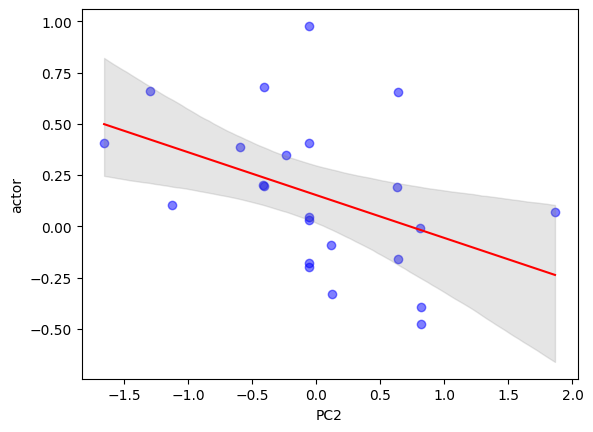

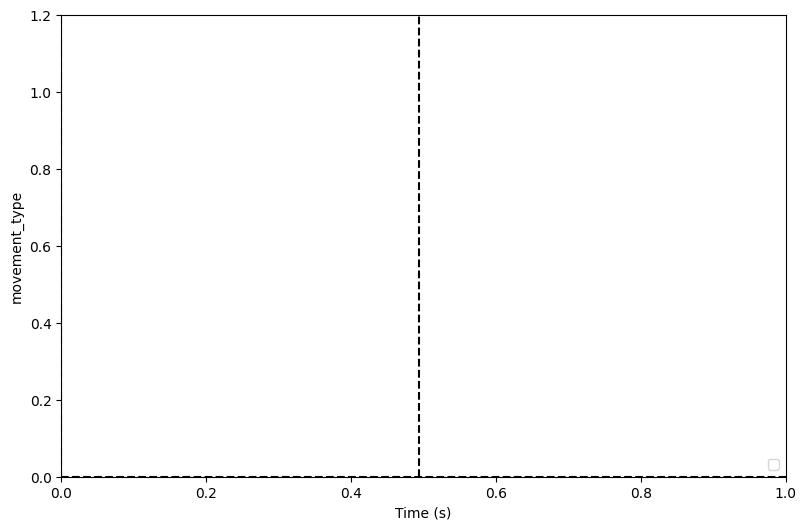

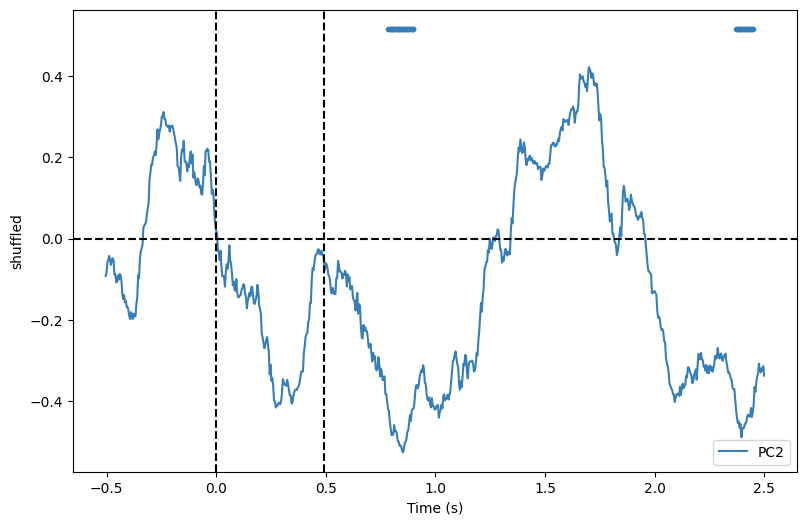

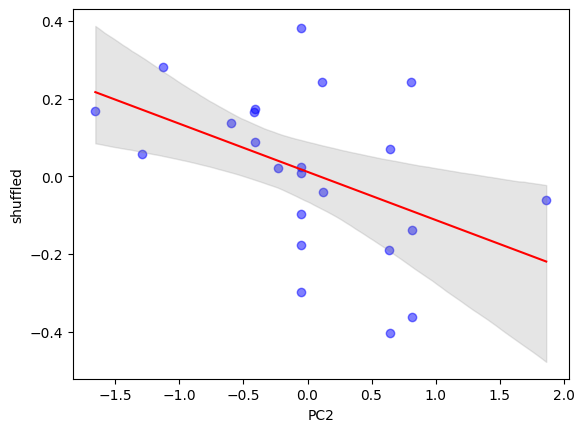

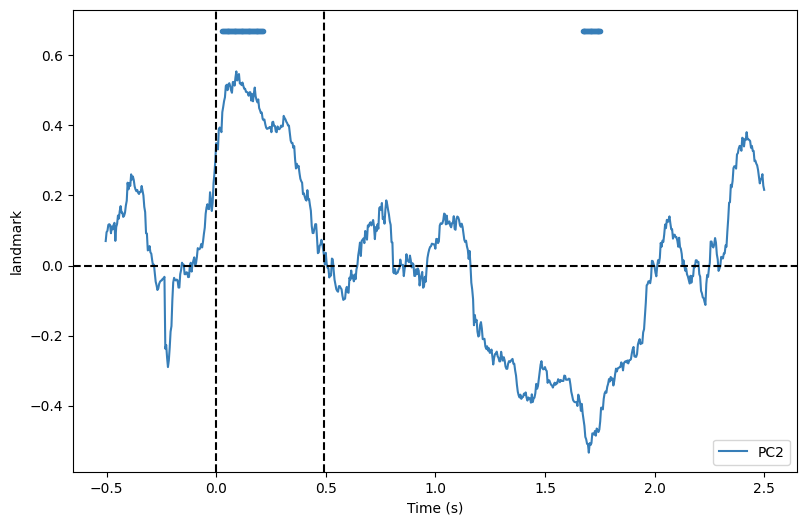

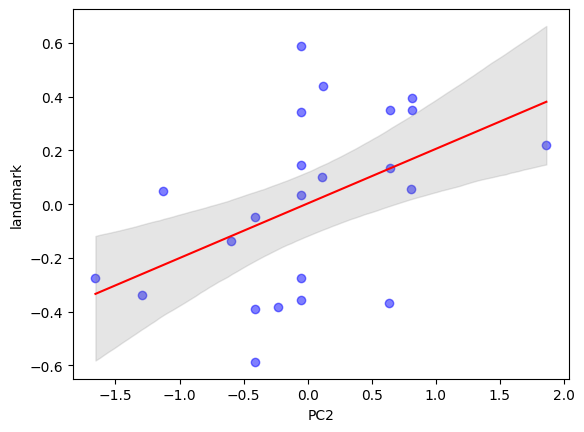

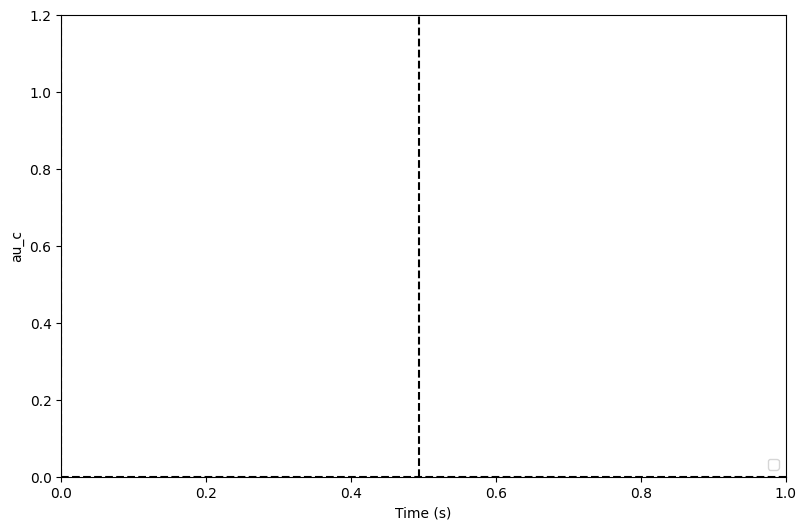

In [25]:
n_pcs=2
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_smile_mouth_open_affirm_mark_mirror_direct_enriched_negating', n_pcs=n_pcs)

In [51]:
pca_df = pd.read_csv(os.path.join(out_base_path, 'pca_scores_mother_infant_face_smile_mouth_open_affirm_mark_direct_mirror_enrich_mirror.csv'))
pca_df = pca_df[pca_df['subject'].isin([int(subject) for subject in subjects_used])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


rho=-0.6400793800450642, p=0.0013347265352331363
rho=0.5305470797164972, p=0.011078919158516349
rho=-0.482056217591871, p=0.023092509828655353


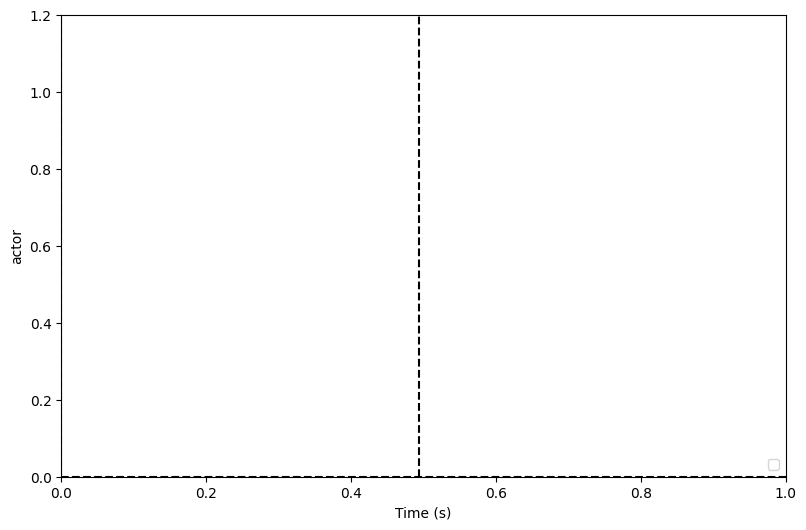

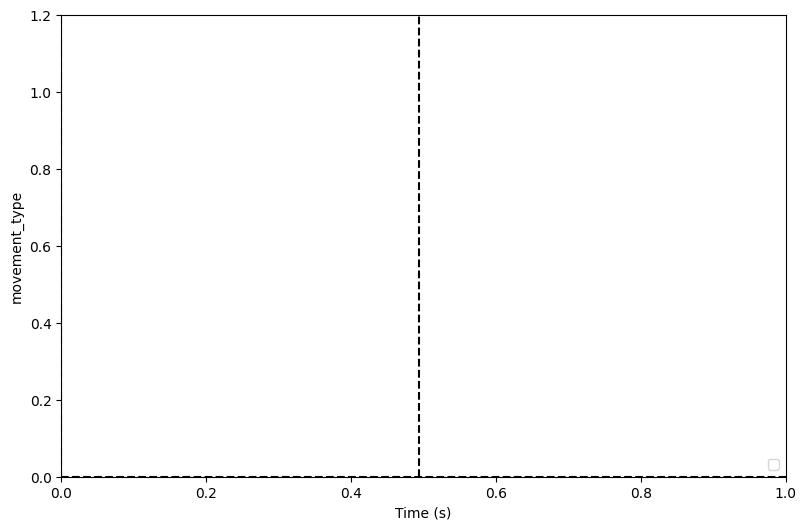

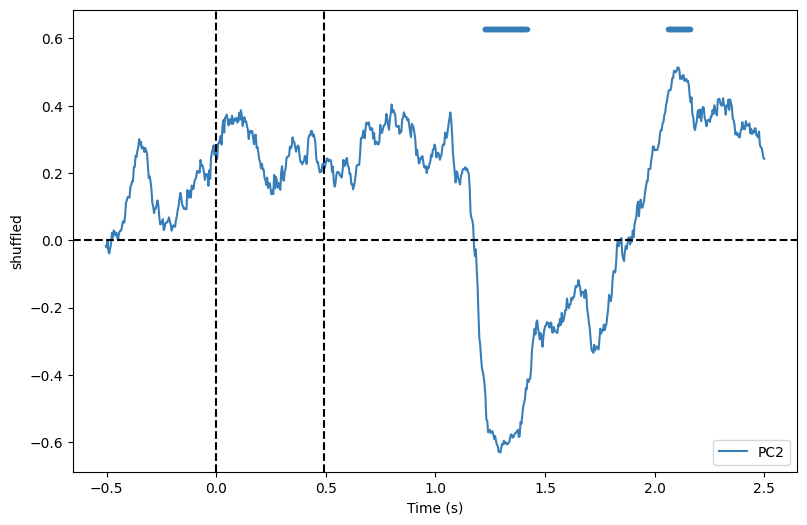

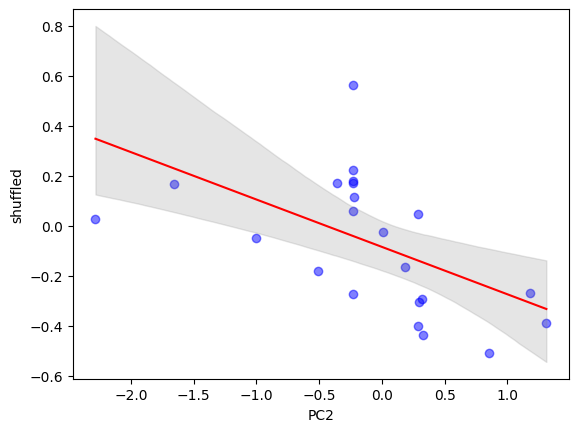

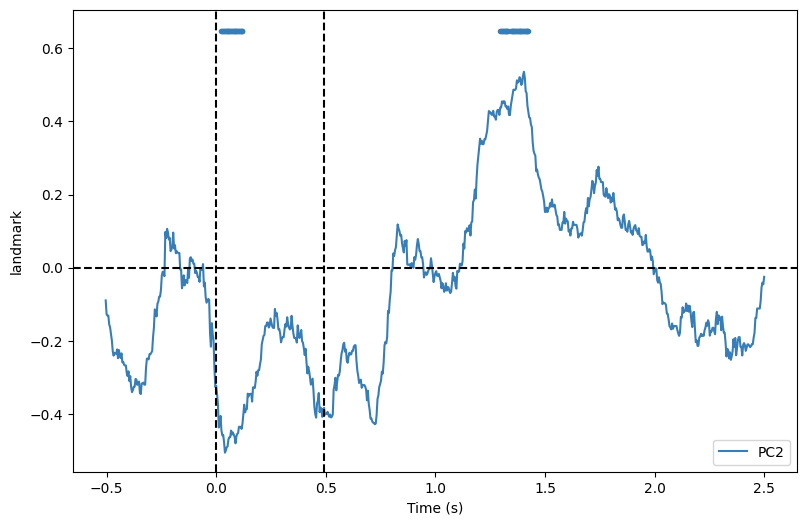

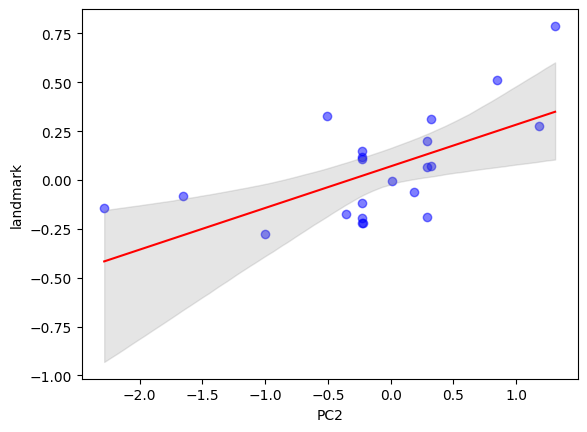

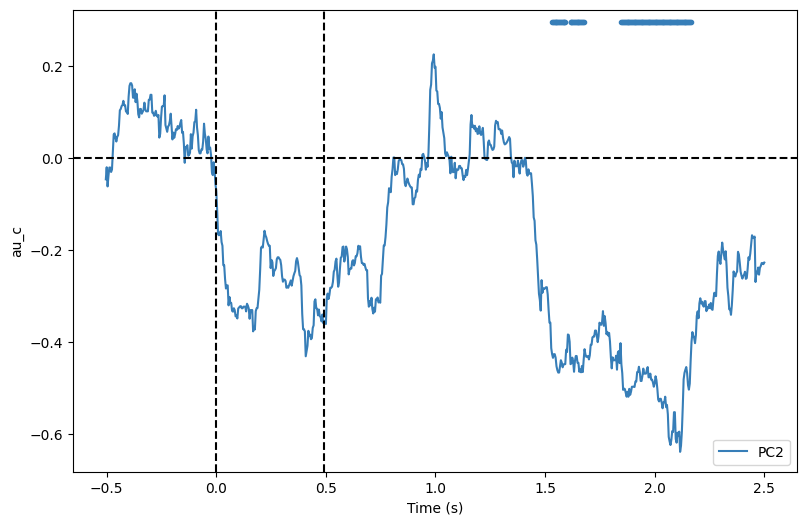

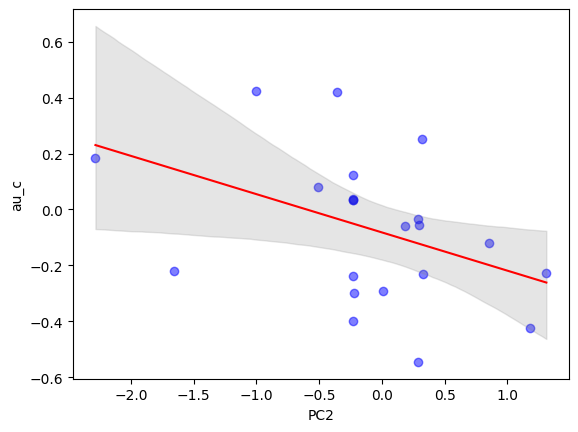

In [62]:
n_pcs=2
for i in range(5):
    cluster_based_permutation_test_pca(i, pca_df, 'mother_infant_face_smile_mouth_open_affirm_mark_direct_mirror_enrich_mirror', n_pcs=n_pcs,
                                      control_columns=['infant_face_smile_mouth_open'])